### Read the data set

In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from frozenlist import FrozenList


In [3]:
#read the data set

df = pd.read_csv('Dataset/Airbnb_Data.csv')

#display the first 5 rows of the data set
print(df.head())

#display the last 5 rows of the data set
print(df.tail())

#display the shape of the data set
print(df.shape)

#display the columns of the data set
print(df.columns)

#display the data types of the columns
print(df.dtypes)

#display the info of the data set
print(df.info())

#display the summary statistics of the data set
print(df.describe())



         id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed     

In [4]:
# for each row, we need to put the ammenities in a list 

df['amenities'] = df['amenities'].apply(lambda x: x.replace('{','').replace('}','').replace('"','').split(','))

#display the first 5 rows of the data set
print(df.head())




         id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  [Wireless Internet, Air conditioning, Kitchen,...             3        1.0   
1  [Wireless Internet, Air conditioning, Kitchen,...             7        1.0   
2  [TV, Cable TV, Wireless Internet, Air conditio...             5        1.0   
3  [TV, Cable TV, Internet, Wireless Internet, Ki...             4        1.0   
4  [TV, Internet, Wireless Internet, Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed     

In [5]:
#replace the log price column with the price column

df['log_price'] = df['log_price'].apply(lambda x: np.exp(x))

#rename the log price column to price

df.rename(columns={'log_price':'price'}, inplace=True)

#display the first 5 rows of the data set
print(df.head())
#the newdf is used (after the markdown preprocess) for removing rows with prices greater than 500 ********
newdf=df


         id  price property_type        room_type  \
0   6901257  150.0     Apartment  Entire home/apt   
1   6304928  169.0     Apartment  Entire home/apt   
2   7919400  145.0     Apartment  Entire home/apt   
3  13418779  750.0         House  Entire home/apt   
4   3808709  115.0     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  [Wireless Internet, Air conditioning, Kitchen,...             3        1.0   
1  [Wireless Internet, Air conditioning, Kitchen,...             7        1.0   
2  [TV, Cable TV, Wireless Internet, Air conditio...             5        1.0   
3  [TV, Cable TV, Internet, Wireless Internet, Ki...             4        1.0   
4  [TV, Internet, Wireless Internet, Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed              strict         

In [12]:
#get some statistics of the price column
print(df['price'].describe())

count    74111.000000
mean       160.370849
std        168.580415
min          1.000000
25%         75.000000
50%        111.000000
75%        185.000000
max       1999.000000
Name: price, dtype: float64


In [5]:
# get a set of all unique amenities
amenities = set()
for index, row in df.iterrows():
    for amenity in row['amenities']:
        amenities.add(amenity)

#display the unique amenities
print(amenities)


{'TV', '', 'Hot water kettle', 'Babysitter recommendations', 'Private living room', 'Host greets you', 'Dishwasher', 'Bed linens', 'Stair gates', 'Wide doorway', ' smooth pathway to front door', 'Pool', 'Fixed grab bars for shower & toilet', 'Laptop friendly workspace', 'Cooking basics', 'Beach essentials', 'Paid parking off premises', 'Self Check-In', 'Doorman', 'Pets allowed', 'translation missing: en.hosting_amenity_50', 'Hot water', 'Body soap', 'Private bathroom', 'Disabled parking spot', 'Air purifier', 'Long term stays allowed', 'Path to entrance lit at night', 'Cable TV', 'Table corner guards', 'Waterfront', 'Washer / Dryer', 'Washer', 'Ethernet connection', 'Flat smooth pathway to front door', 'Carbon monoxide detector', 'Elevator in building', 'Hair dryer', 'translation missing: en.hosting_amenity_49', 'Children’s dinnerware', 'Suitable for events', 'Pets live on this property', 'Baby bath', 'Refrigerator', 'Heating', 'BBQ grill', 'Firm matress', 'Roll-in shower with chair', 

In [7]:
amenities.remove('')
print(len(amenities), 'amenities length')

130 amenities length


In [8]:
#get unique intger value of the prices in the data set

prices = set()
for index, row in df.iterrows():
    prices.add(int(row['price']))

#display the unique prices
# 6901257  150.0     Apartment  Entire home/apt   
# 1   6304928  169.0     Apartment  Entire home/apt   
# 2   7919400  145.0     Apartment  Entire home/apt   
# 3  13418779  750.0         House  Entire home/apt   
# 4   3808709  115.0     Apartment  Entire home/apt 


In [9]:
print(prices)

#get the number of unique prices
print(len(prices), 'prices length')


{1, 5, 10, 11, 12, 13, 14, 15, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34, 36, 37, 38, 39, 41, 42, 44, 45, 46, 48, 50, 51, 52, 53, 54, 55, 56, 57, 59, 61, 62, 64, 65, 67, 68, 69, 70, 71, 72, 74, 76, 78, 79, 81, 82, 83, 85, 87, 88, 89, 90, 92, 94, 95, 97, 98, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 113, 114, 115, 117, 118, 119, 121, 122, 124, 125, 126, 127, 128, 129, 130, 132, 133, 135, 136, 137, 138, 139, 141, 142, 144, 146, 147, 149, 150, 151, 152, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 166, 167, 169, 171, 172, 173, 175, 177, 179, 181, 182, 184, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 197, 198, 199, 201, 202, 203, 205, 206, 207, 209, 211, 213, 214, 216, 217, 219, 220, 221, 223, 224, 225, 227, 228, 229, 230, 231, 232, 234, 235, 236, 237, 239, 241, 242, 244, 245, 247, 248, 249, 251, 252, 253, 254, 255, 257, 258, 260, 262, 263, 264, 266, 267, 268, 270, 271, 272, 273, 274, 275, 277, 278, 279, 280, 281, 282, 284, 285, 286, 288, 289, 291, 

In [10]:
#we have 640 unique prices, with minimum price of 1 USD and maximum price of 2000USD
#we can categorize the prices into 13 categories
#0-50, 51-100, 101-150, 151-200, 201-250, 251-300, 301-350, 351-400, 401-450, 451-500, 501-550, 551-600, 601-650
#650-700, 701-750, 751-800, 801-850, 851-900, 901-950, 951-1000, 1001-1050, 1051-1100, 1101-1150, 1151-1200, 1201-1250
#1251-1300, 1301-1350, 1351-1400, 1401-1450, 1451-1500, 1501-1550, 1551-1600, 1601-1650, 1651-1700, 1701-1750, 1751-1800
#1801-1850, 1851-1900, 1901-1950, 1951-2000

stringo = '''0-50, 51-100, 101-150, 151-200, 201-250, 251-300, 301-350, 351-400, 401-450, 451-500, 501-550, 551-600, 601-650, 650-700, 701-750, 751-800, 801-850, 851-900, 901-950, 951-1000, 1001-1050, 1051-1100, 1101-1150, 1151-1200, 1201-1250, 1251-1300, 1301-1350, 1351-1400, 1401-1450, 1451-1500, 1501-1550, 1551-1600, 1601-1650, 1651-1700, 1701-1750, 1751-1800, 1801-1850, 1851-1900, 1901-1950, 1951-2000'''

prices = stringo.split(',')
print(len(prices), 'prices length')
print(prices)


40 prices length
['0-50', ' 51-100', ' 101-150', ' 151-200', ' 201-250', ' 251-300', ' 301-350', ' 351-400', ' 401-450', ' 451-500', ' 501-550', ' 551-600', ' 601-650', ' 650-700', ' 701-750', ' 751-800', ' 801-850', ' 851-900', ' 901-950', ' 951-1000', ' 1001-1050', ' 1051-1100', ' 1101-1150', ' 1151-1200', ' 1201-1250', ' 1251-1300', ' 1301-1350', ' 1351-1400', ' 1401-1450', ' 1451-1500', ' 1501-1550', ' 1551-1600', ' 1601-1650', ' 1651-1700', ' 1701-1750', ' 1751-1800', ' 1801-1850', ' 1851-1900', ' 1901-1950', ' 1951-2000']


In [11]:
#change the prices to integers where the first value is the lower bound and the second value is the upper bound of the 40 categories
prices = [(int(price.split('-')[0]), int(price.split('-')[1])) for price in prices]
print(prices)



[(0, 50), (51, 100), (101, 150), (151, 200), (201, 250), (251, 300), (301, 350), (351, 400), (401, 450), (451, 500), (501, 550), (551, 600), (601, 650), (650, 700), (701, 750), (751, 800), (801, 850), (851, 900), (901, 950), (951, 1000), (1001, 1050), (1051, 1100), (1101, 1150), (1151, 1200), (1201, 1250), (1251, 1300), (1301, 1350), (1351, 1400), (1401, 1450), (1451, 1500), (1501, 1550), (1551, 1600), (1601, 1650), (1651, 1700), (1701, 1750), (1751, 1800), (1801, 1850), (1851, 1900), (1901, 1950), (1951, 2000)]


In [25]:
#add a new column to the data set called price_category
#the price category will be the category of the price of the listing

df['price_category'] = df['price'].apply(lambda x: [i for i in range(len(prices)) if prices[i][0] <= int(x) <= prices[i][1]][0])

#display the first 5 rows of the data set
print(df['price_category'])

0         2
1         3
2         2
3        14
4         2
         ..
74106     1
74107     3
74108     3
74109     3
74110     2
Name: price_category, Length: 74111, dtype: int64


{'Chicago', 'SF', 'LA', 'NYC', 'DC', 'Boston'}


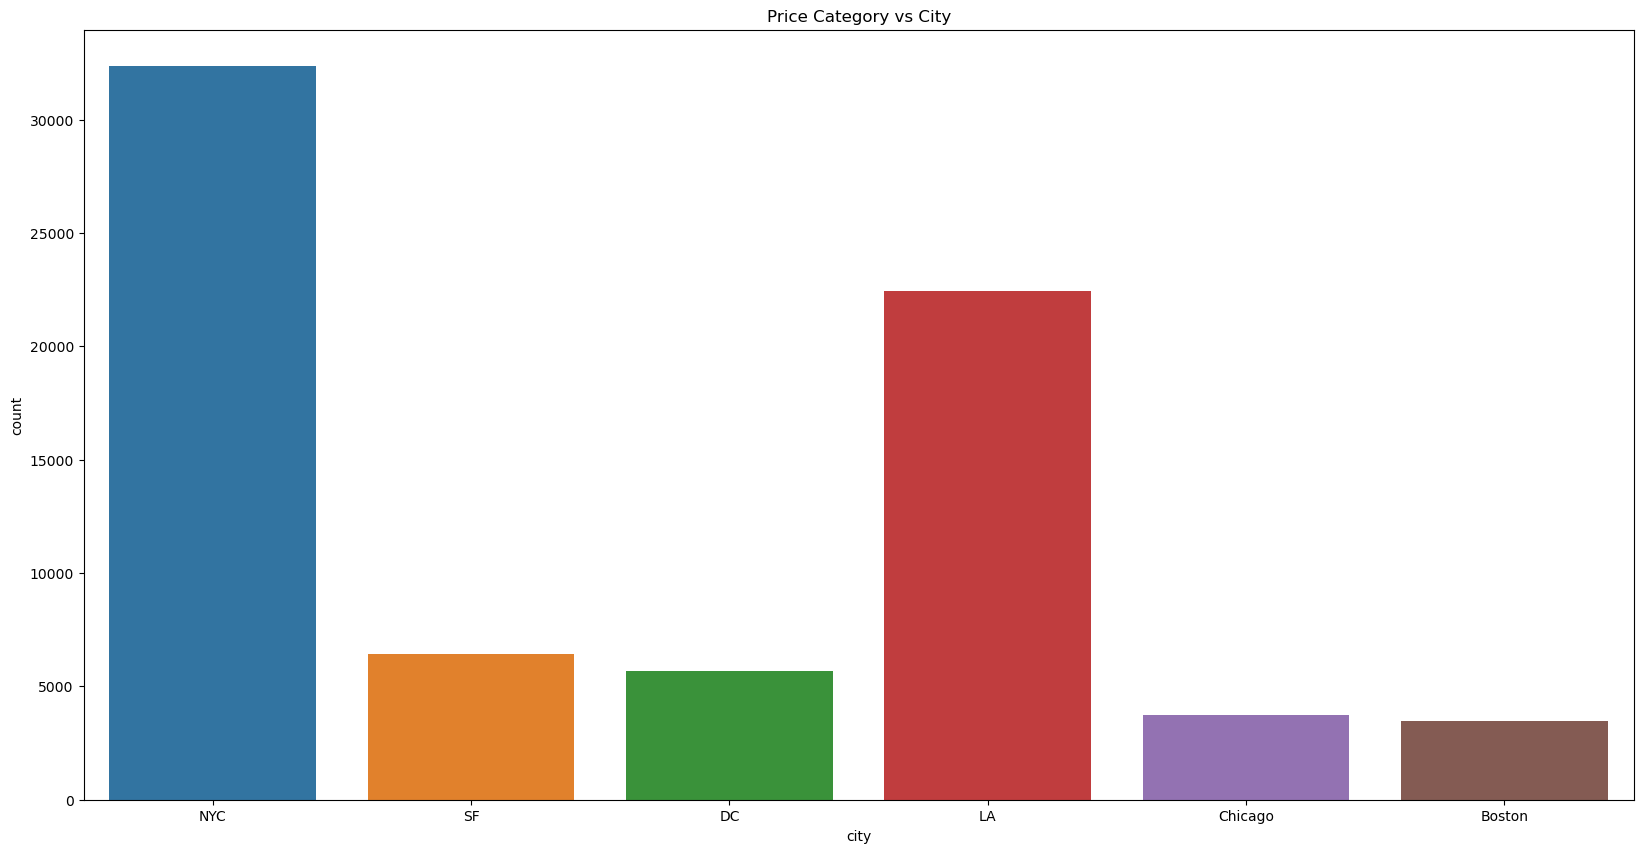

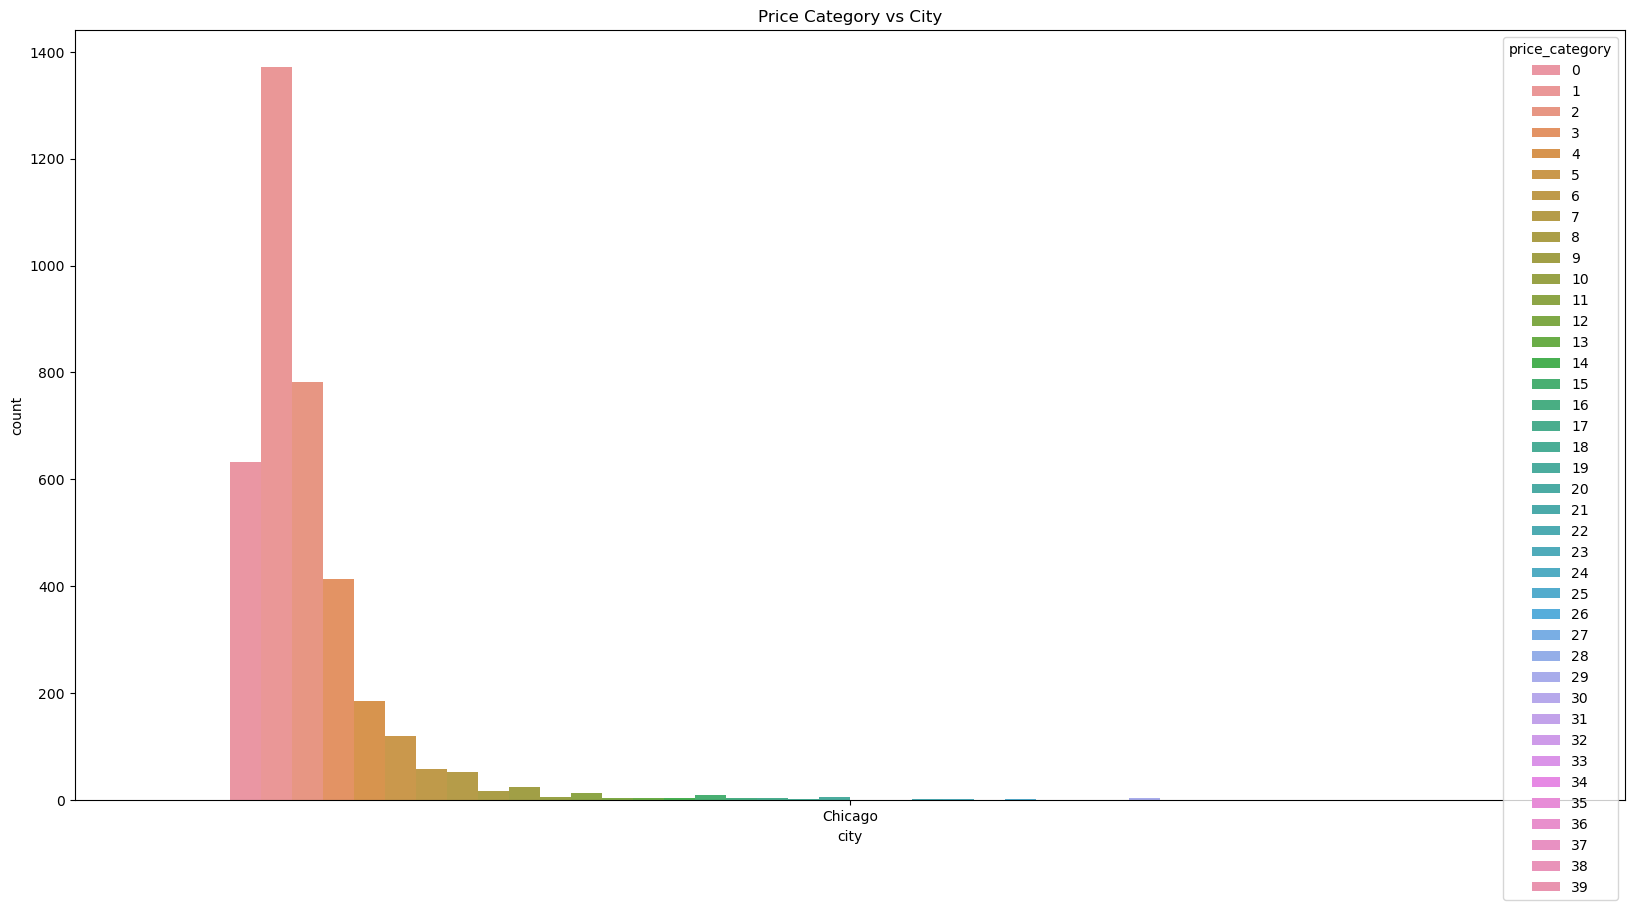

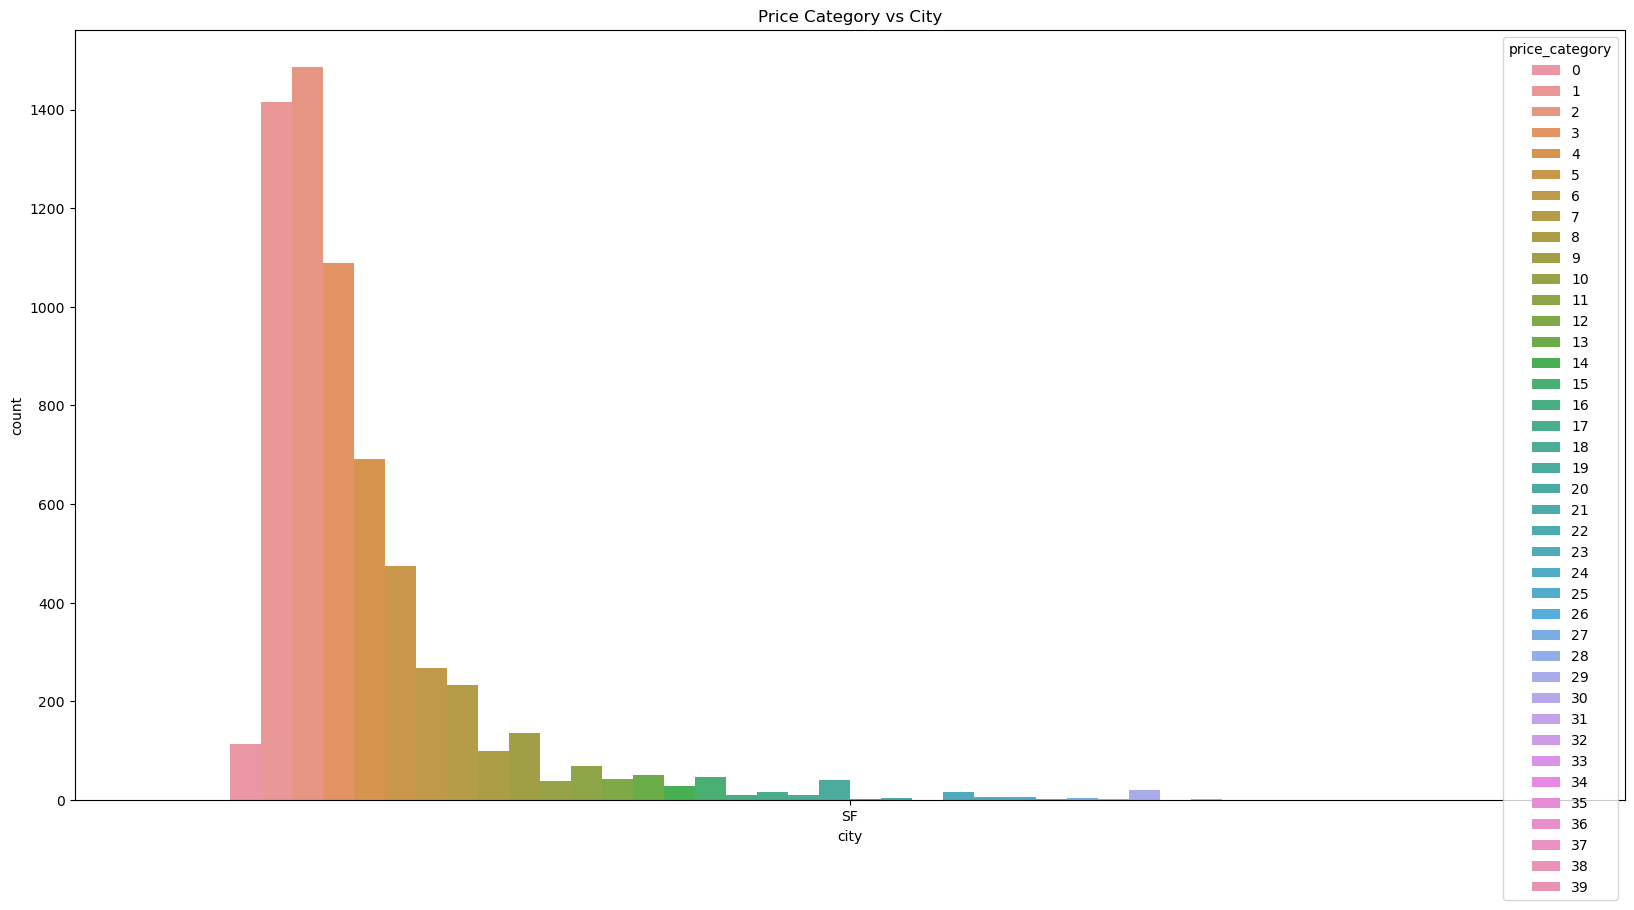

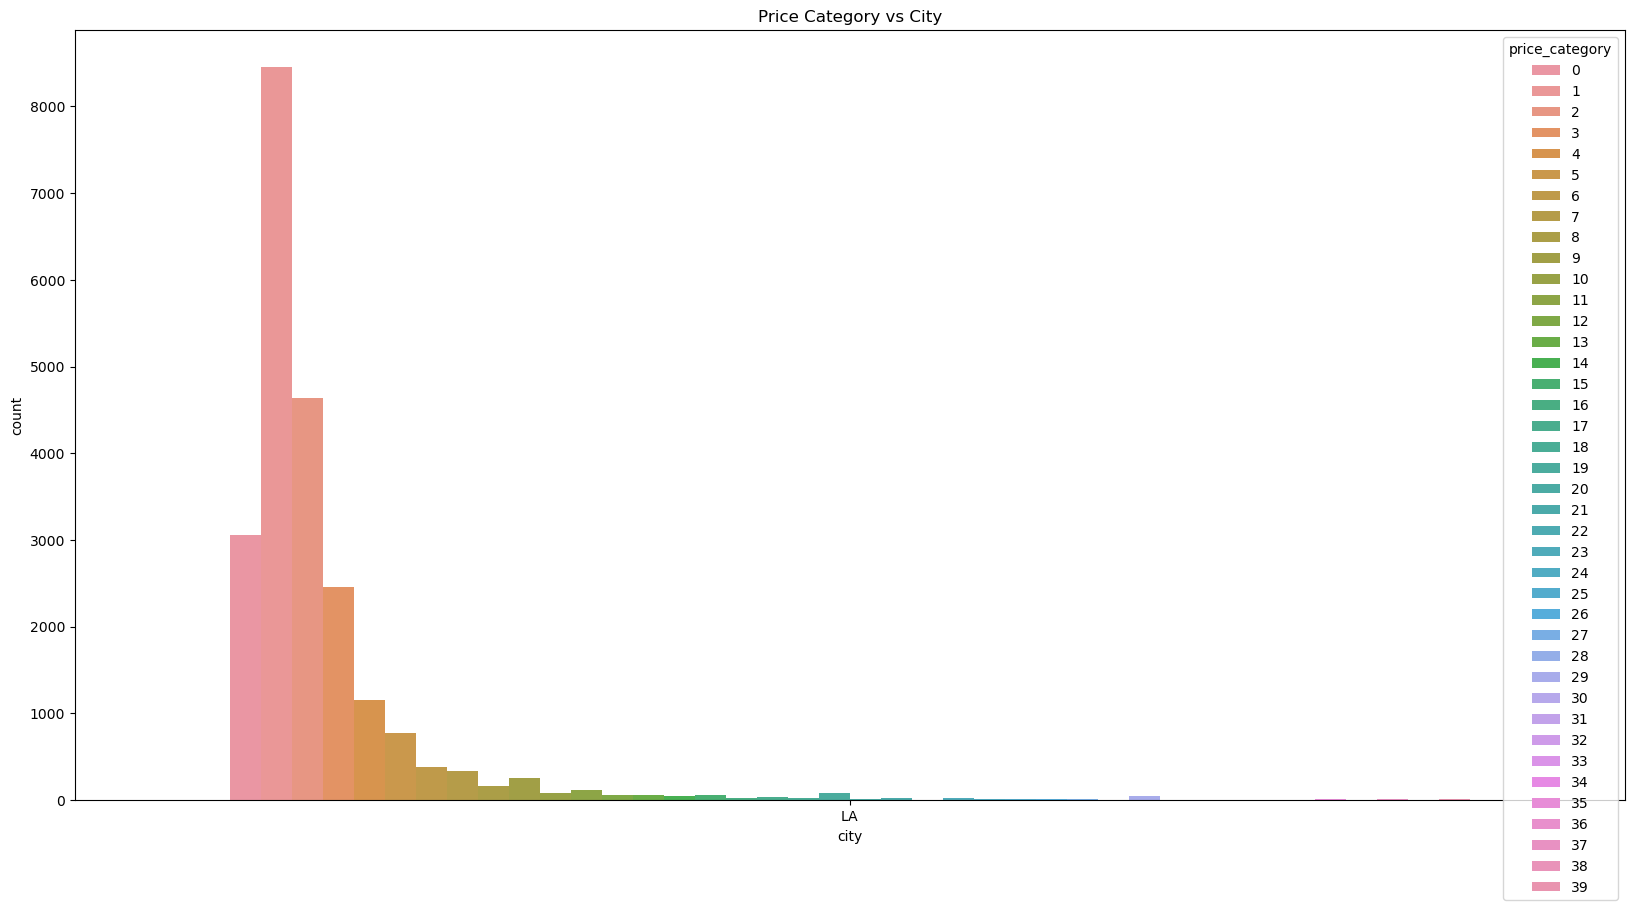

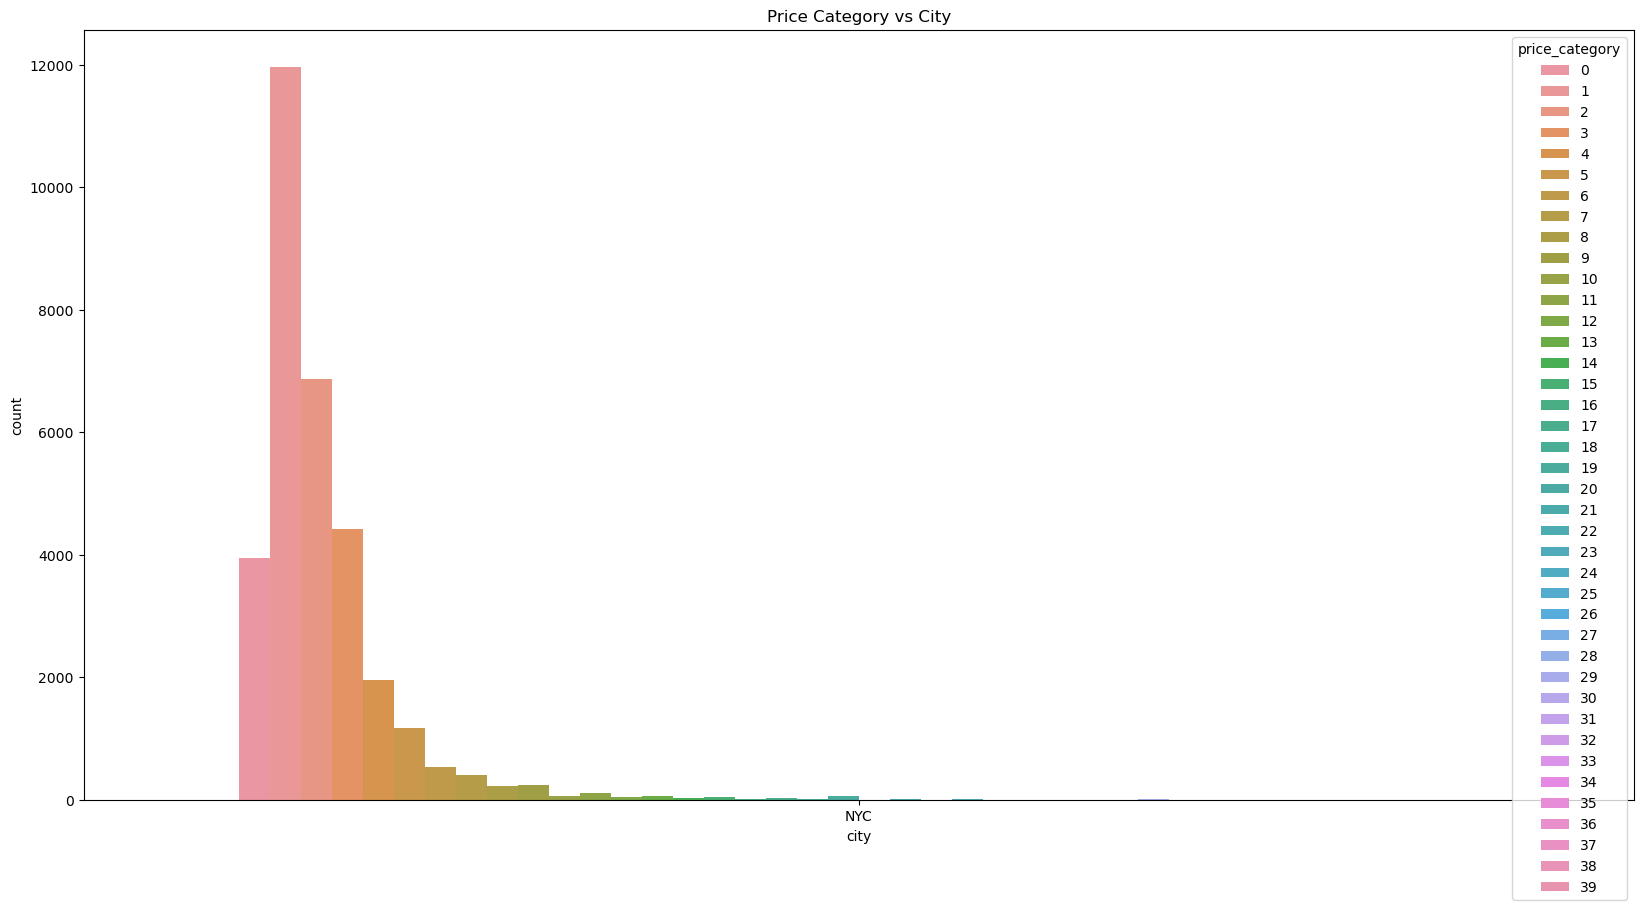

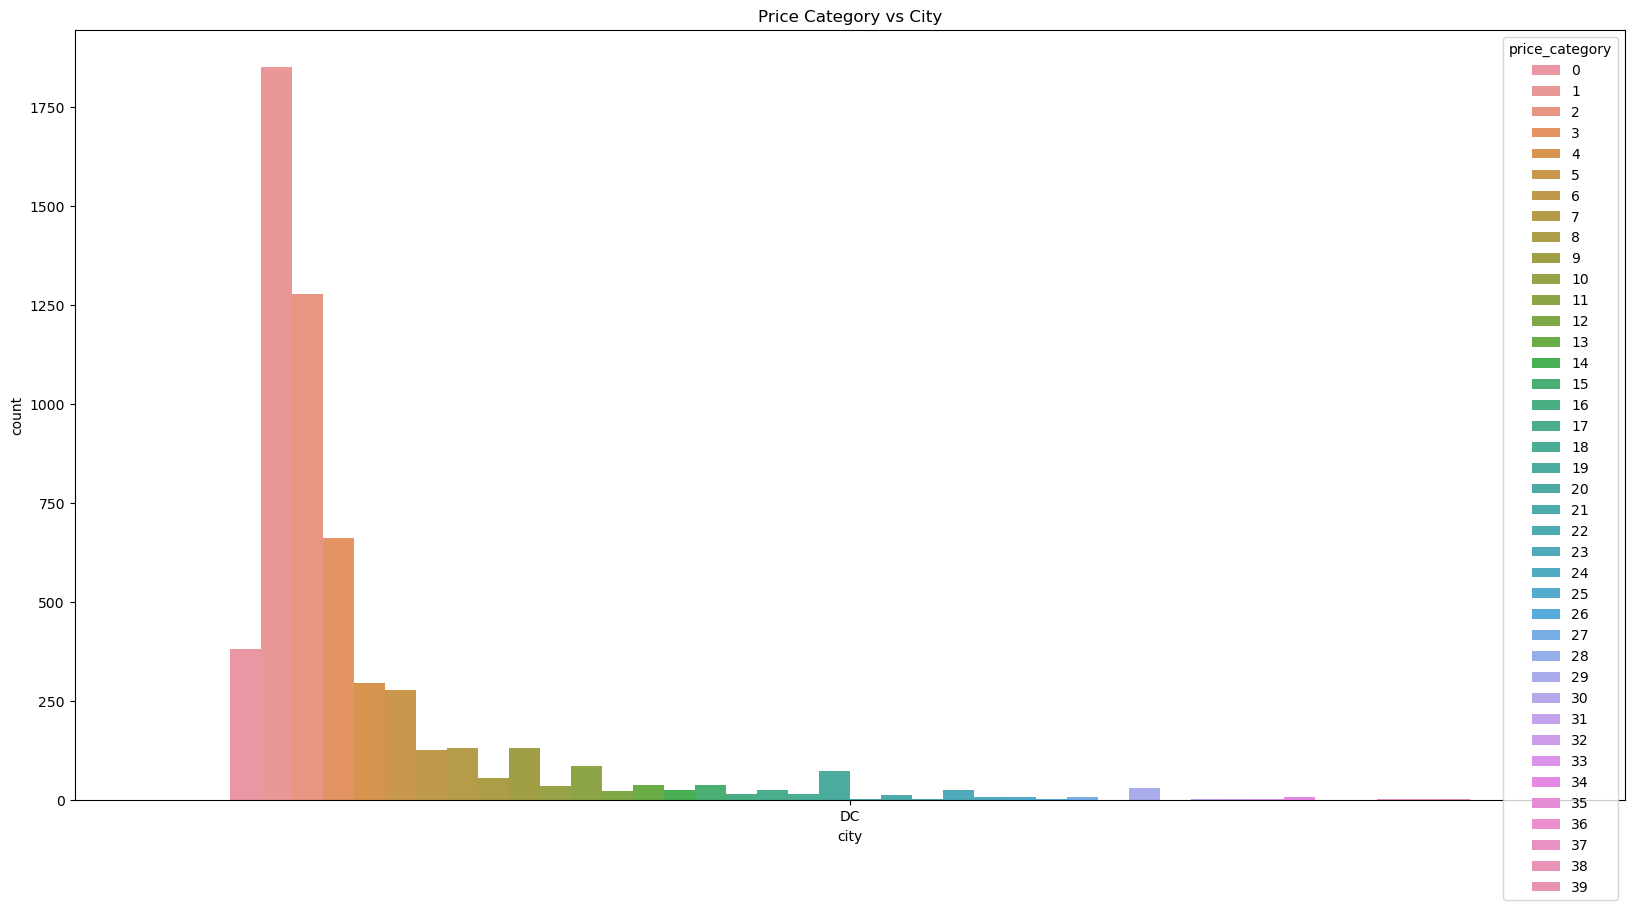

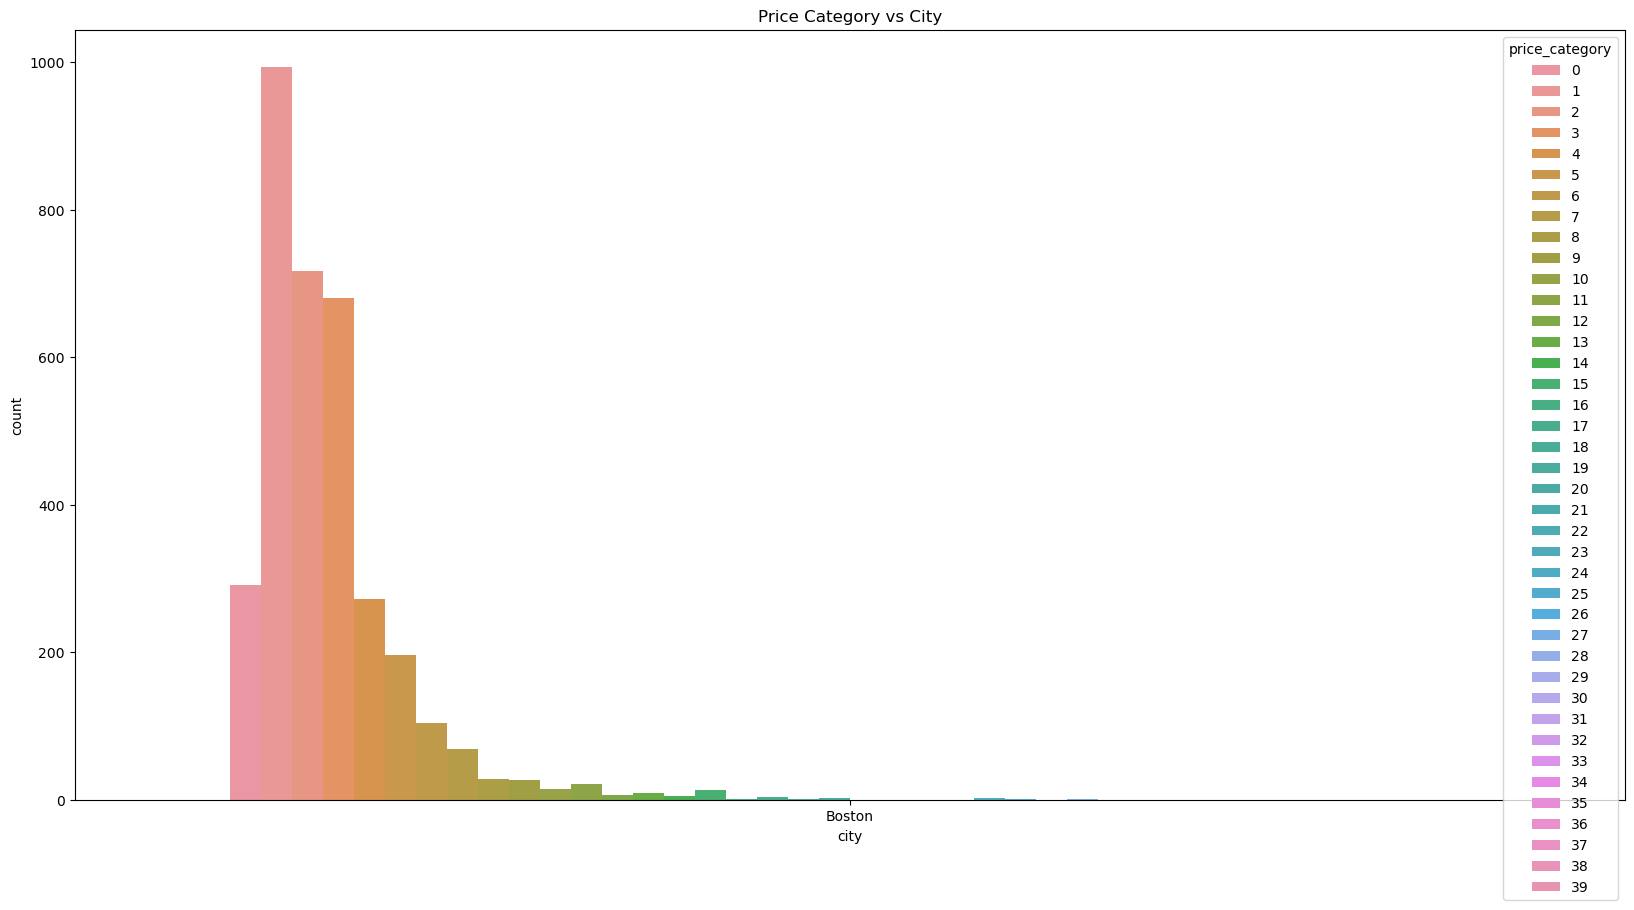

In [43]:
# see the trend between the price category and the city
#use a frozen list to store the price categories in the data, as they are unhashable

unique_city = set()
for index, row in df.iterrows():
    unique_city.add(row['city'])

print(unique_city)

price_categories = FrozenList(df['price_category'])
price_categories = price_categories.freeze()
#plot the price category against the city
plt.figure(figsize=(20,10))
sns.countplot(x='city', hue=price_categories, data=df)
plt.title('Price Category vs City')
plt.show()
#for each city we can see the distribution of the price categories
for city in unique_city:
    plt.figure(figsize=(20,10))
    sns.countplot(x='city', hue=df['price_category'], data=df[df['city'] == city])
    plt.title('Price Category vs City')
    plt.show()




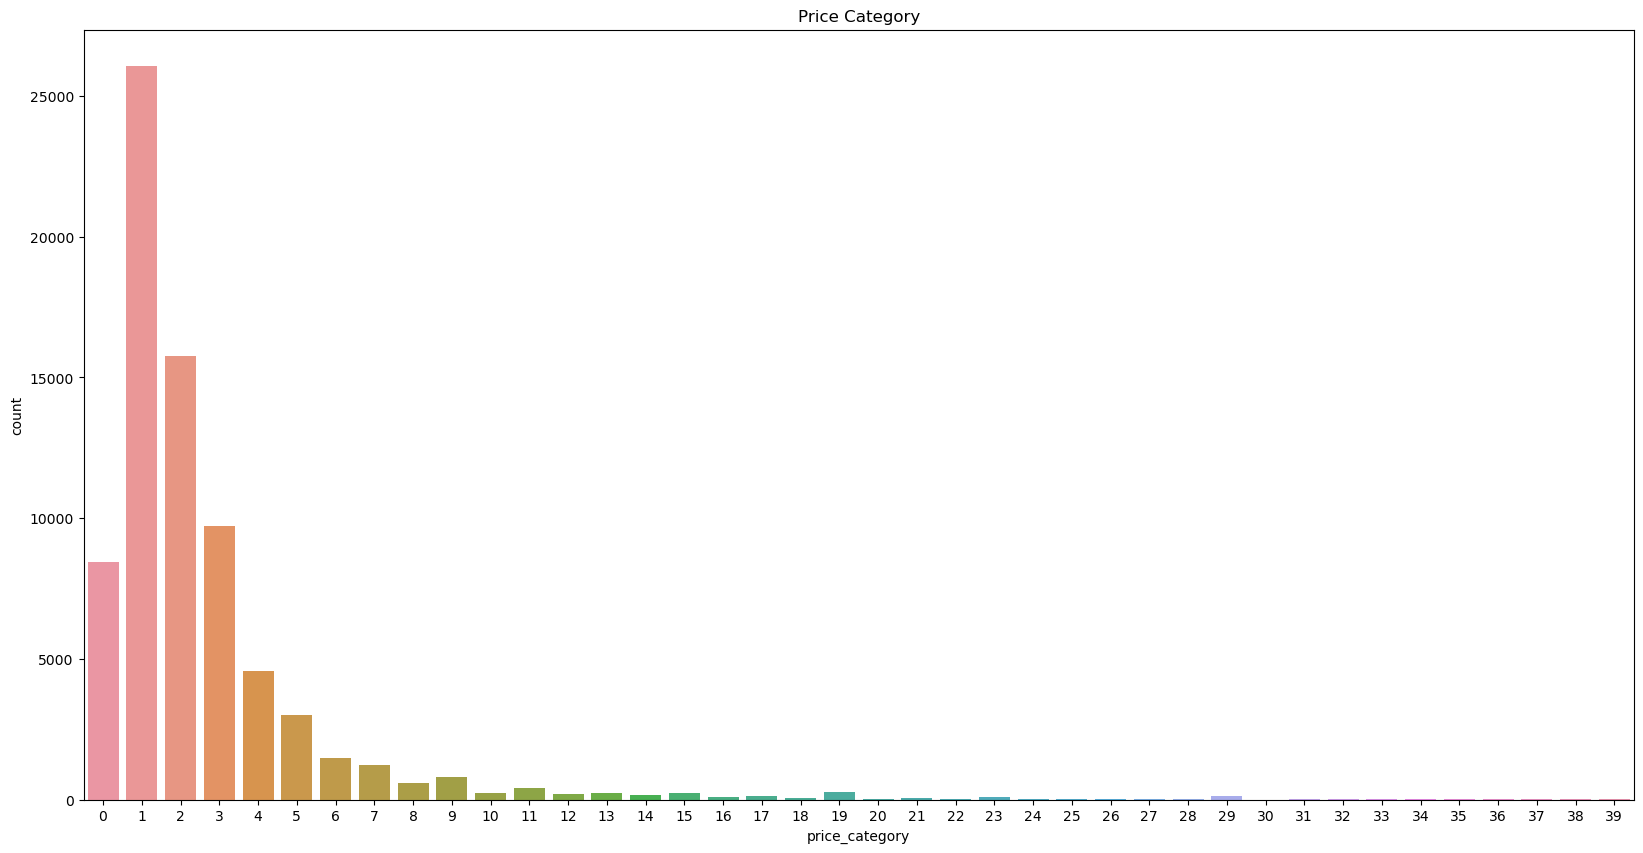

In [42]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['price_category'])
plt.title('Price Category')
plt.show()

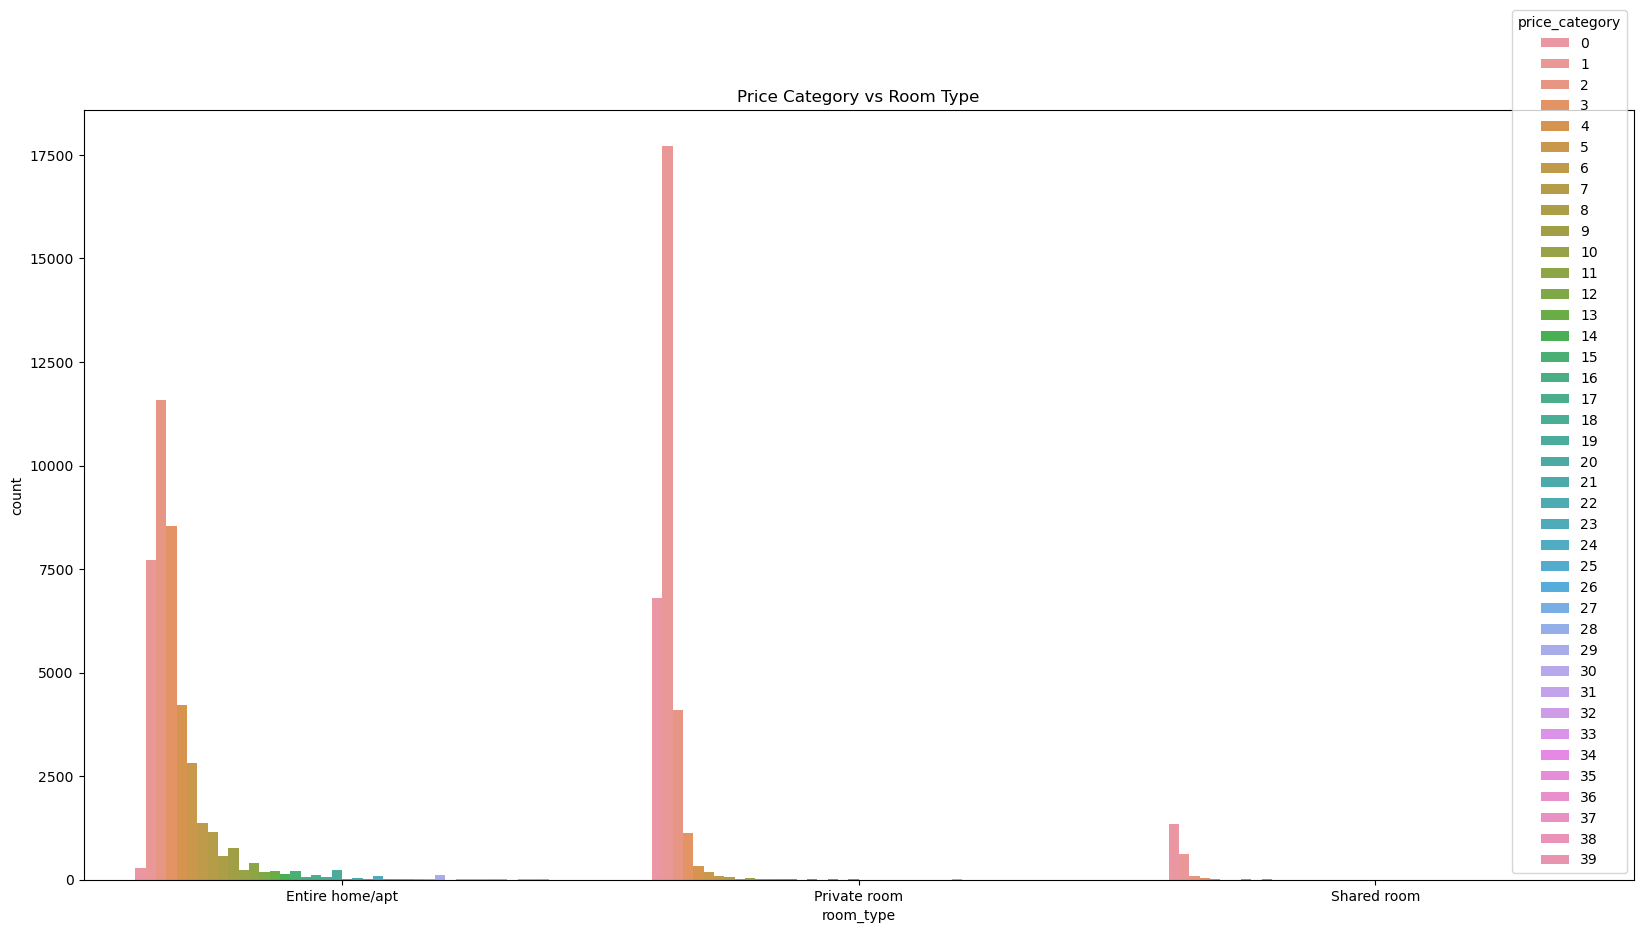

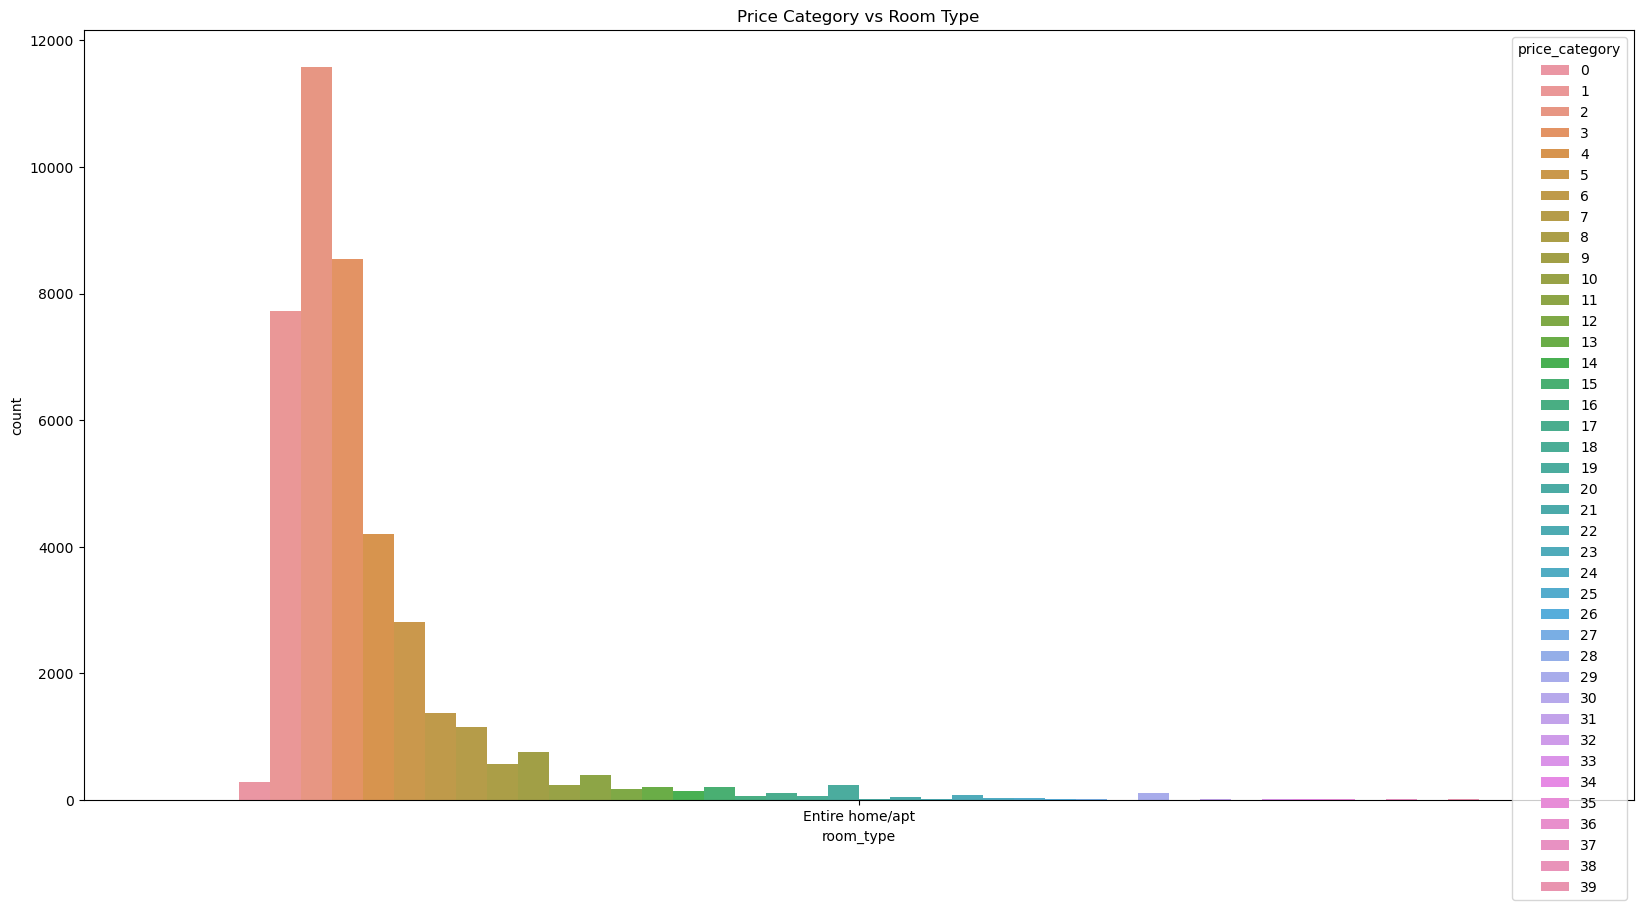

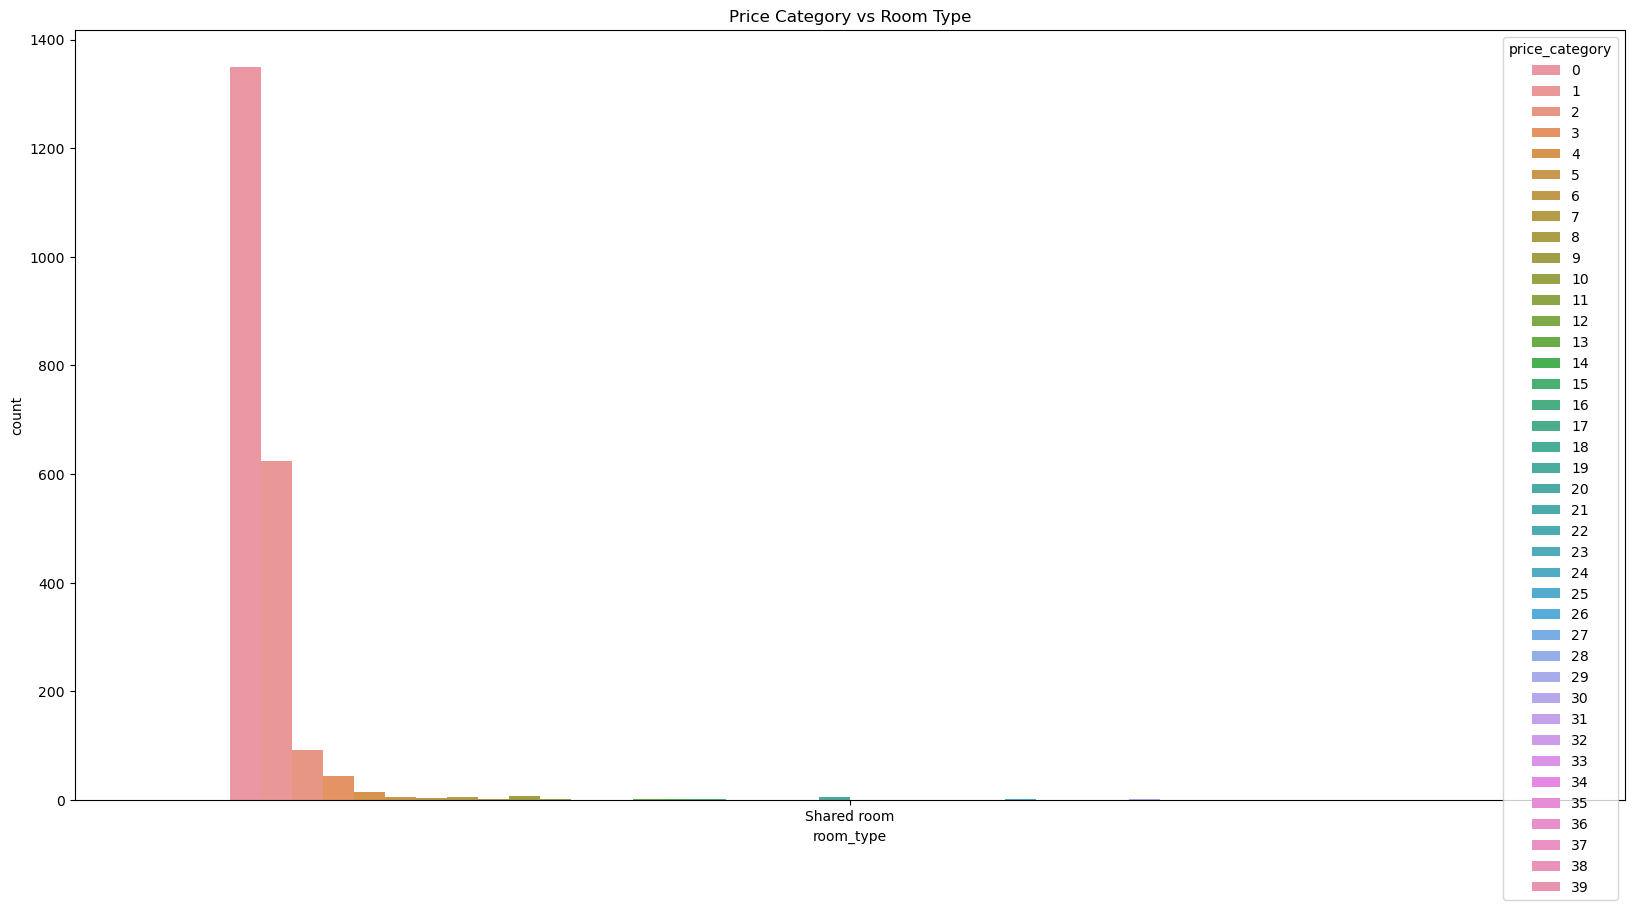

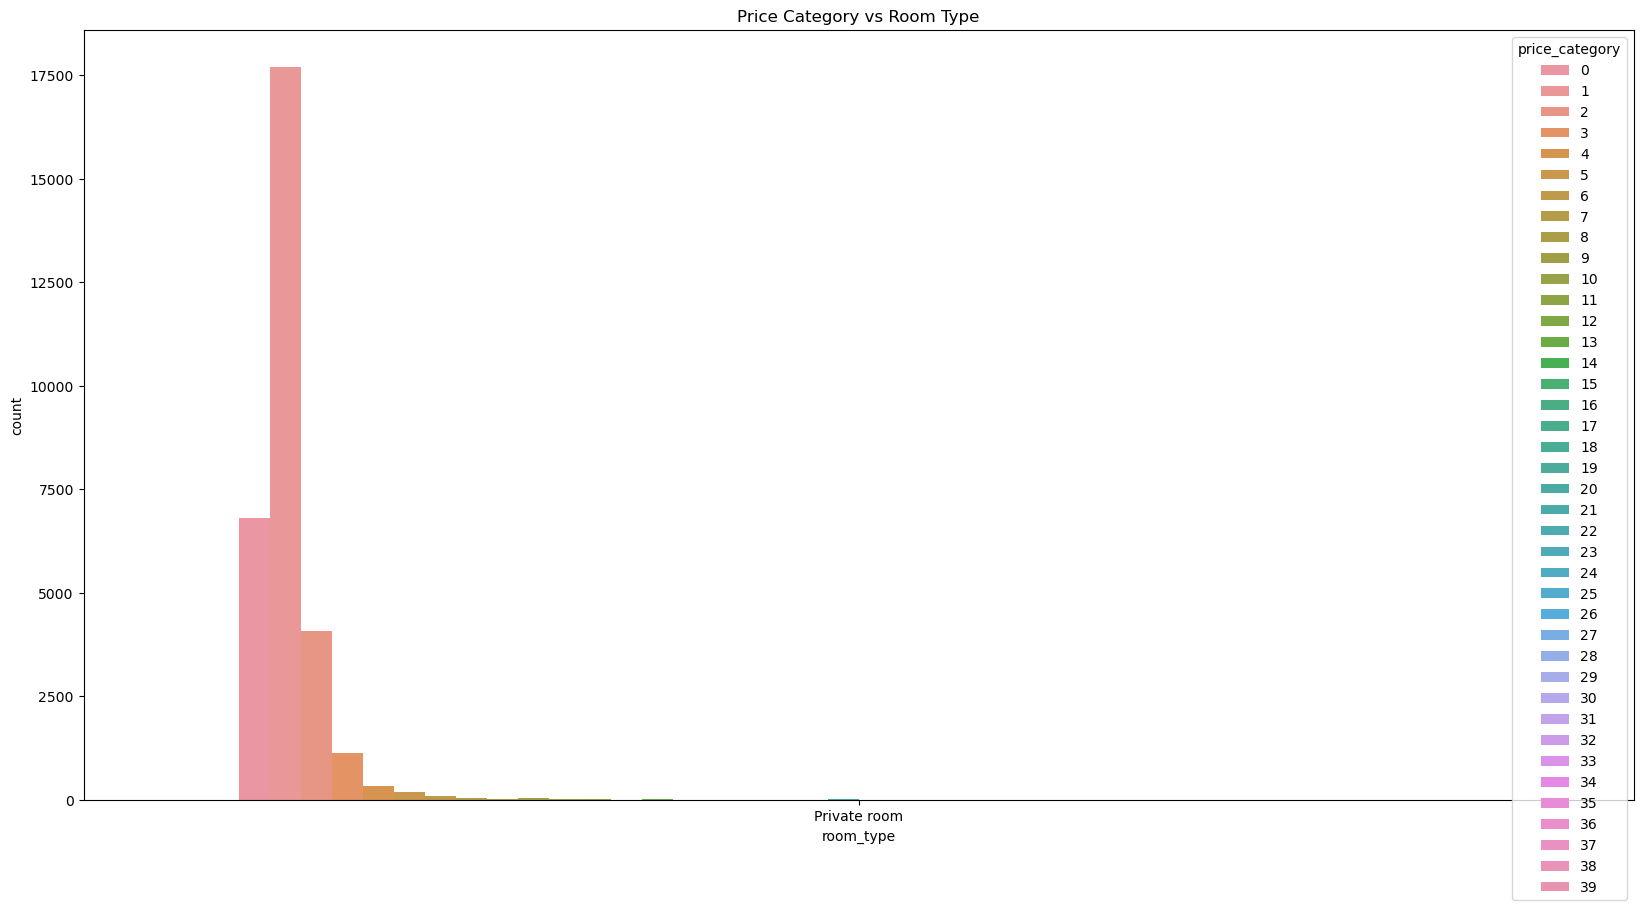

In [48]:
#plot the price category against the room type
plt.figure(figsize=(20,10))
sns.countplot(x='room_type', hue=df['price_category'], data=df)
plt.title('Price Category vs Room Type')
plt.show()
# for each room type we can see the distribution of the price categories
for room_type in set(df['room_type']):
    plt.figure(figsize=(20,10))
    sns.countplot(x='room_type', hue=df['price_category'], data=df[df['room_type'] == room_type])
    plt.title('Price Category vs Room Type')
    plt.show()

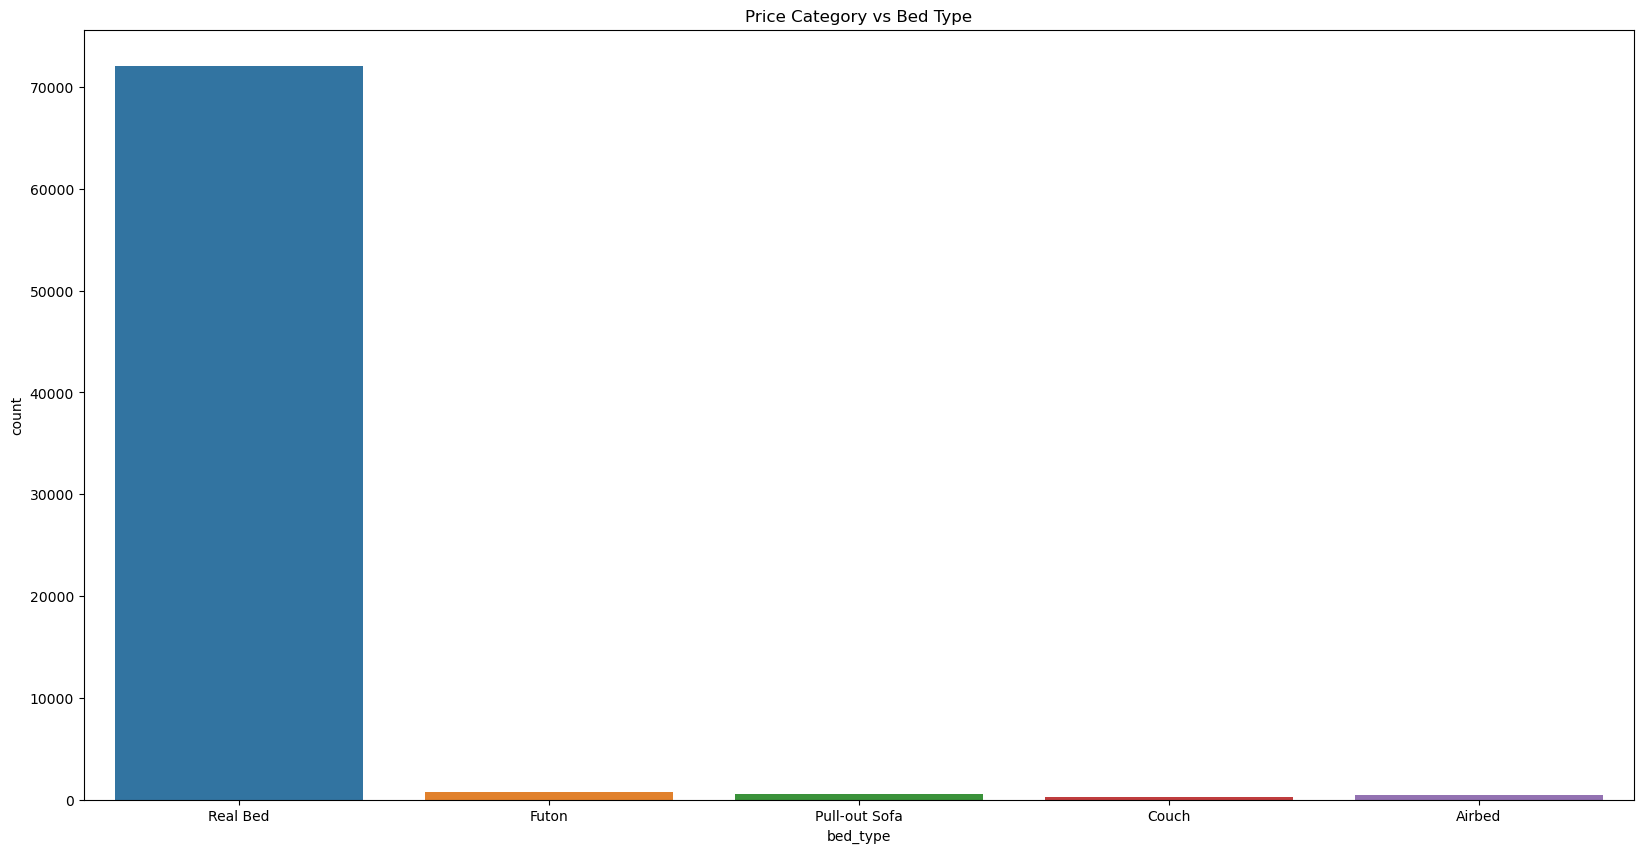

In [50]:
#plot the price category against the bed type
plt.figure(figsize=(20,10))
sns.countplot(x='bed_type', data=df)
plt.title('Price Category vs Bed Type')
plt.show()

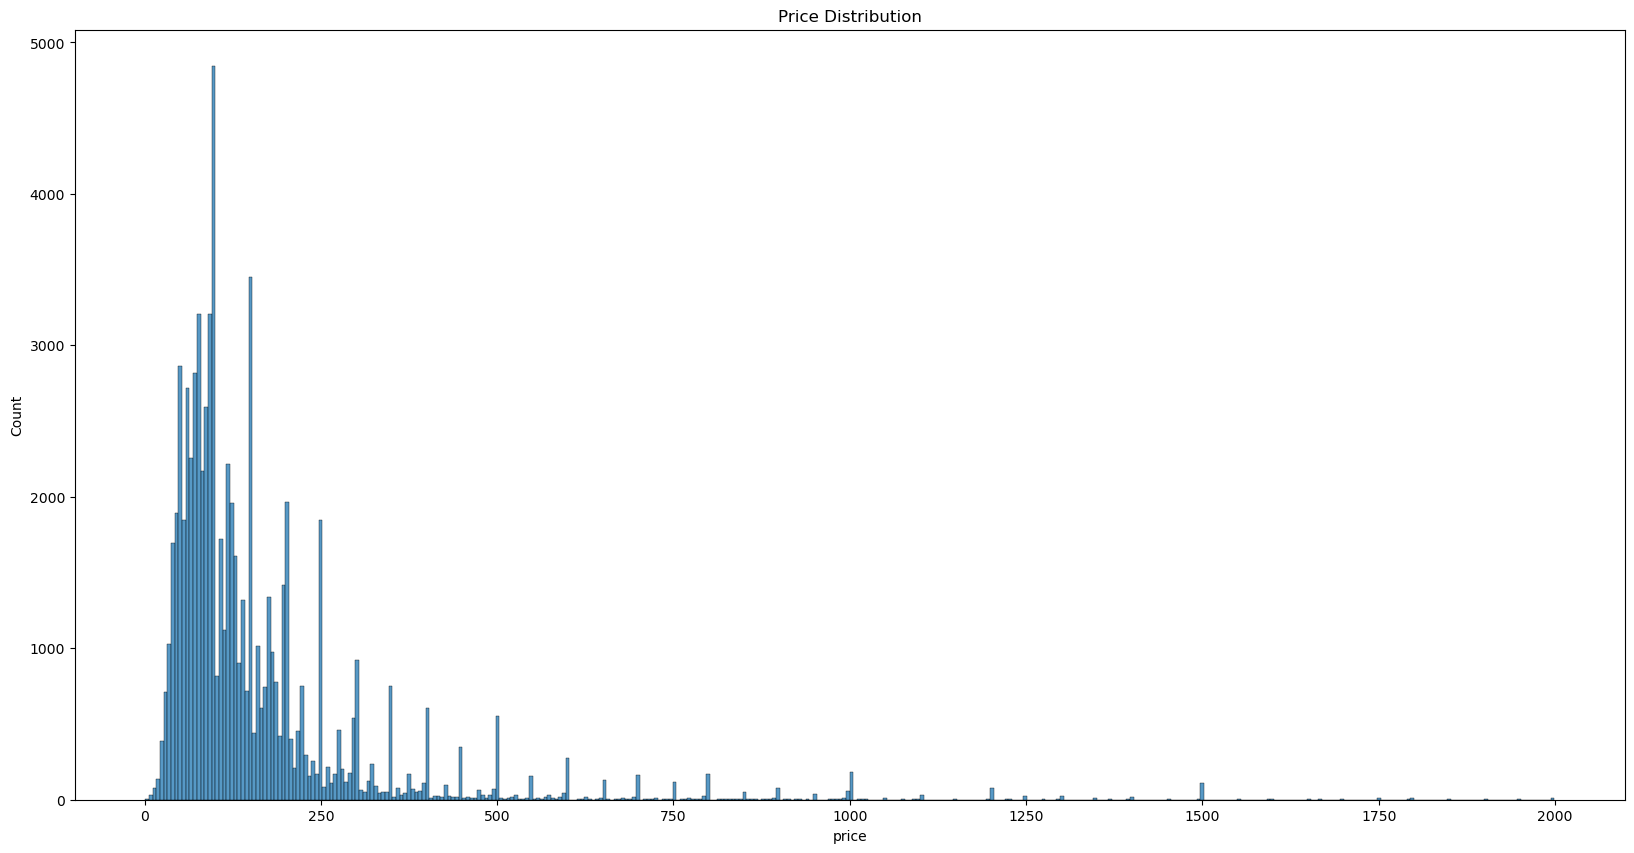

In [63]:
#plot prices 
plt.figure(figsize=(20,10))
sns.histplot(df['price'])
plt.title('Price Distribution')
plt.show()

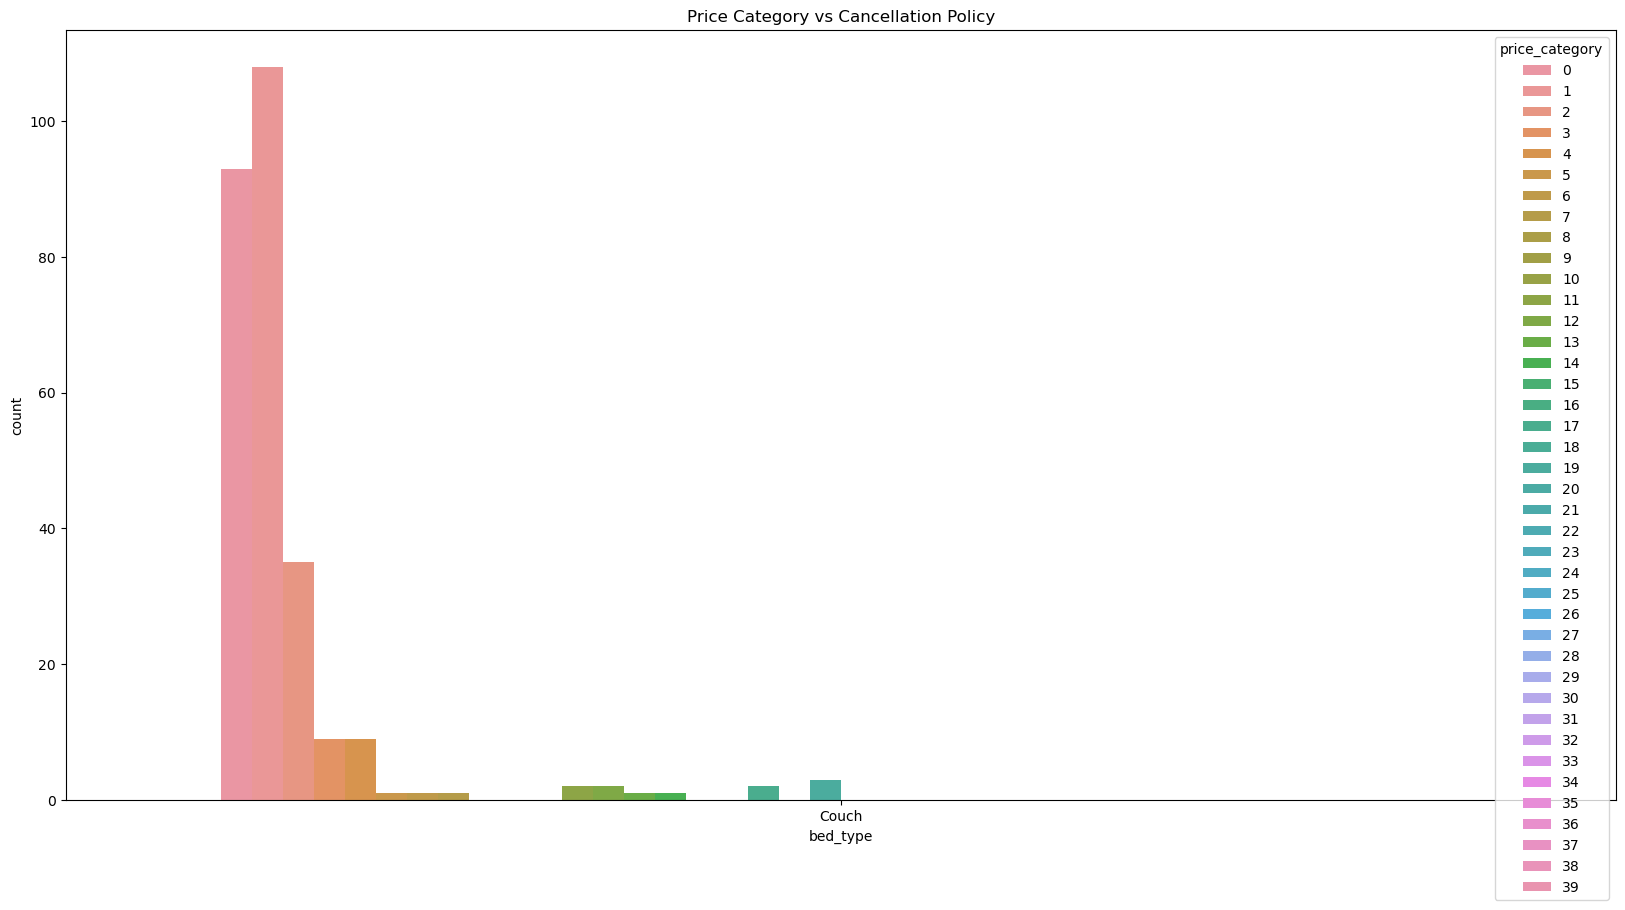

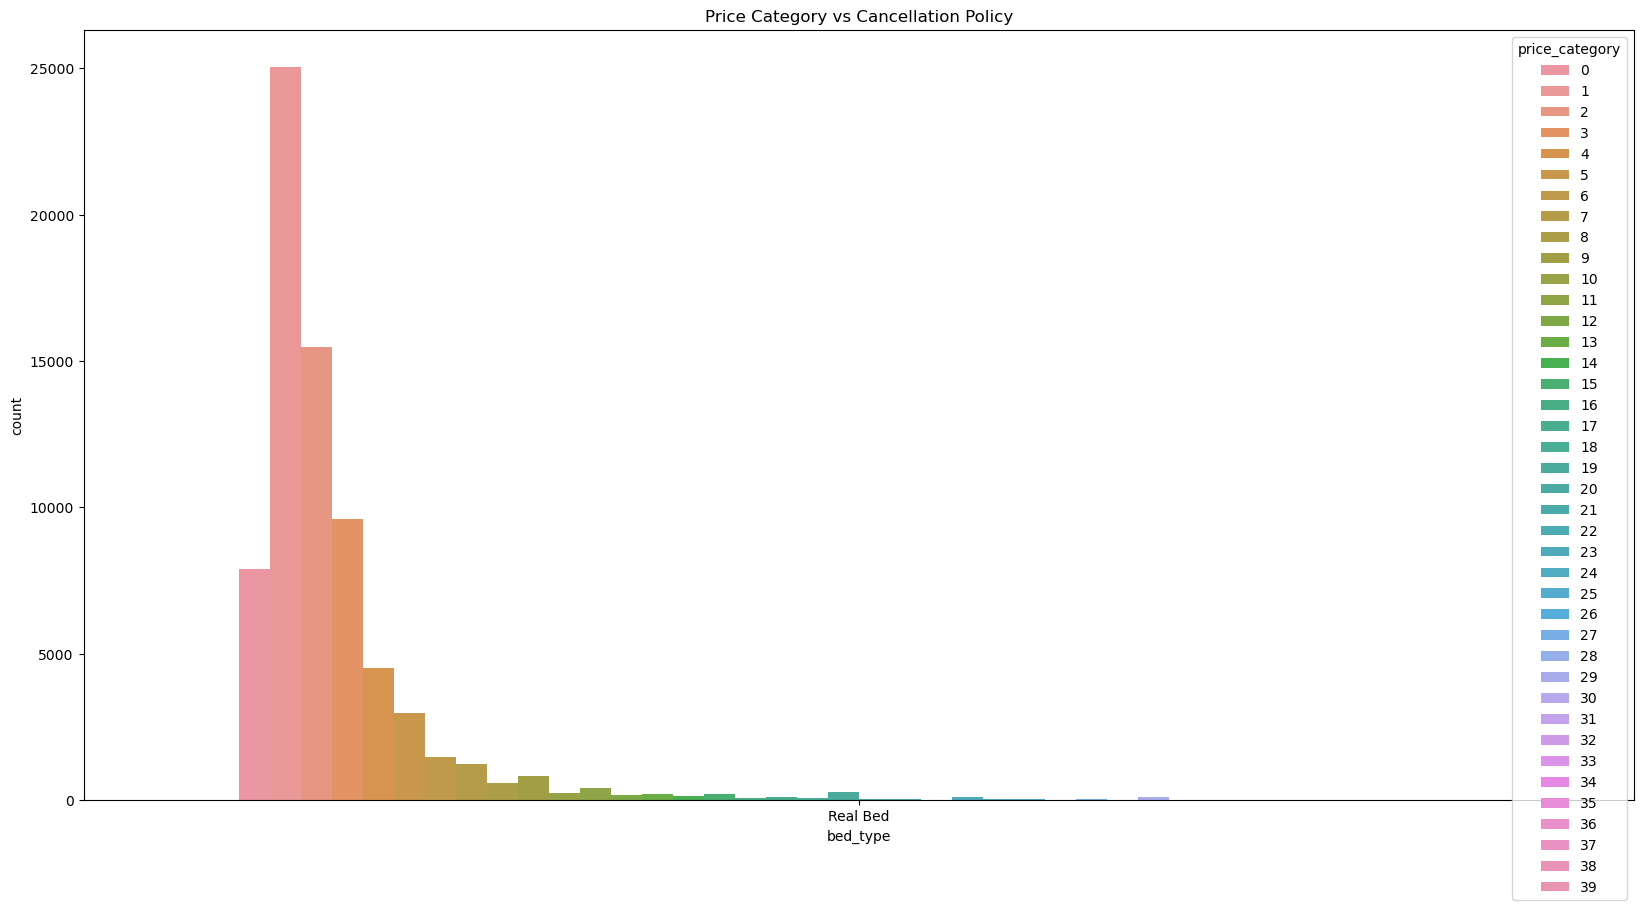

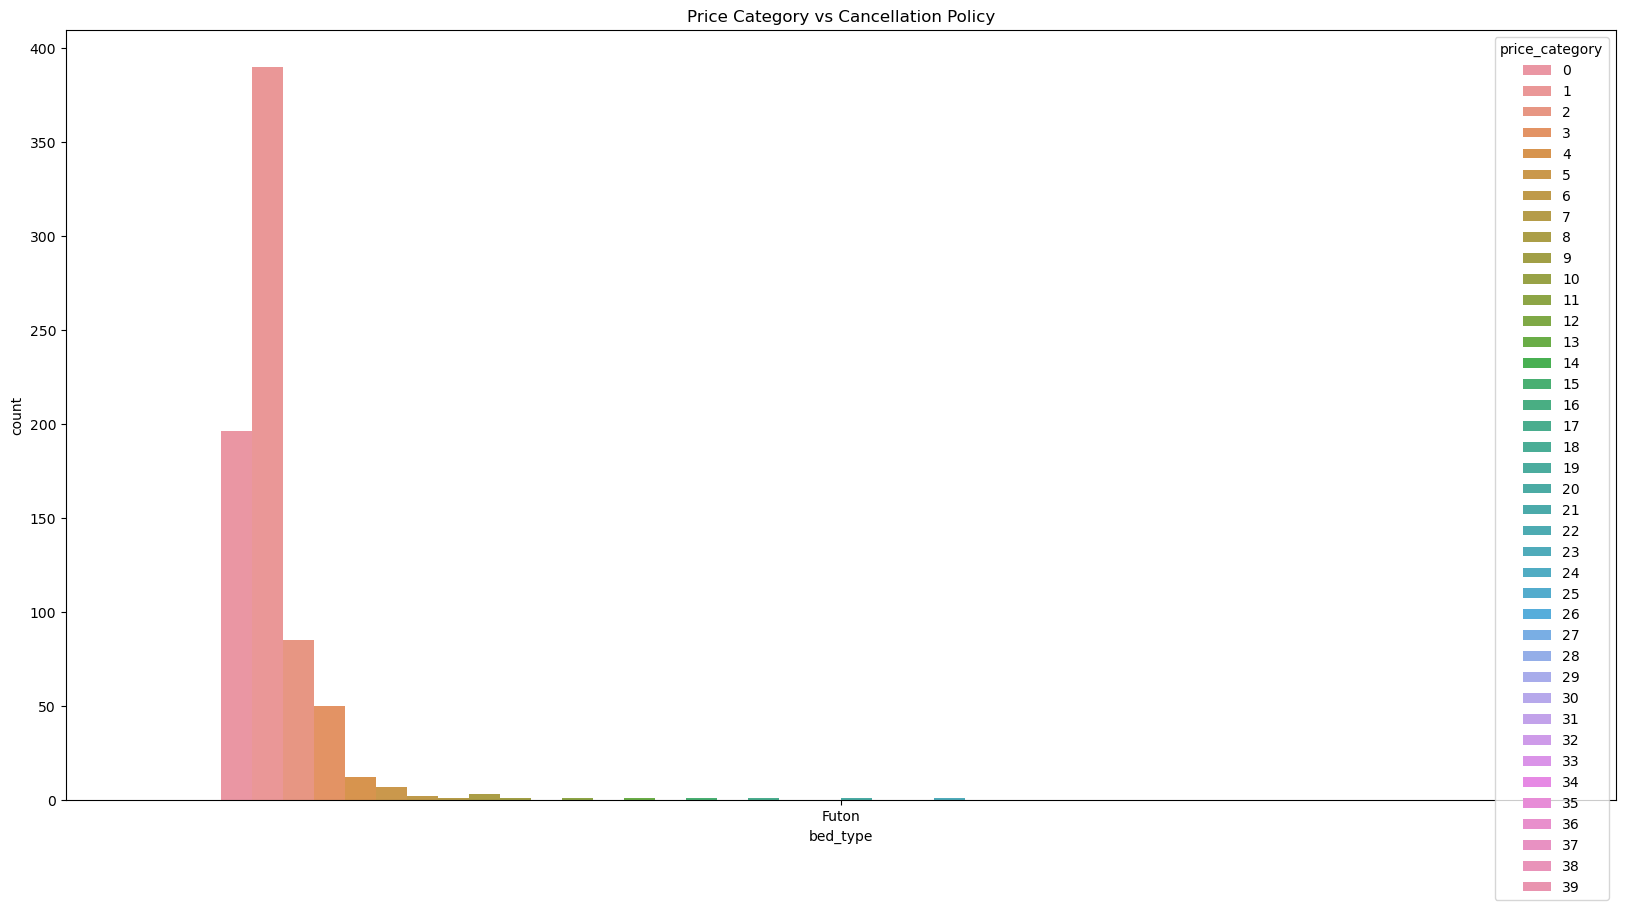

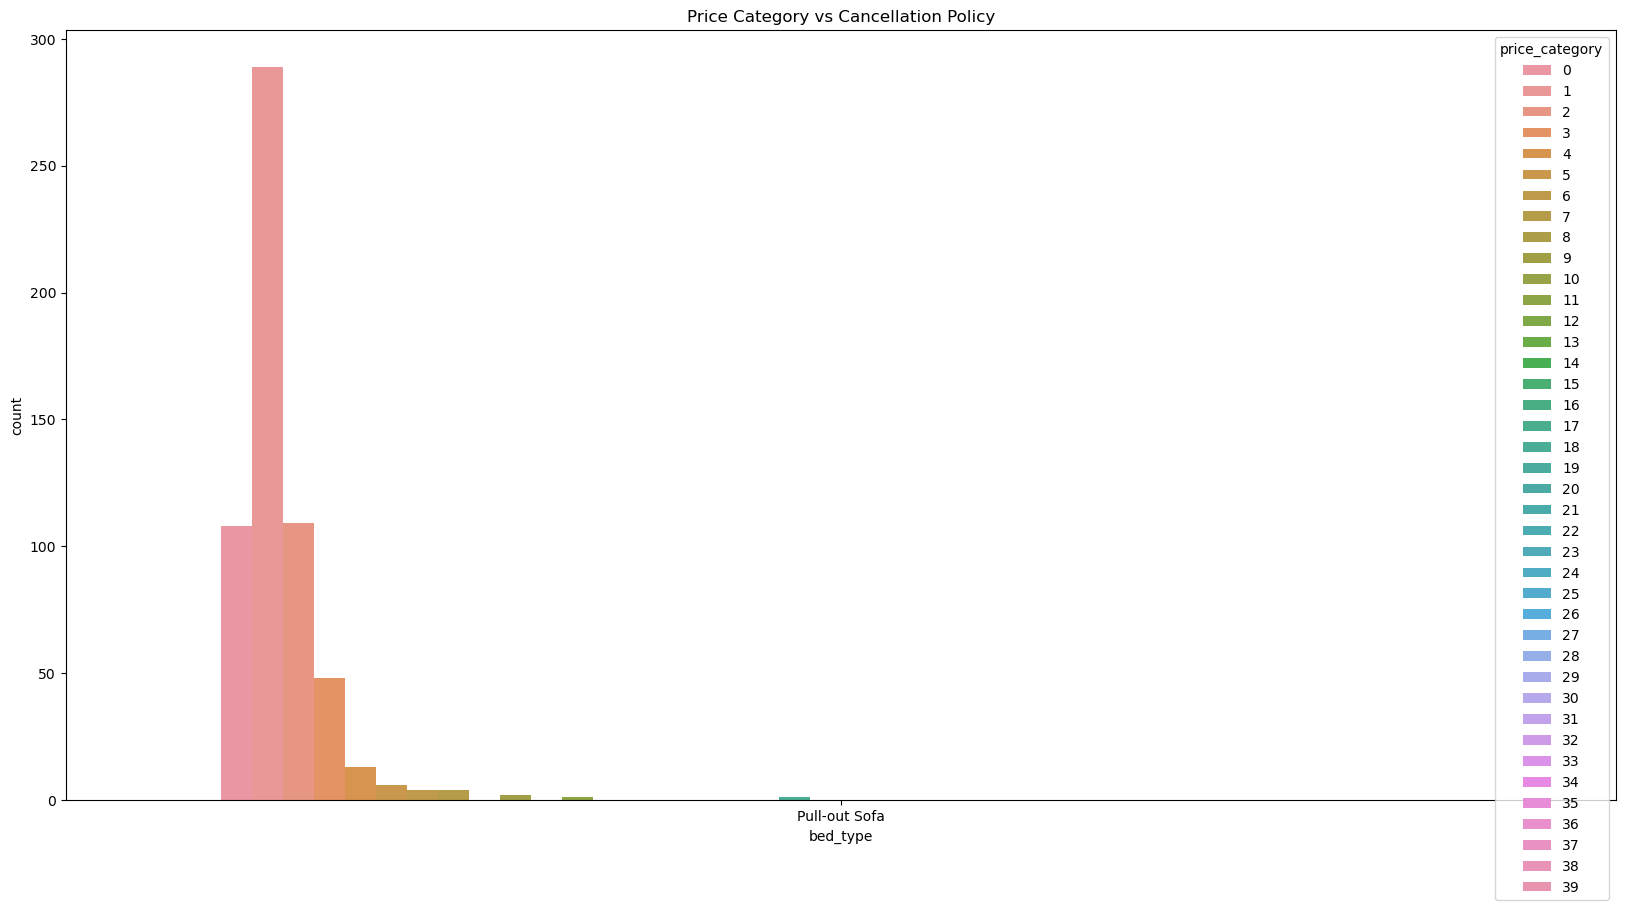

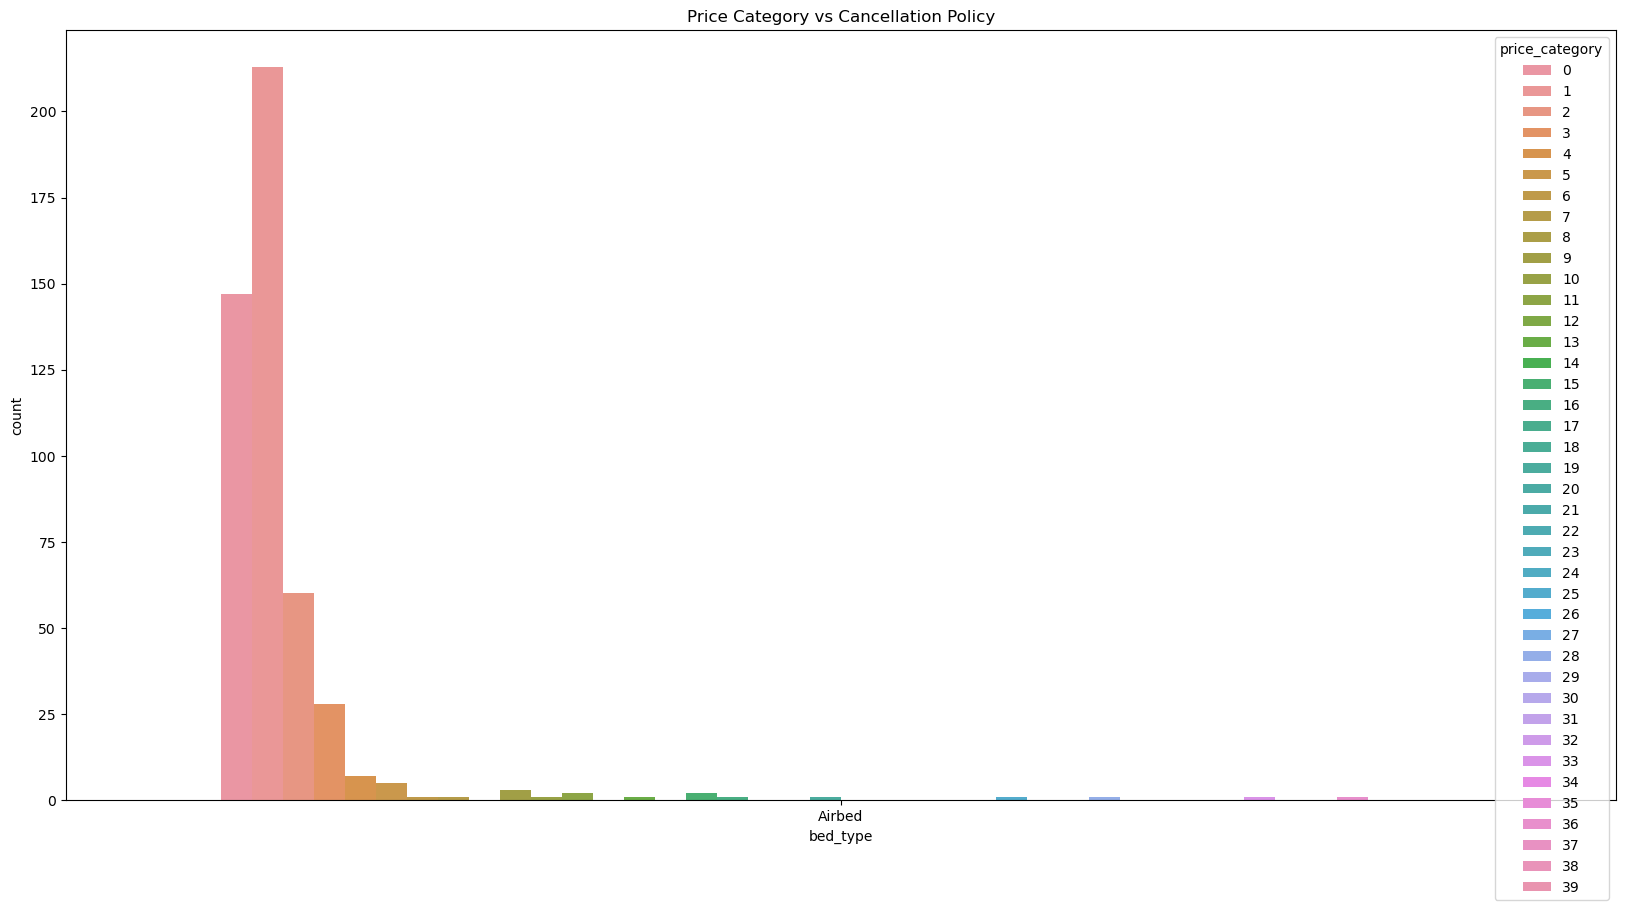

In [62]:
for bed in set(df['bed_type']):
    plt.figure(figsize=(20,10))
    sns.countplot(x='bed_type',hue=df['price_category'], data=df[df['bed_type'] == bed])
    plt.title('Price Category vs Cancellation Policy')
    plt.show()

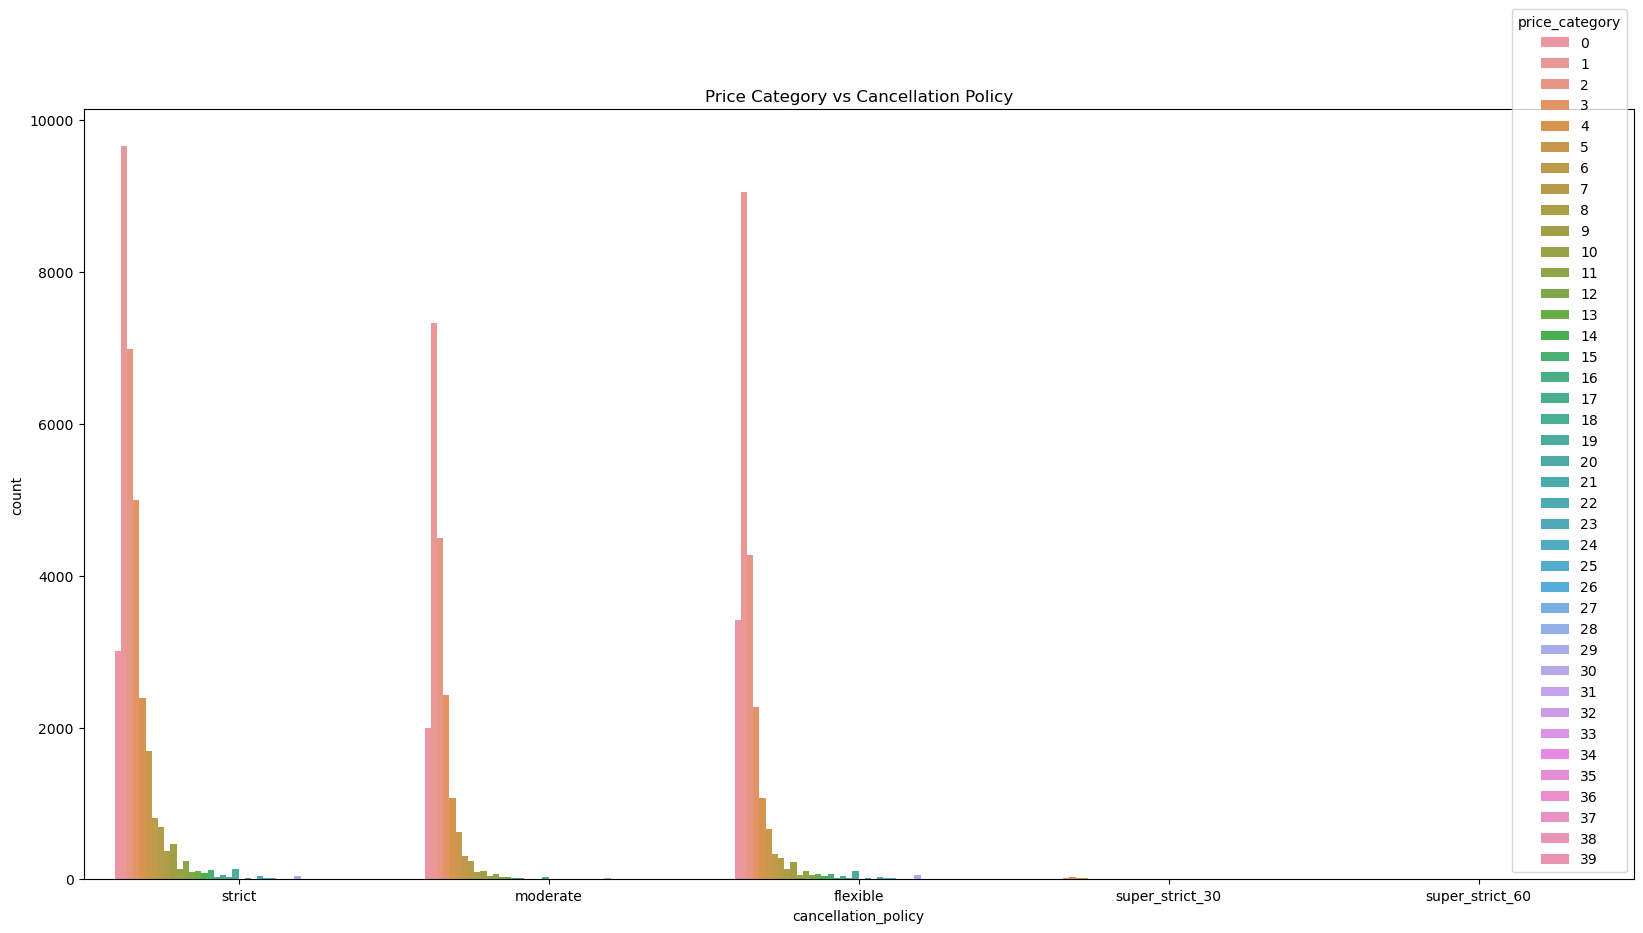

In [54]:
# plot the price category against the cancellation policy
plt.figure(figsize=(20,10))
sns.countplot(x='cancellation_policy',hue='price_category', data=df)
plt.title('Price Category vs Cancellation Policy')
plt.show()

In [55]:
#get the unique accomodates values
accomodates = set()
for index, row in df.iterrows():
    accomodates.add(row['accommodates'])
print(accomodates)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}


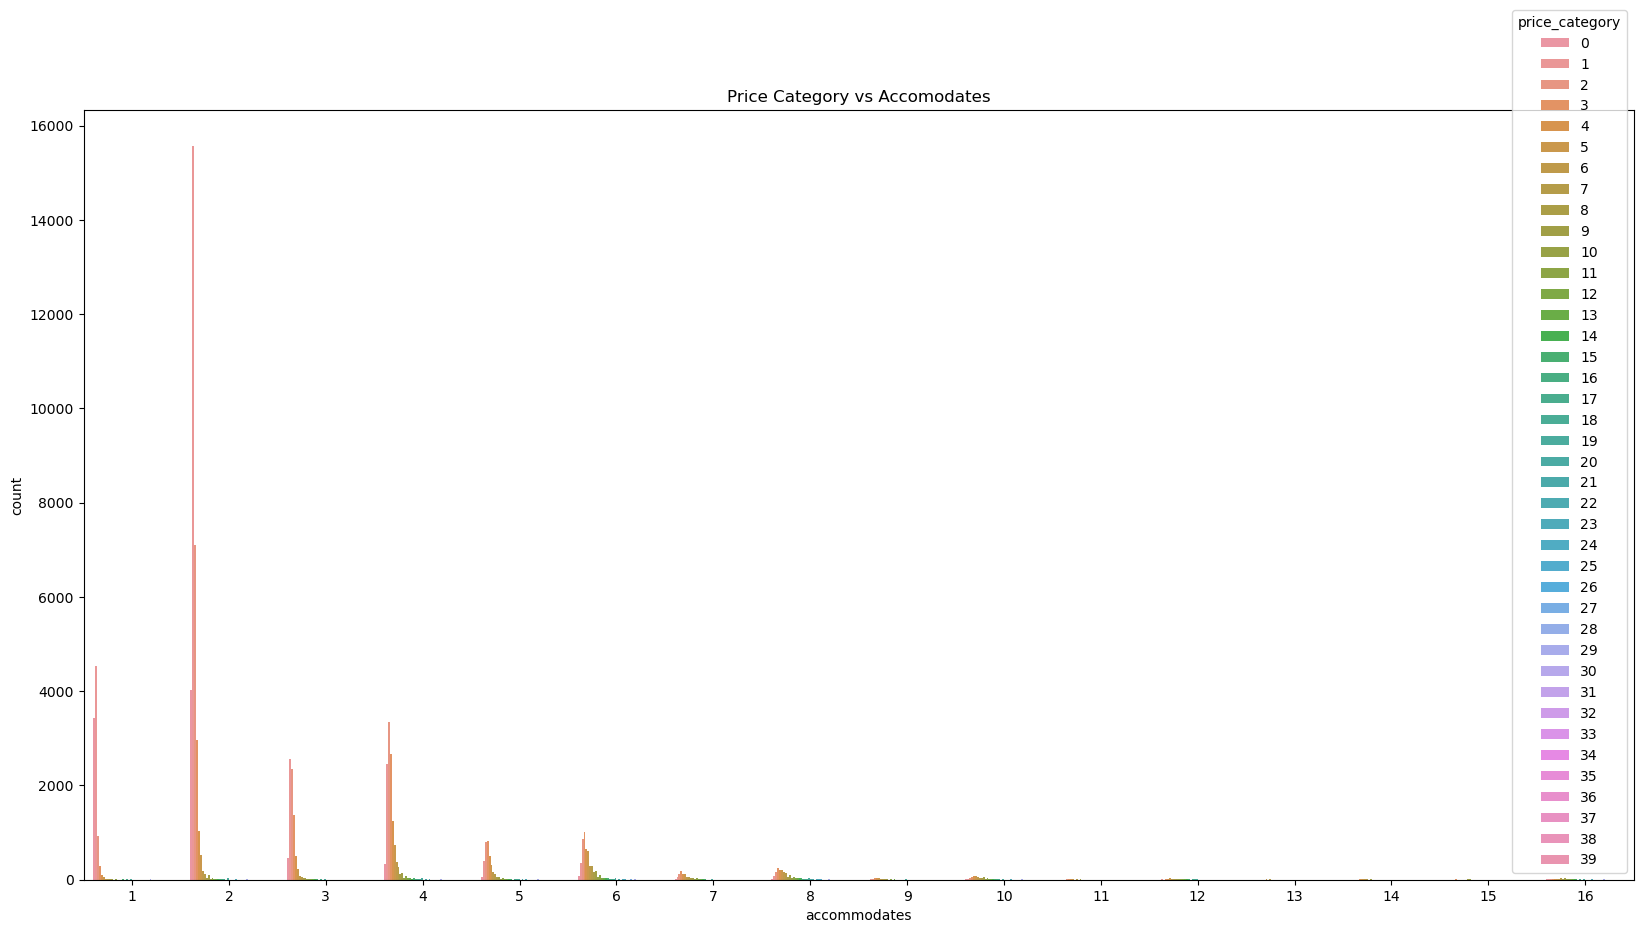

In [59]:
#plot the price category against the accomodates
plt.figure(figsize=(20,10))
sns.countplot(x='accommodates',hue=df['price_category'], data=df)
plt.title('Price Category vs Accomodates')
plt.show()

In [58]:
#get the unique bathrooms values
bathrooms = set()
for index, row in df.iterrows():
    bathrooms.add(row['bathrooms'])
print(bathrooms)

{0.5, 1.0, 2.0, 1.5, 2.5, 3.0, 4.5, 5.0, 0.0, 4.0, 3.5, nan, 5.5, 7.5, 6.0, 8.0, nan, nan, nan, nan, nan, nan, nan, 6.5, nan, nan, nan, 7.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

# Preprocessing

In [6]:
#preprocess
#drop the following columns
newdf.drop('host_has_profile_pic', axis=1, inplace=True)
newdf.drop('bed_type', axis=1, inplace=True)
newdf.drop('zipcode', axis=1, inplace=True)
newdf.drop('longitude', axis=1, inplace=True)
newdf.drop('latitude', axis=1, inplace=True)

In [7]:
new = newdf[newdf['price'] <= 500]

In [9]:
newdf['price_category'] = pd.cut(df['price'], bins=50, labels=range(1, 51))
#0-10 usd , 11-20 usd , ...

# Prices categories

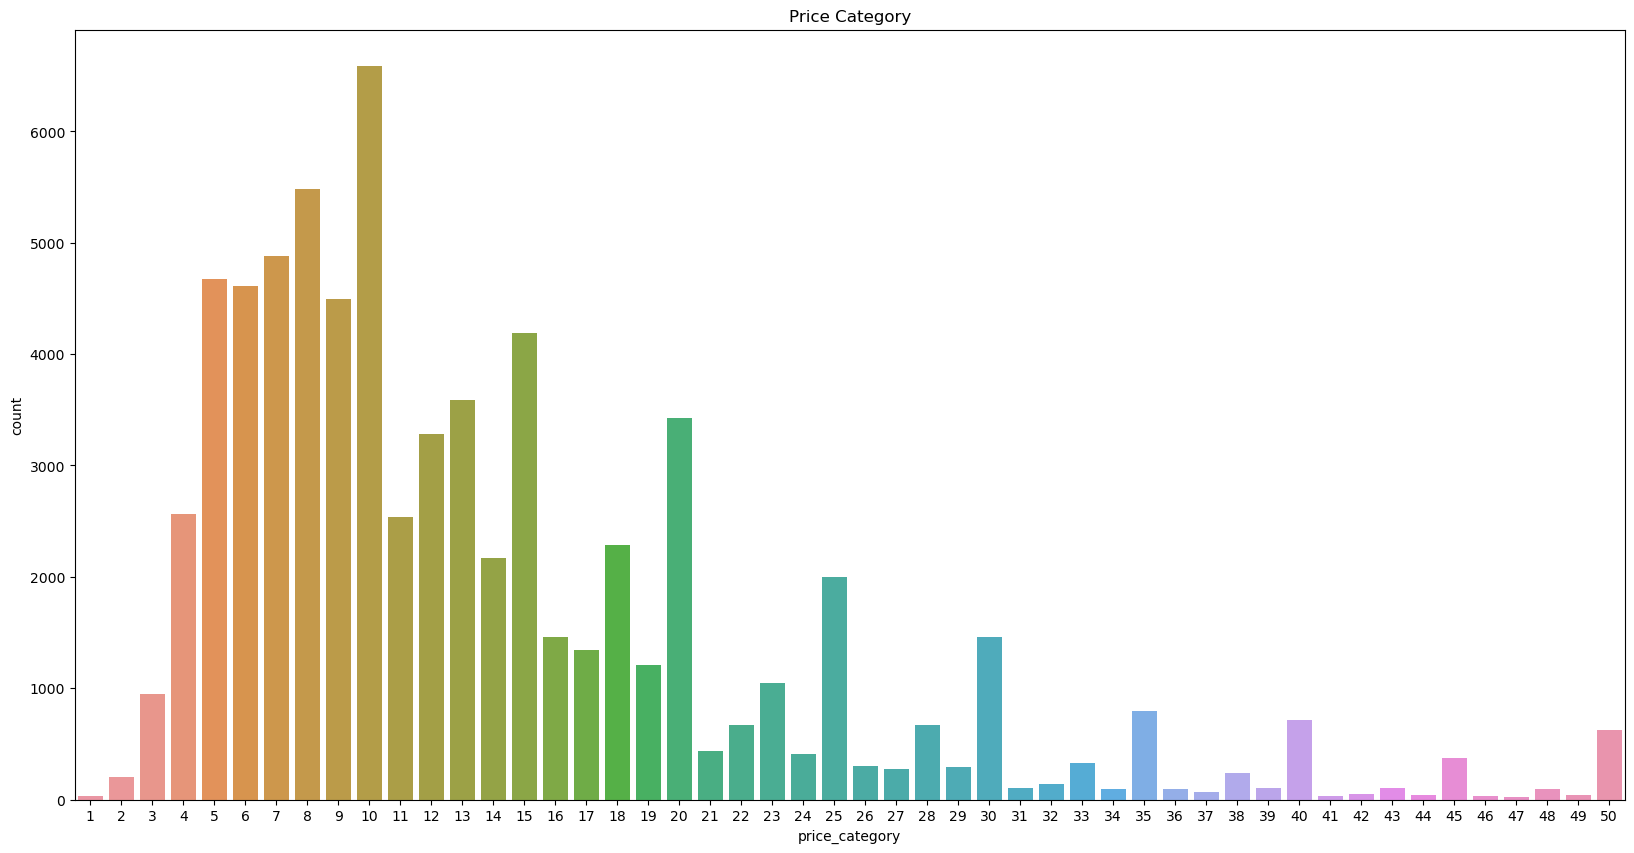

In [75]:
#plot the price category 
plt.figure(figsize=(20,10))
sns.countplot(x='price_category', data=newdf)
plt.title('Price Category')
plt.show()

# price and room type relations

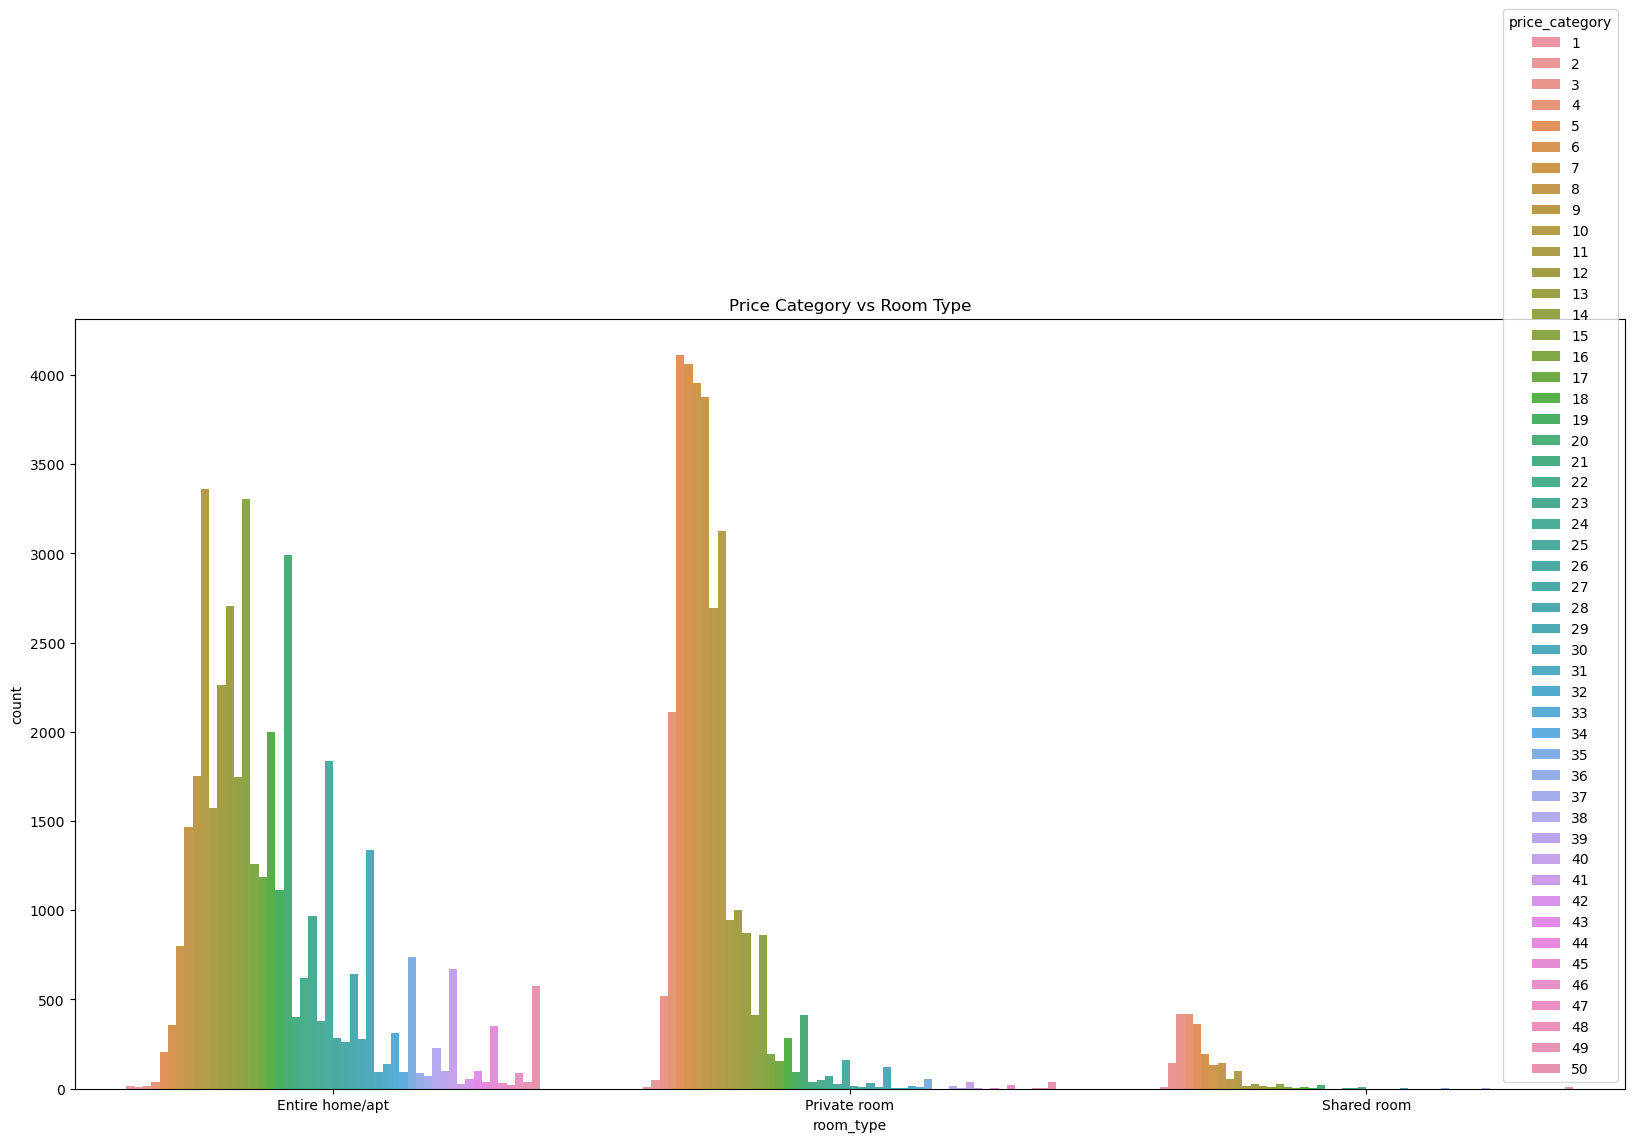

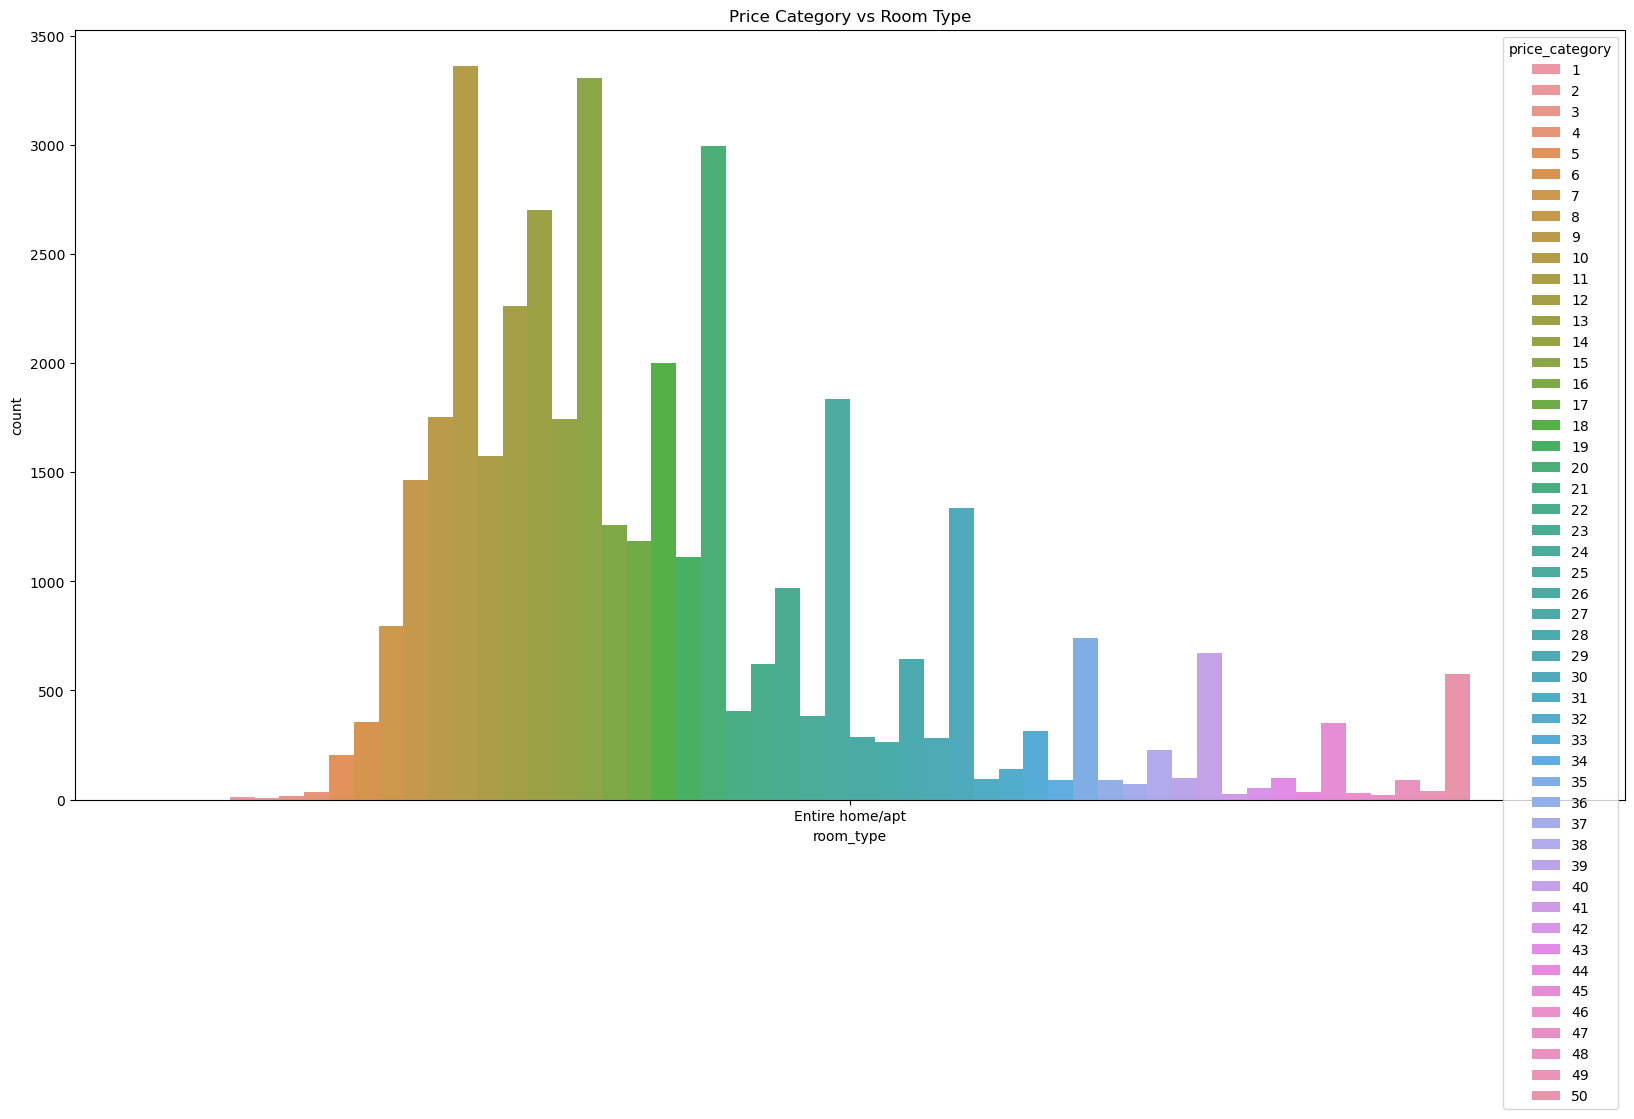

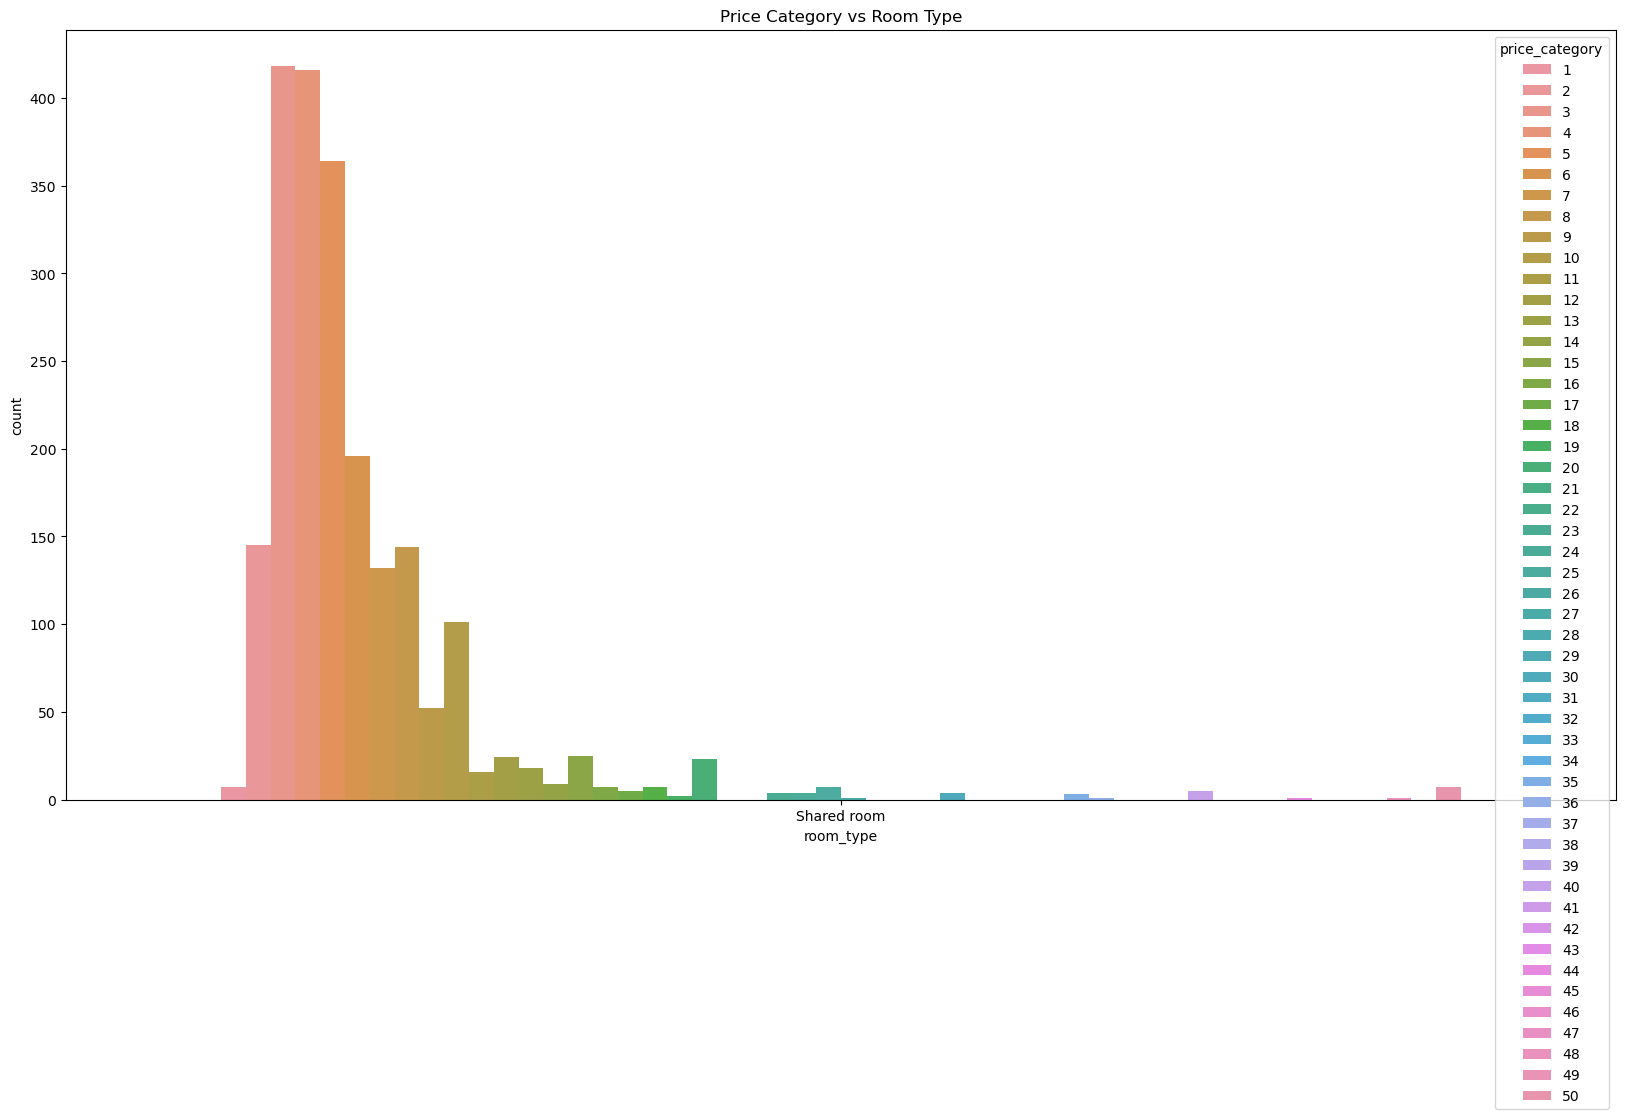

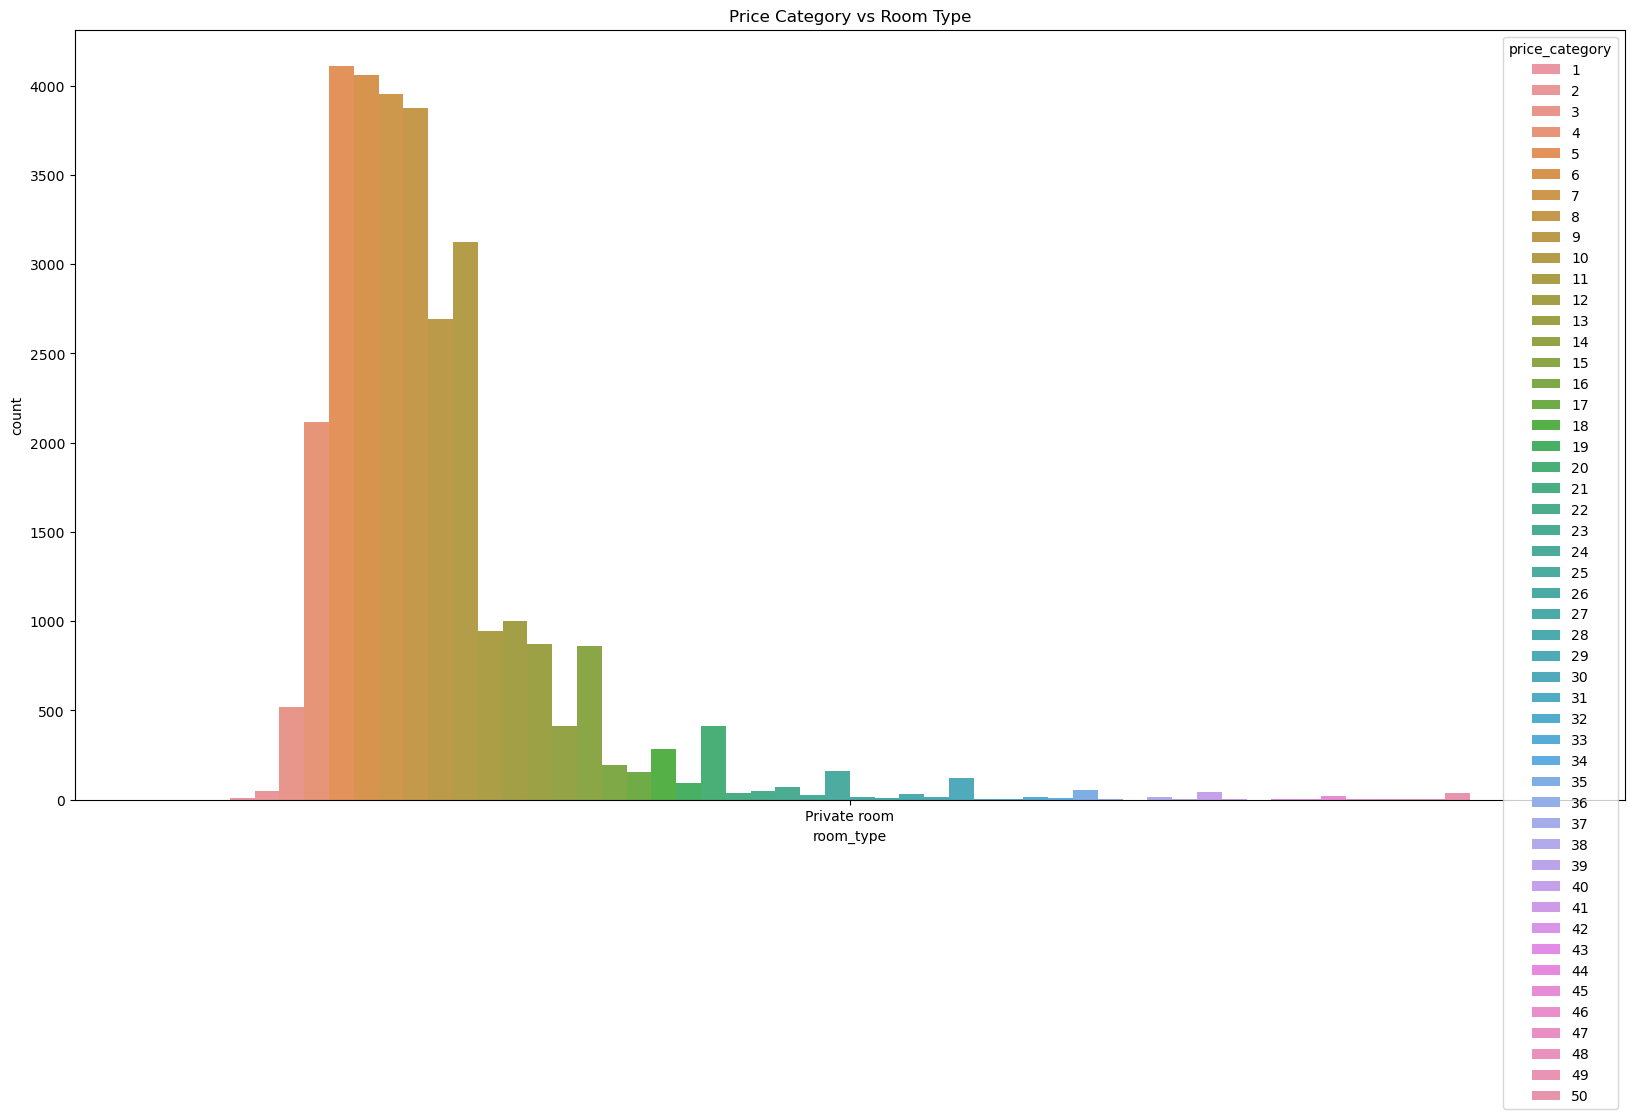

In [77]:
#plot the price category against the room type
plt.figure(figsize=(20,10))
sns.countplot(x='room_type', hue=df['price_category'], data=df)
plt.title('Price Category vs Room Type')
plt.show()
# for each room type we can see the distribution of the price categories
for room_type in set(df['room_type']):
    plt.figure(figsize=(20,10))
    sns.countplot(x='room_type', hue=df['price_category'], data=df[df['room_type'] == room_type])
    plt.title('Price Category vs Room Type')
    plt.show()

# property type and price relations

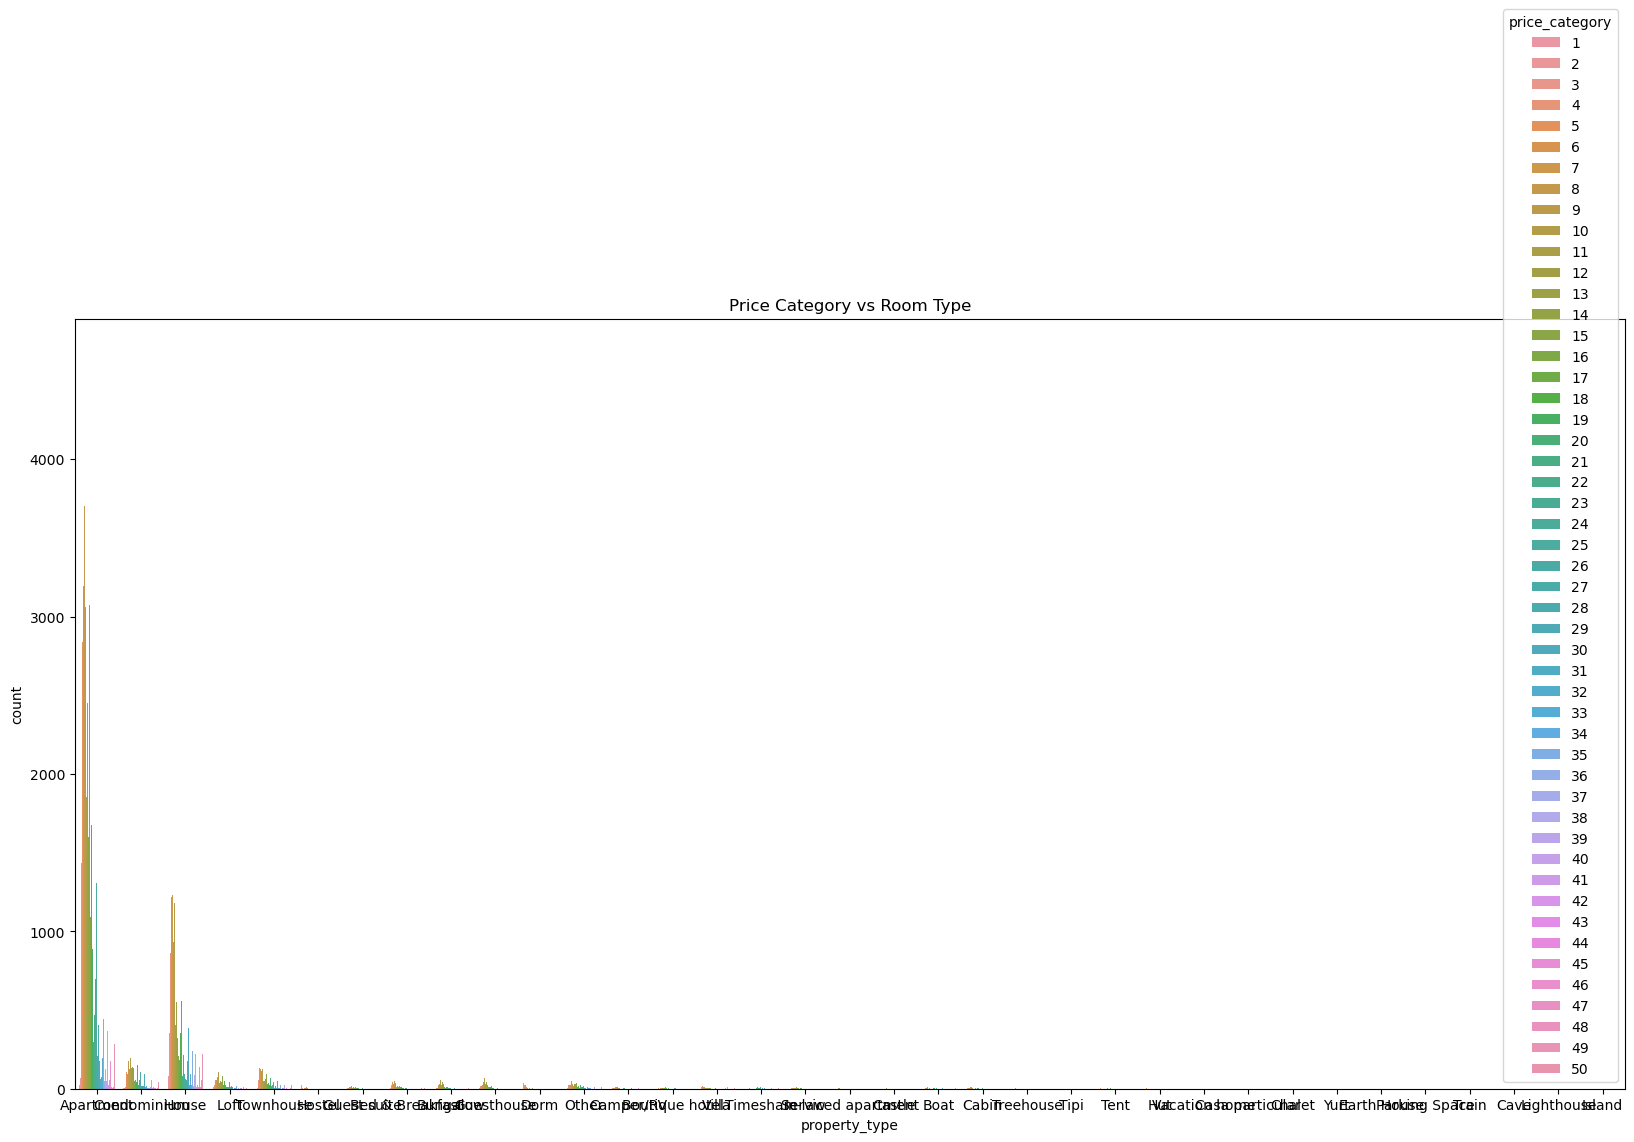

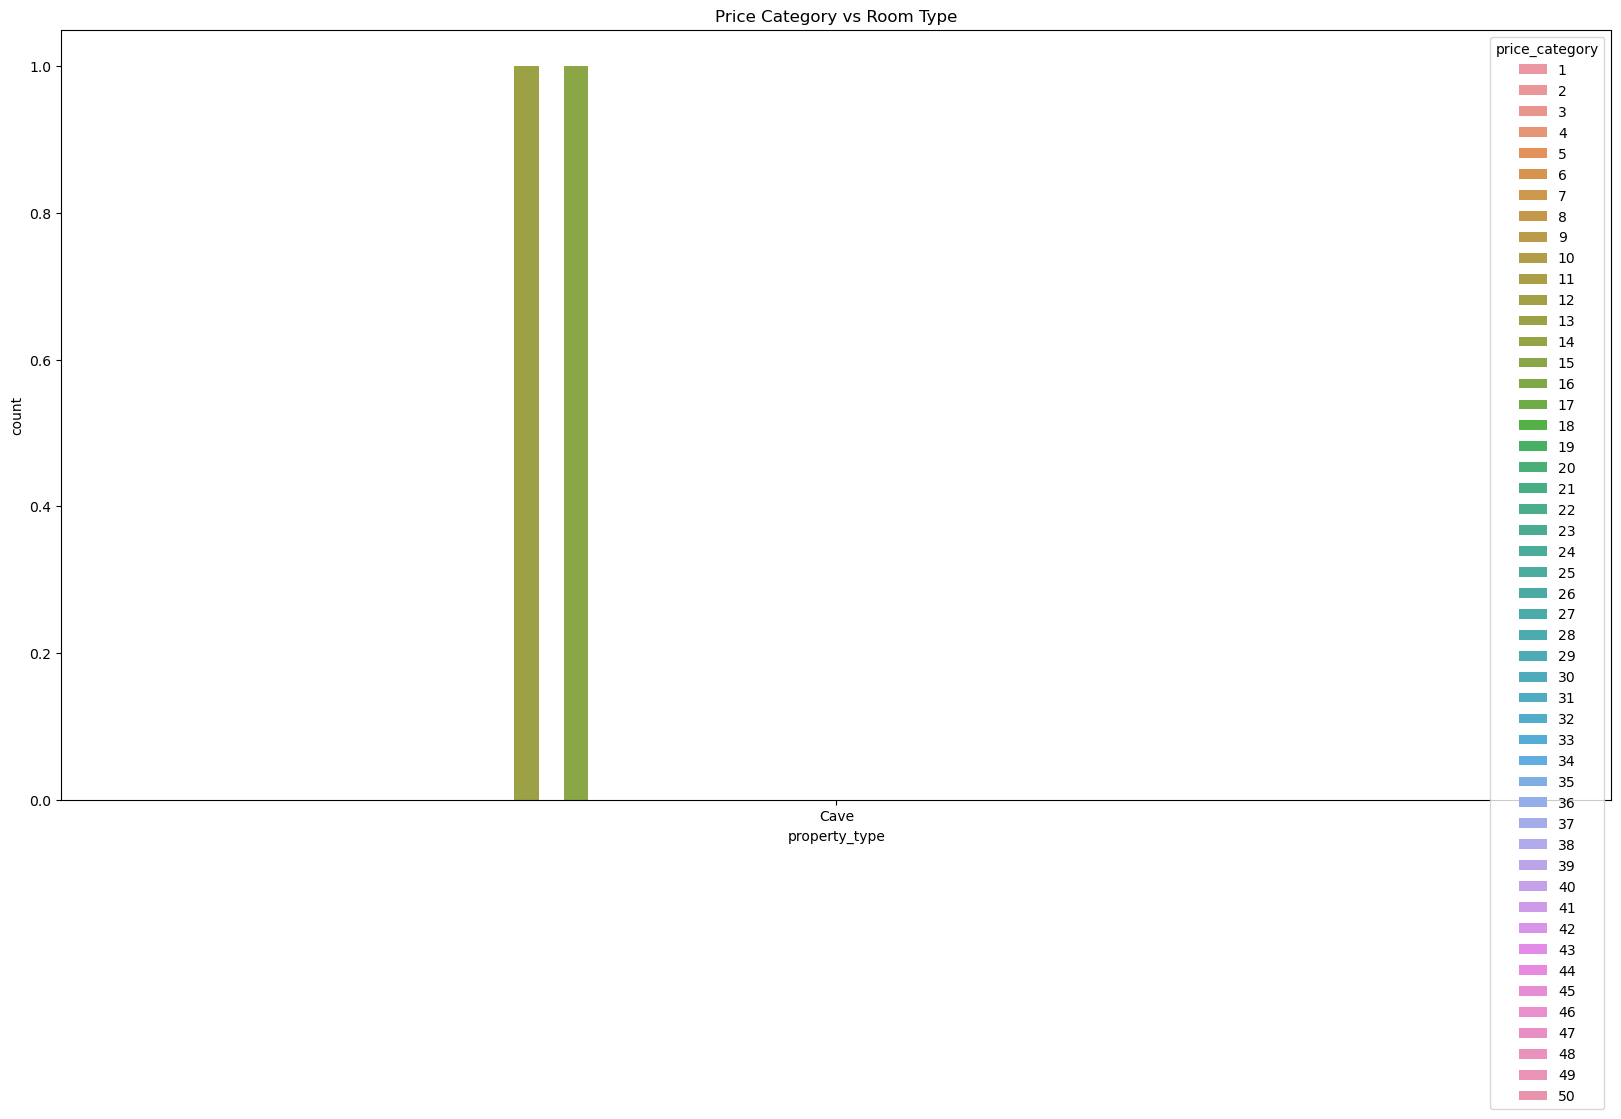

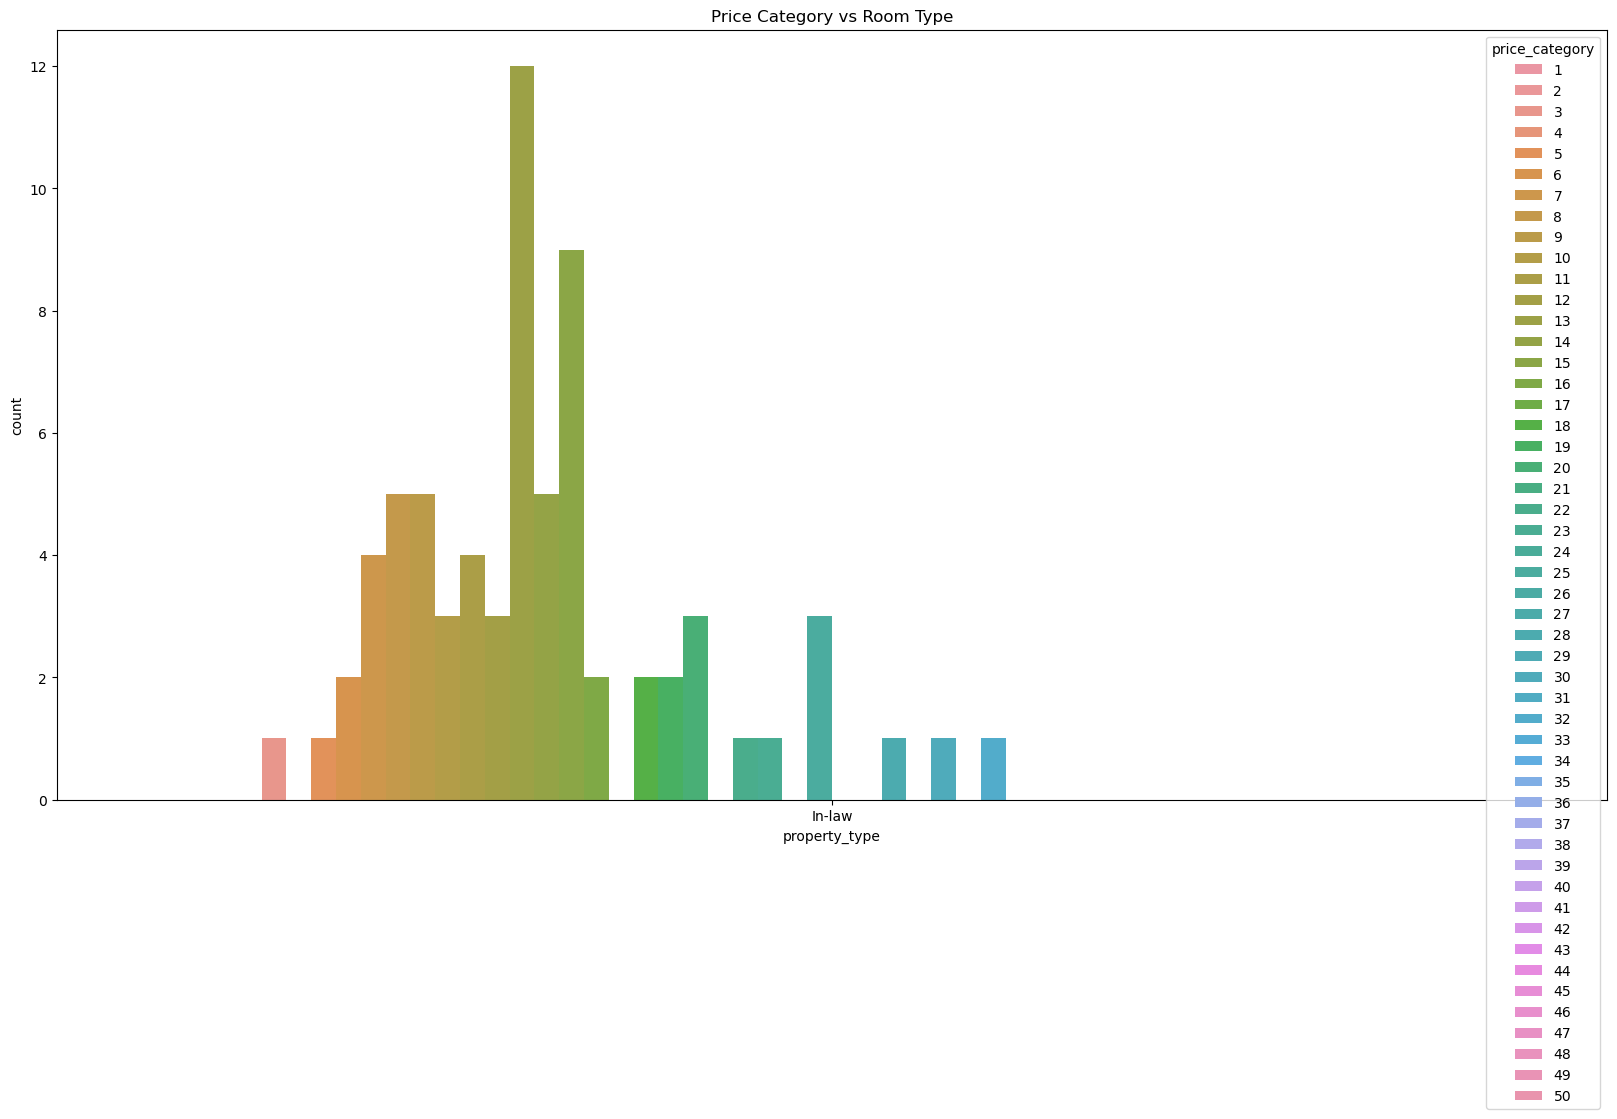

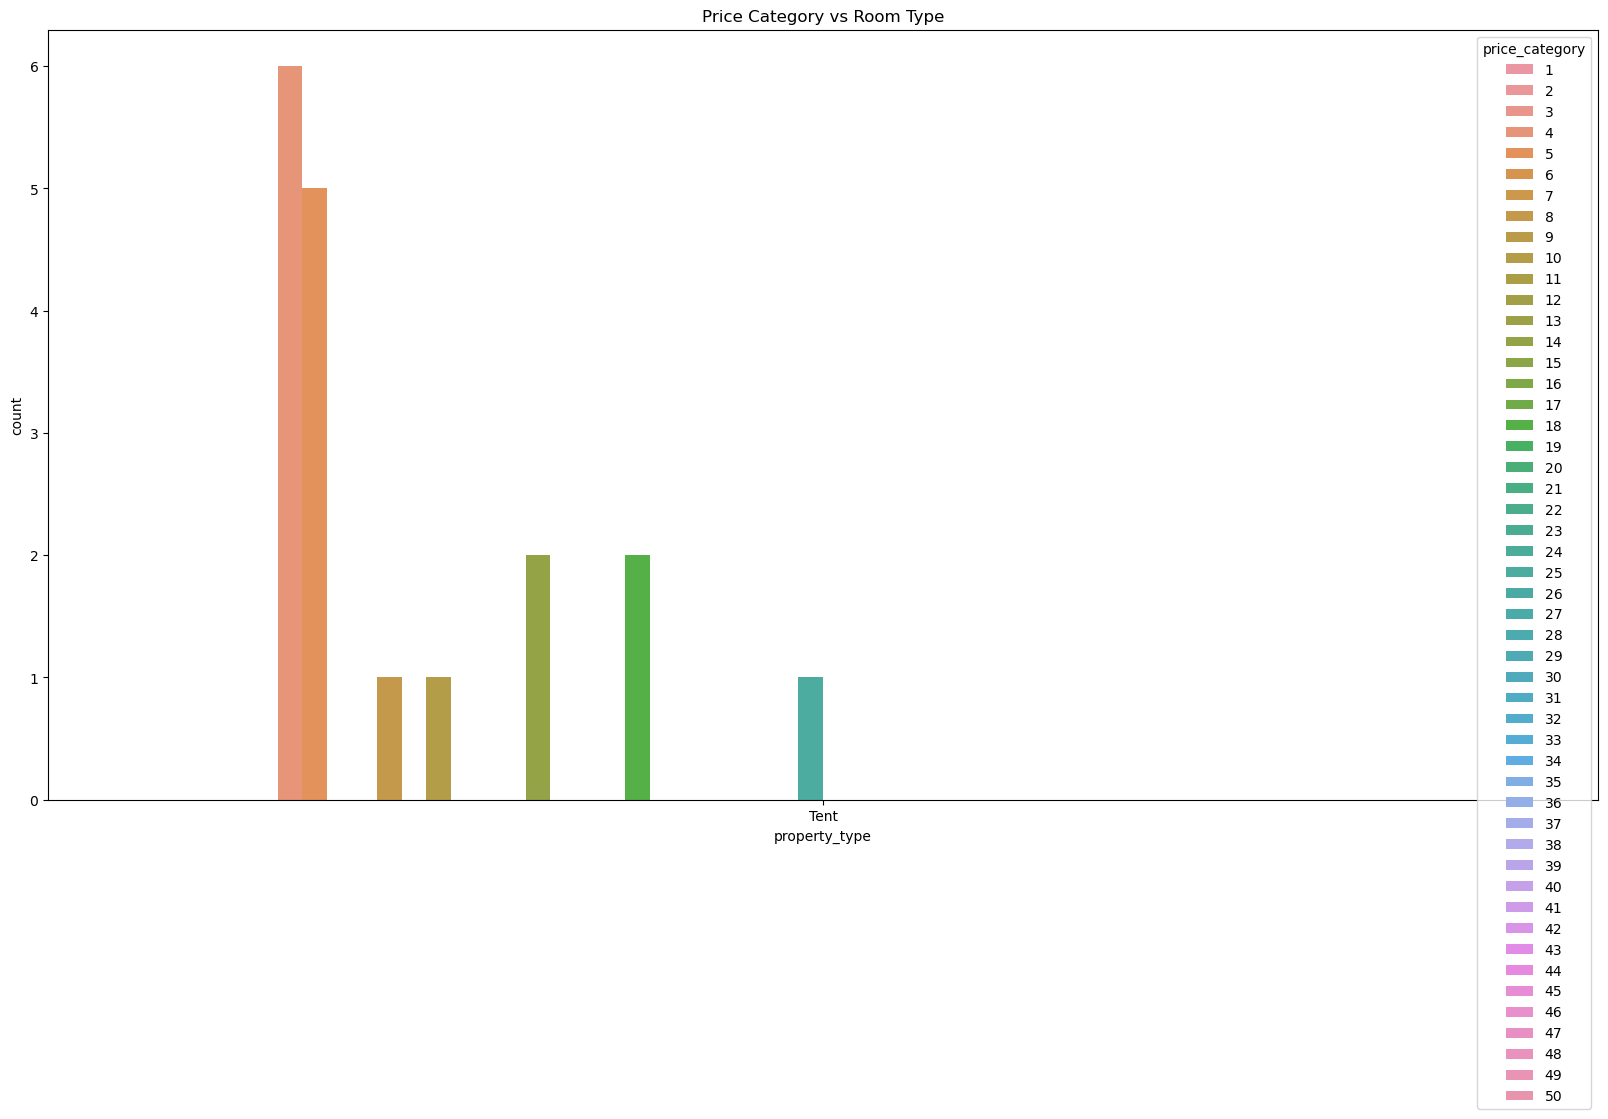

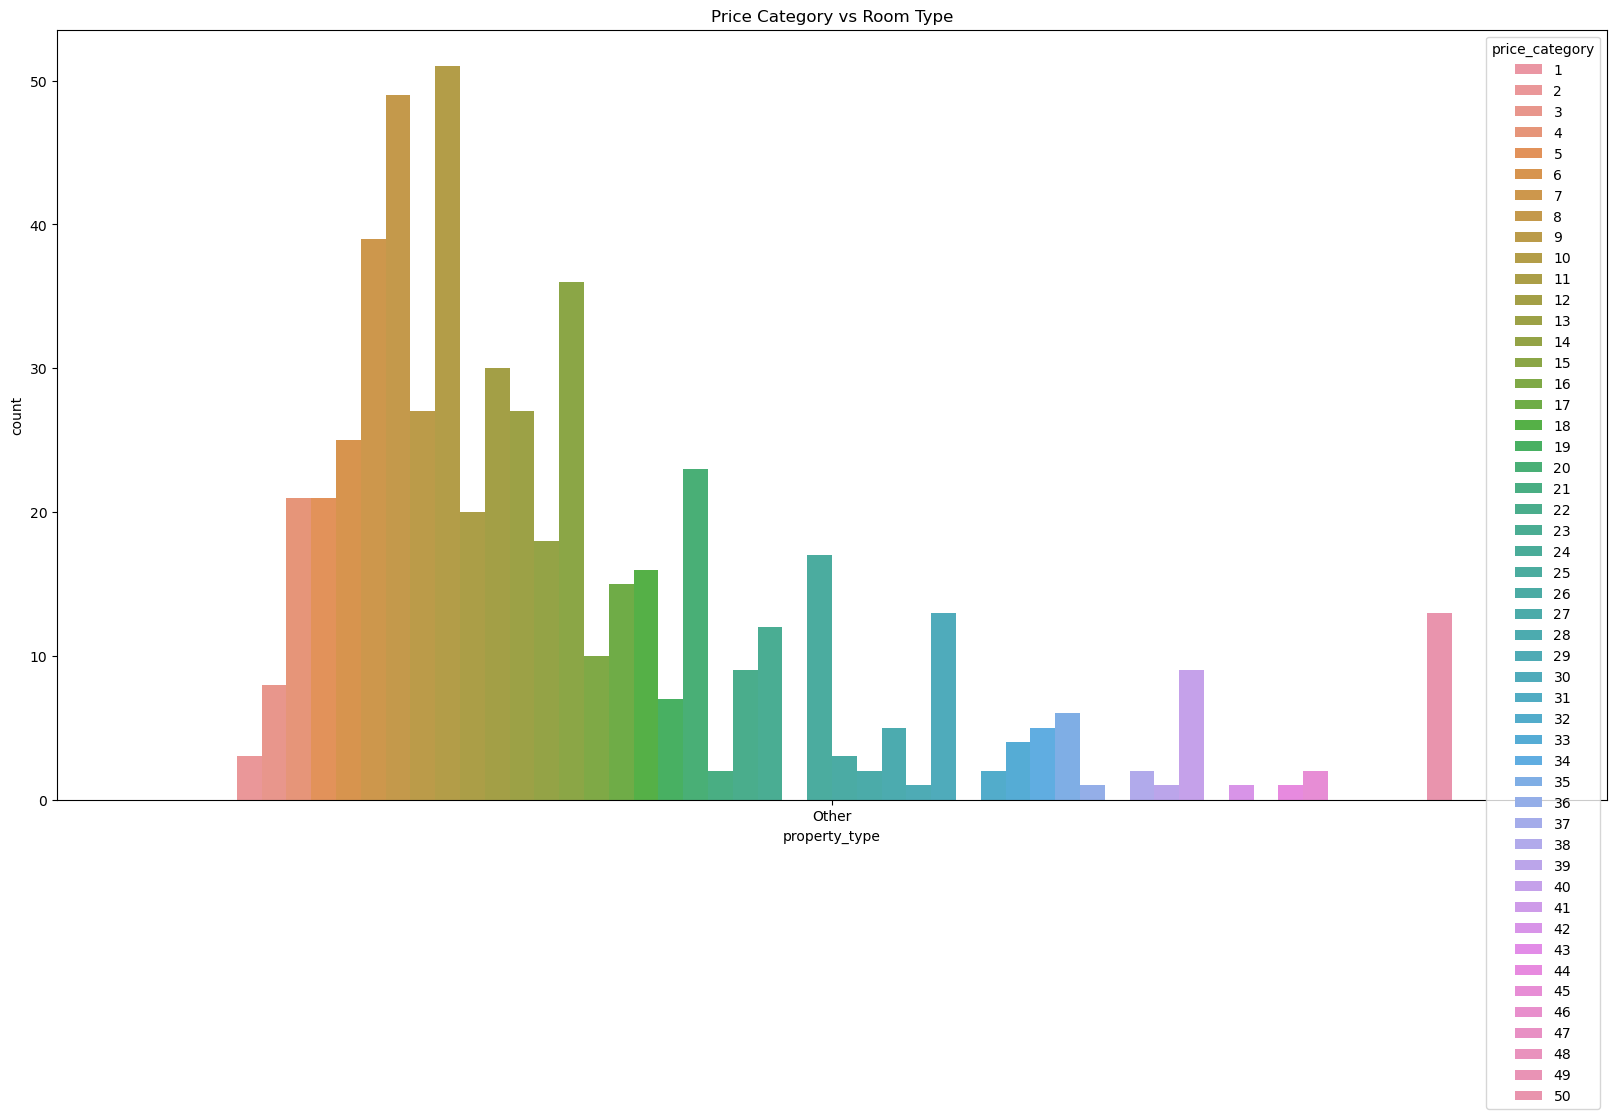

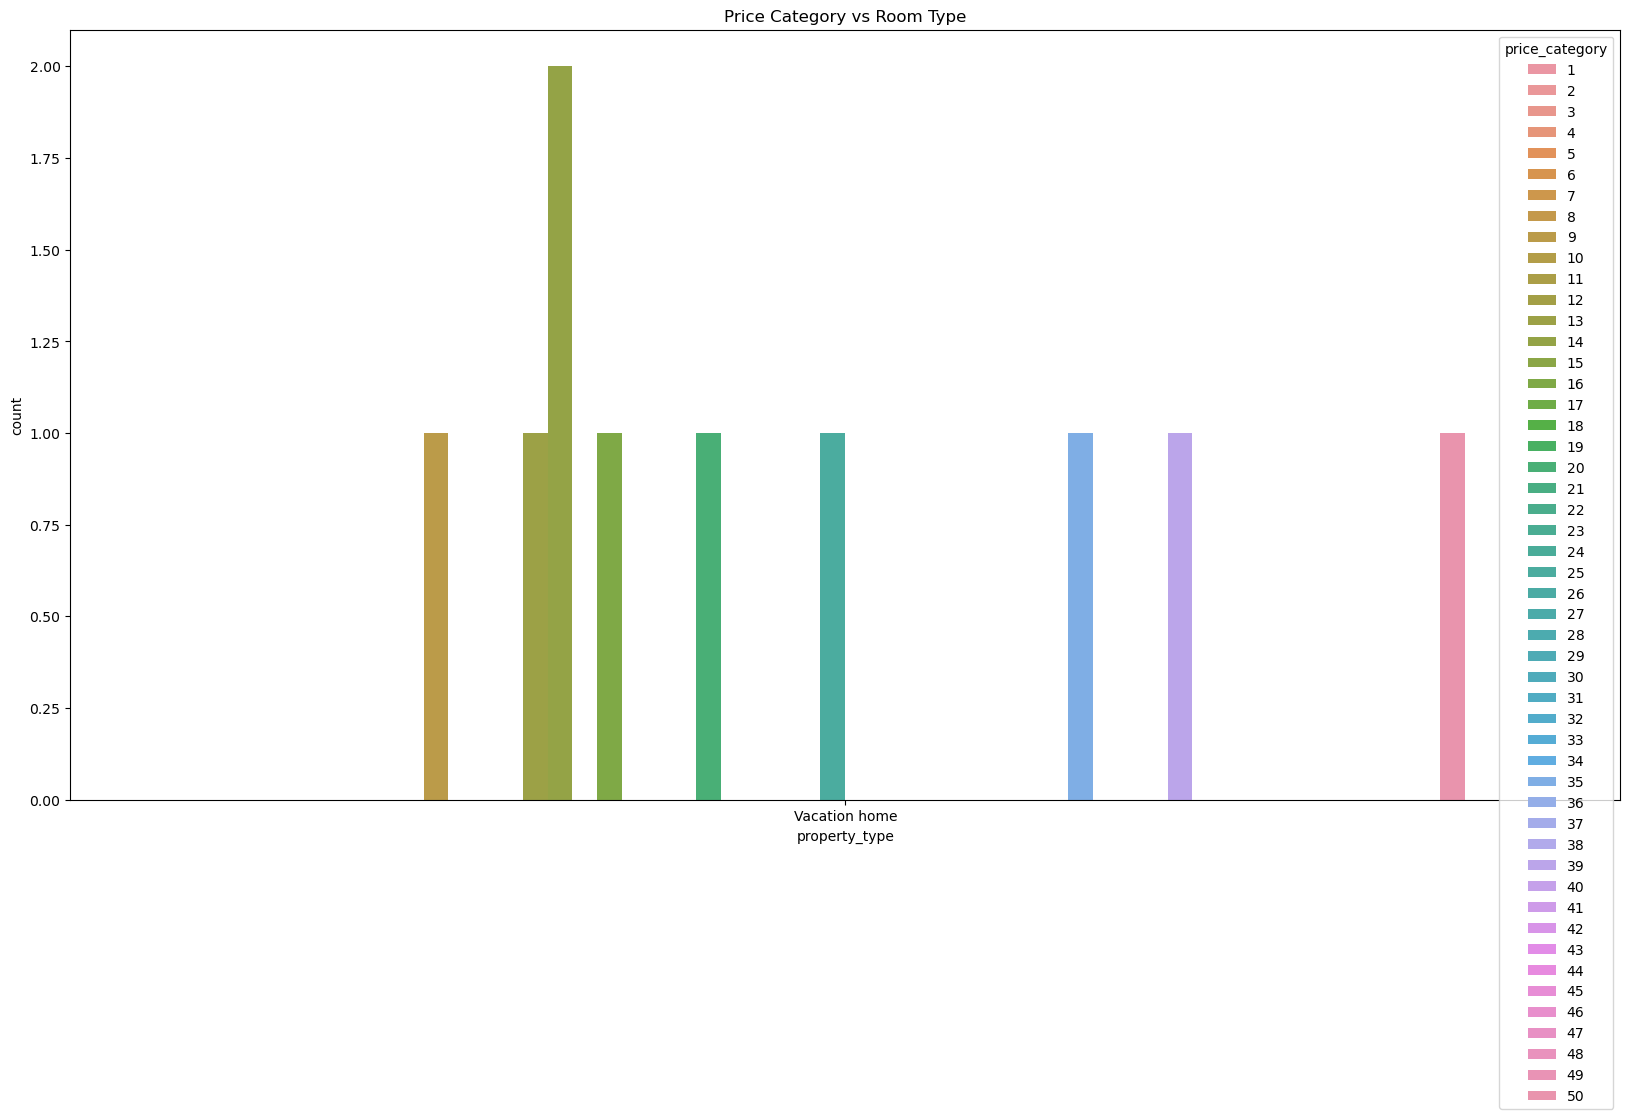

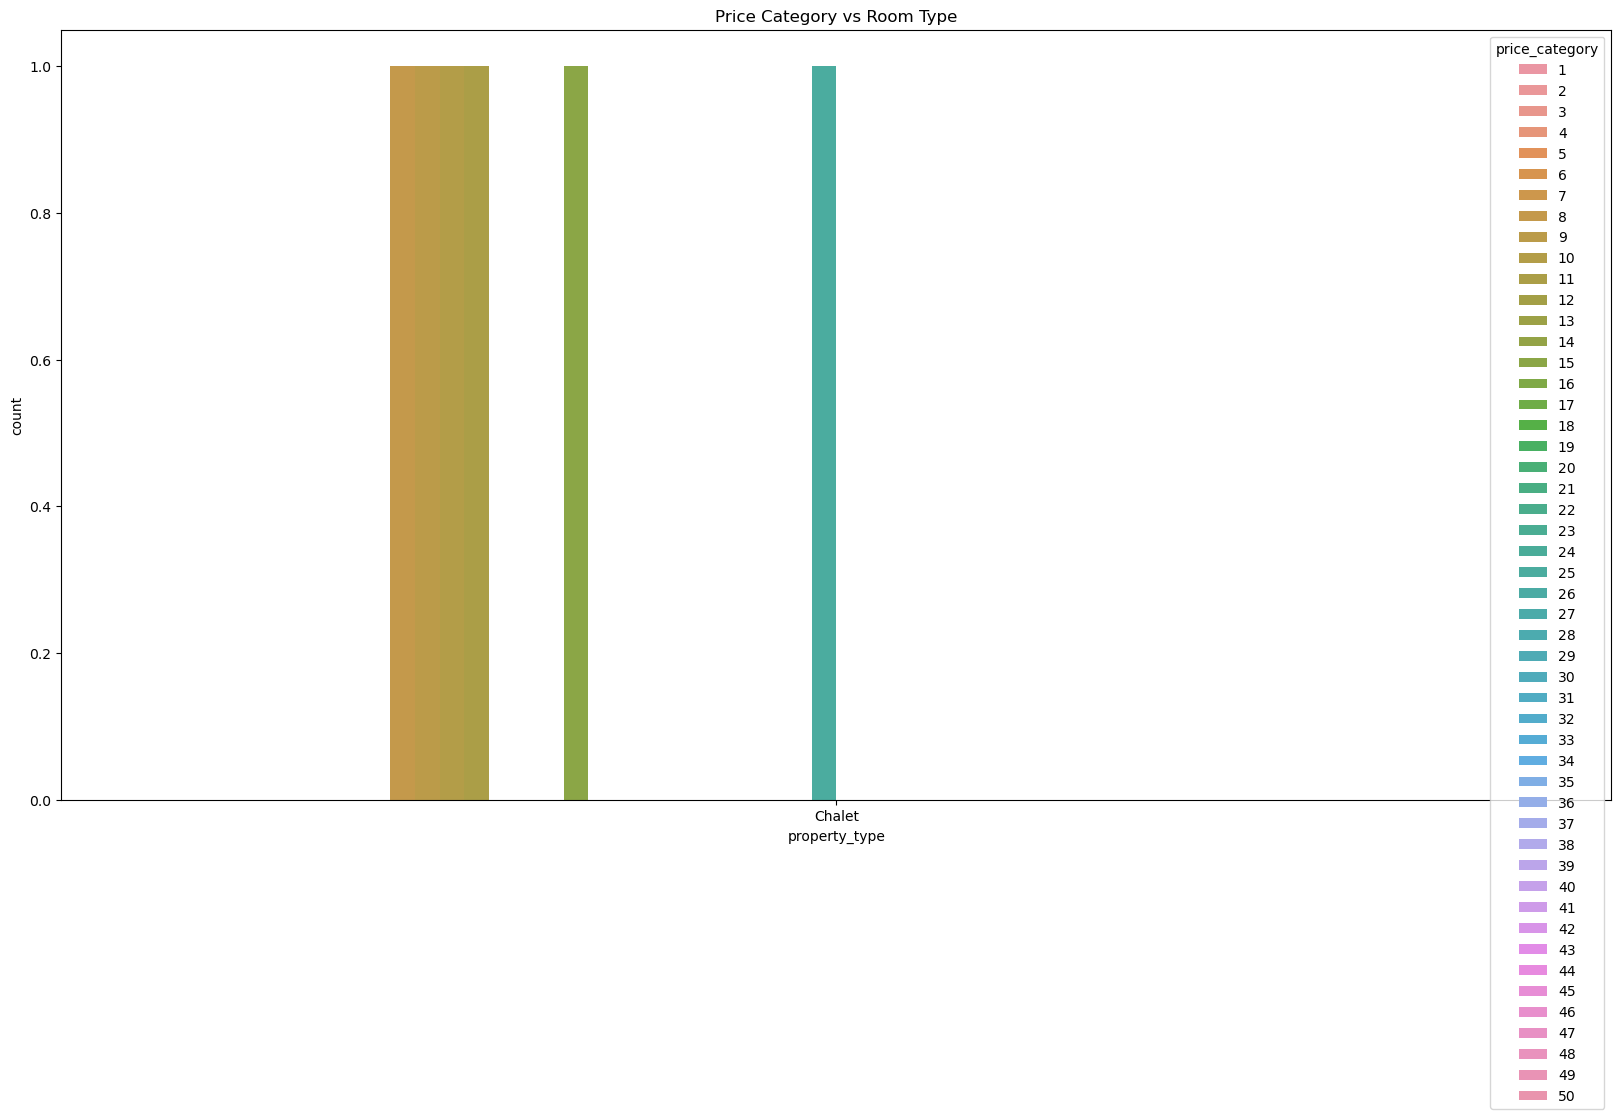

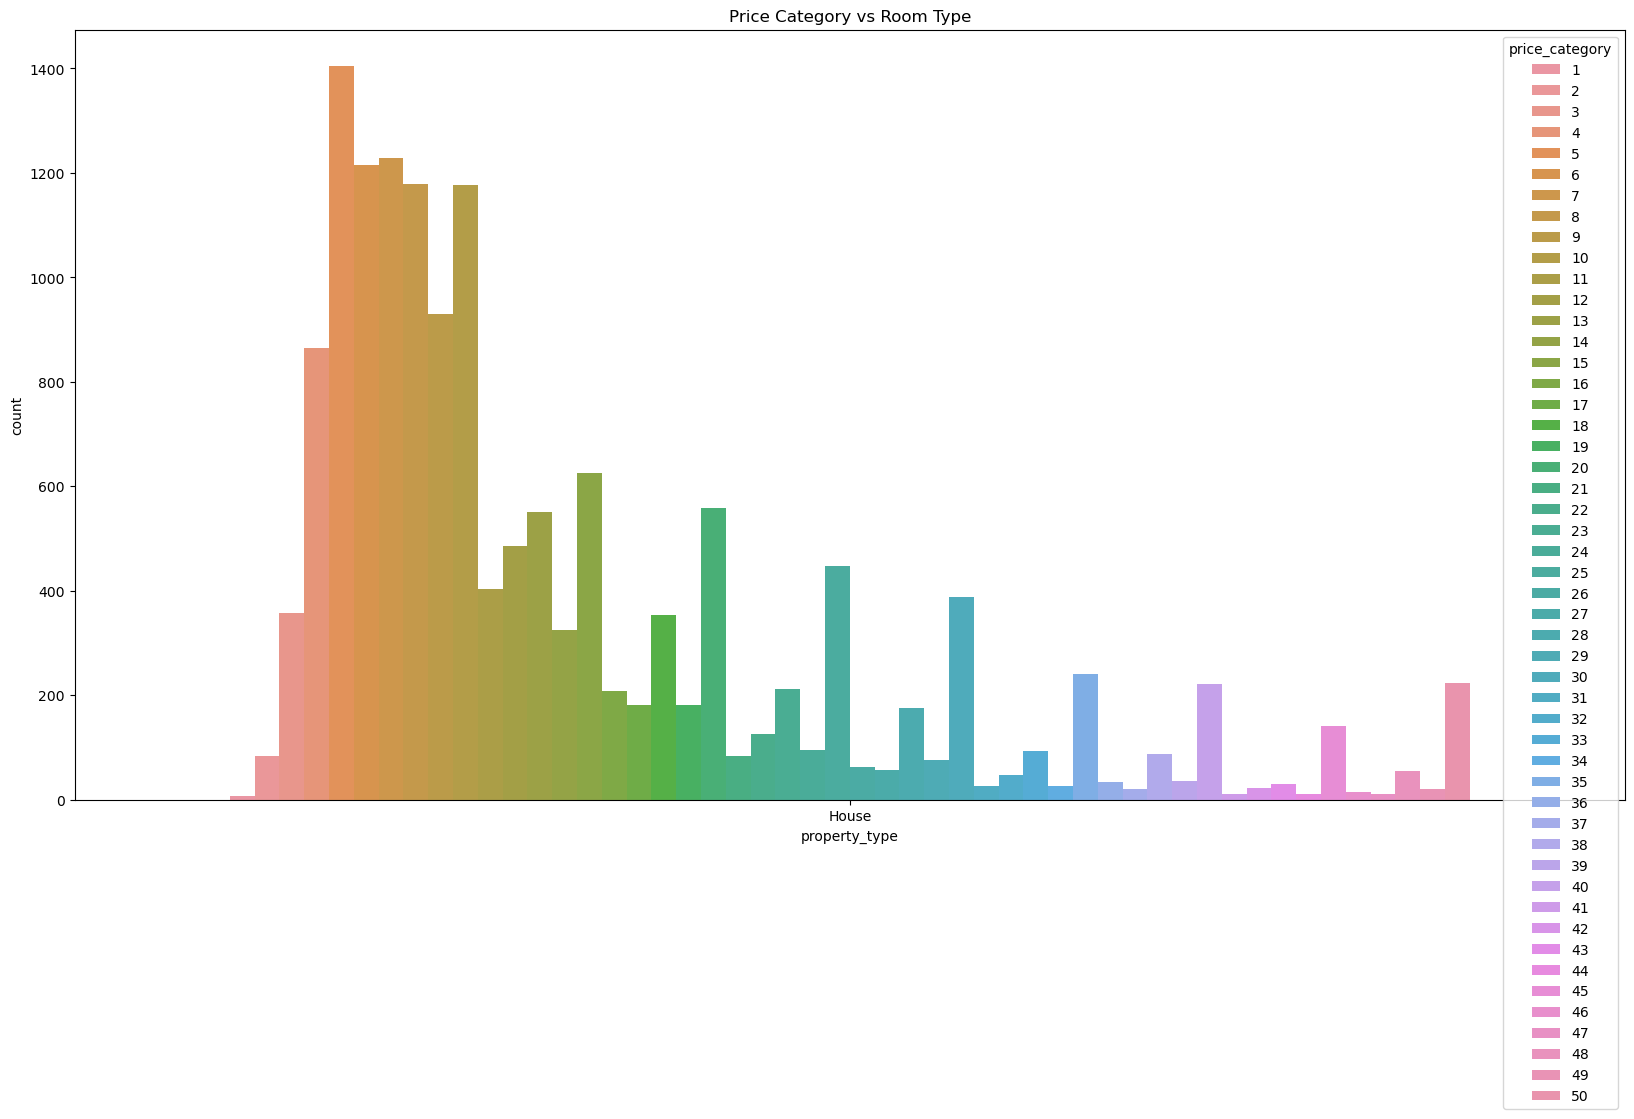

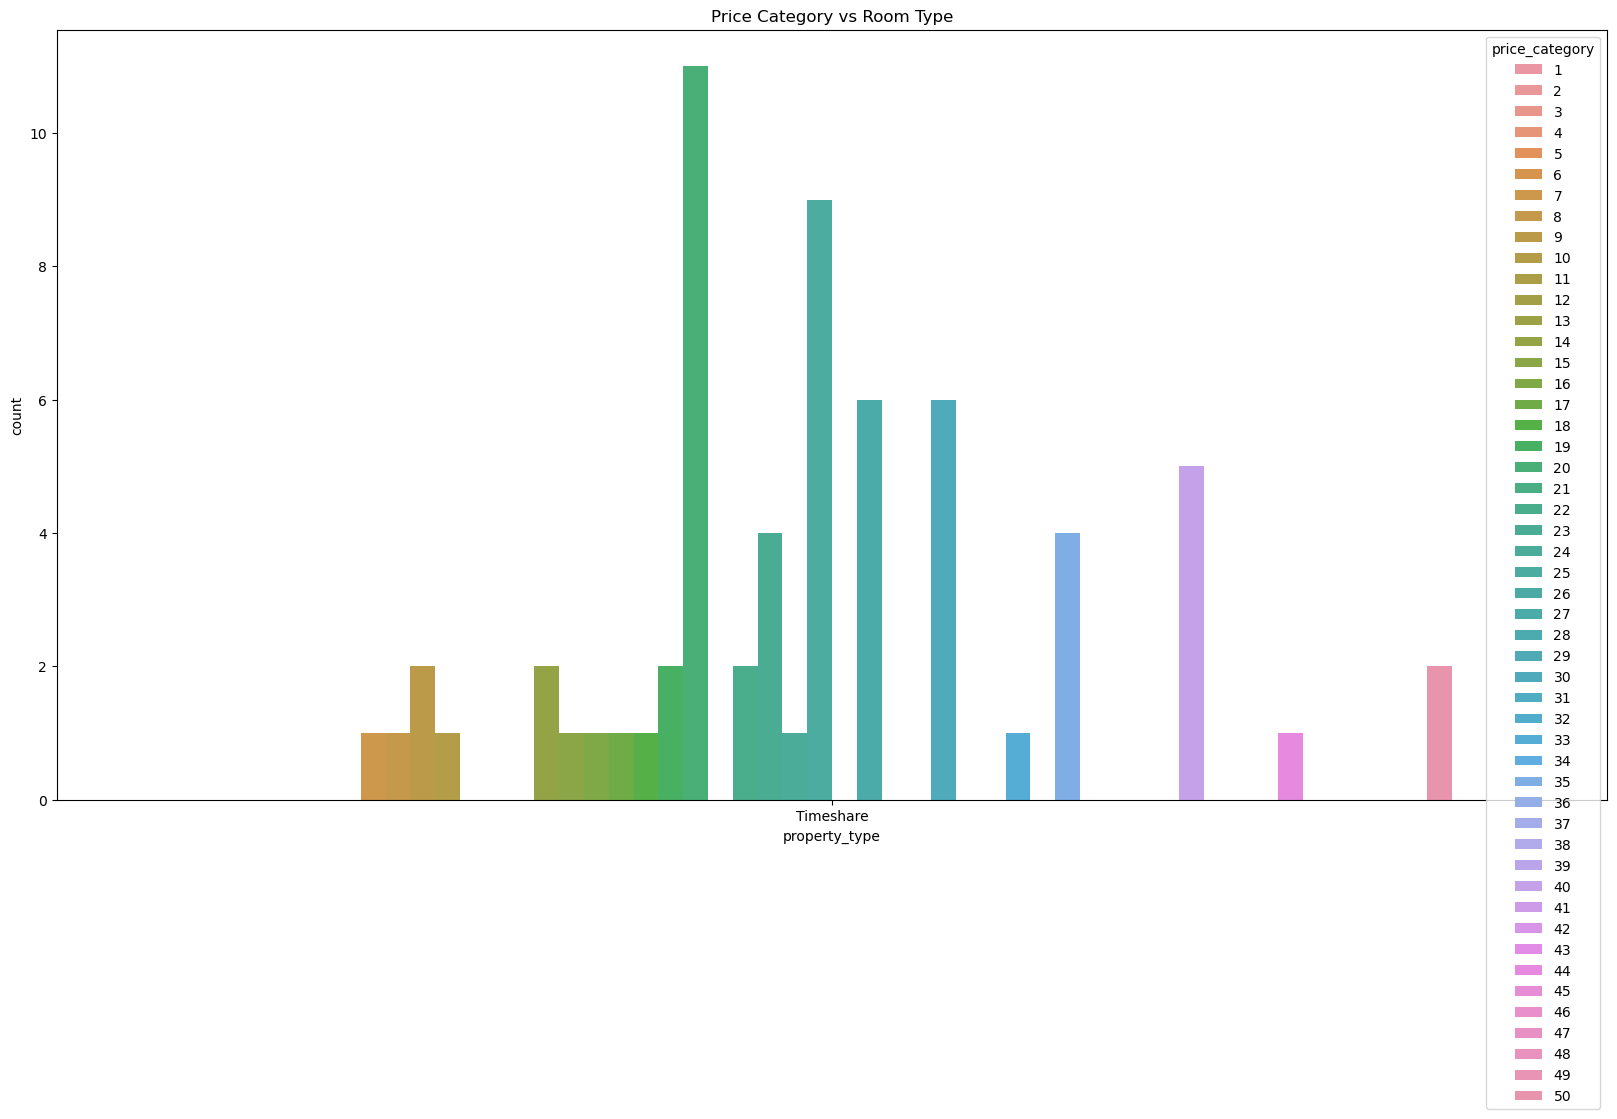

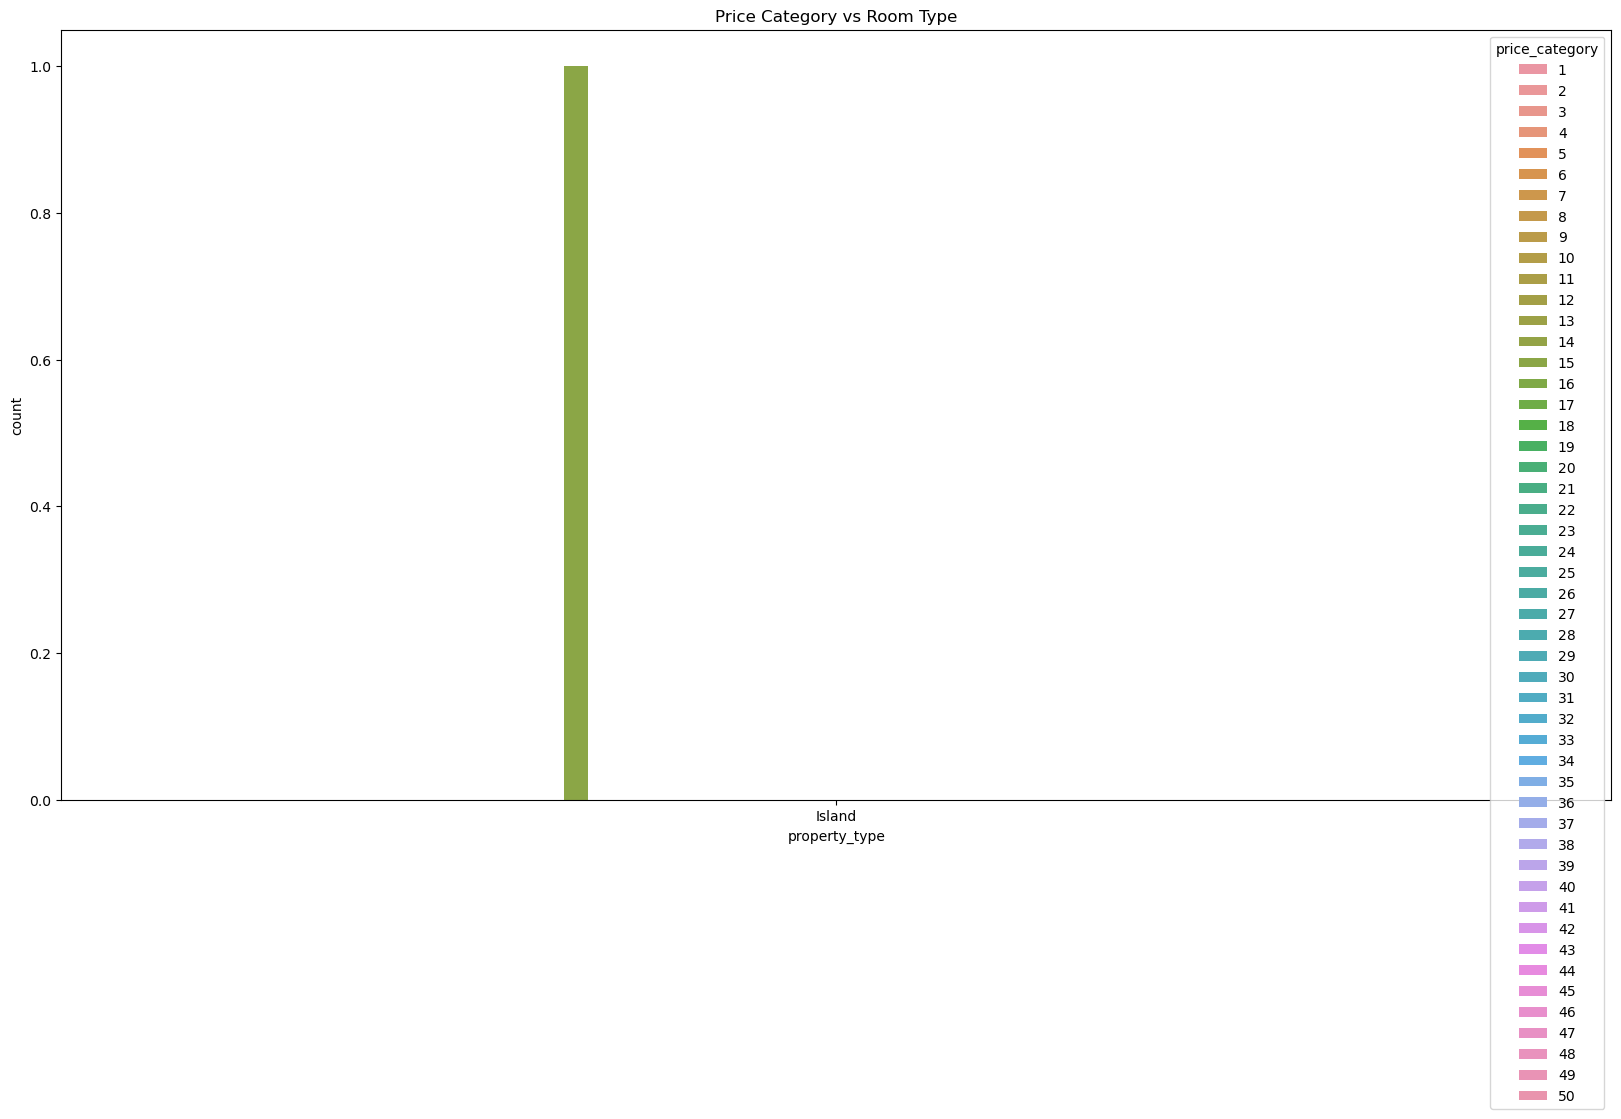

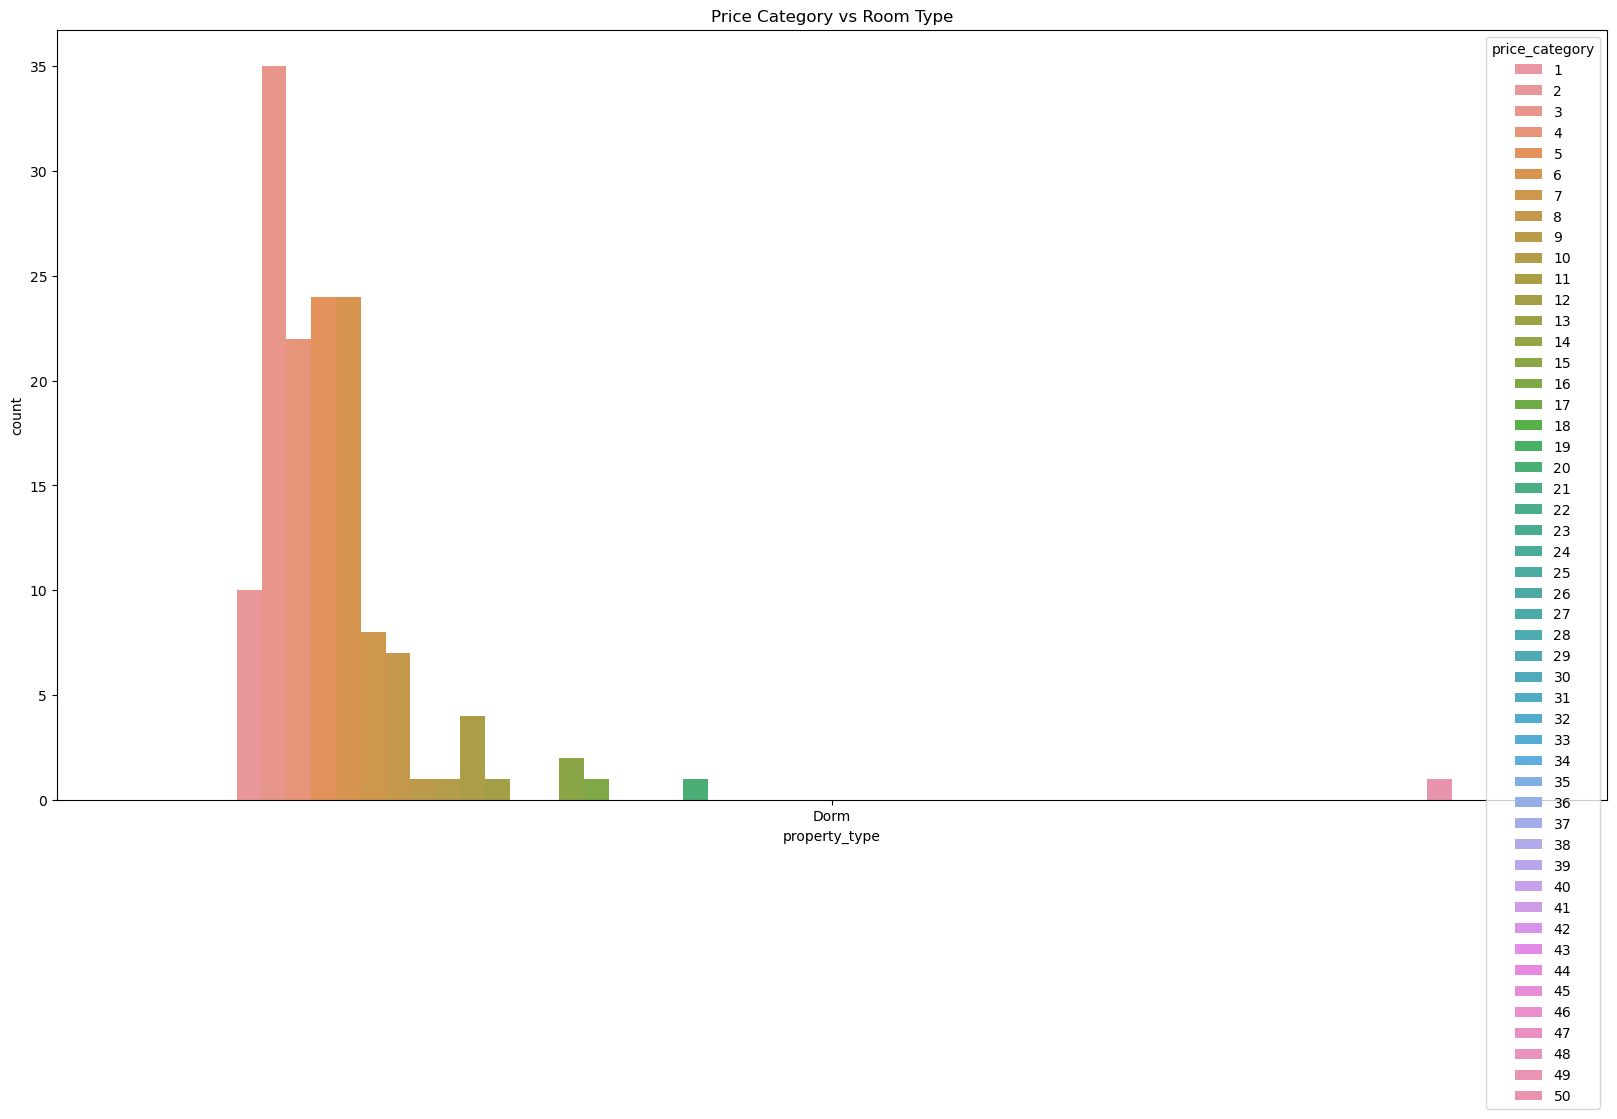

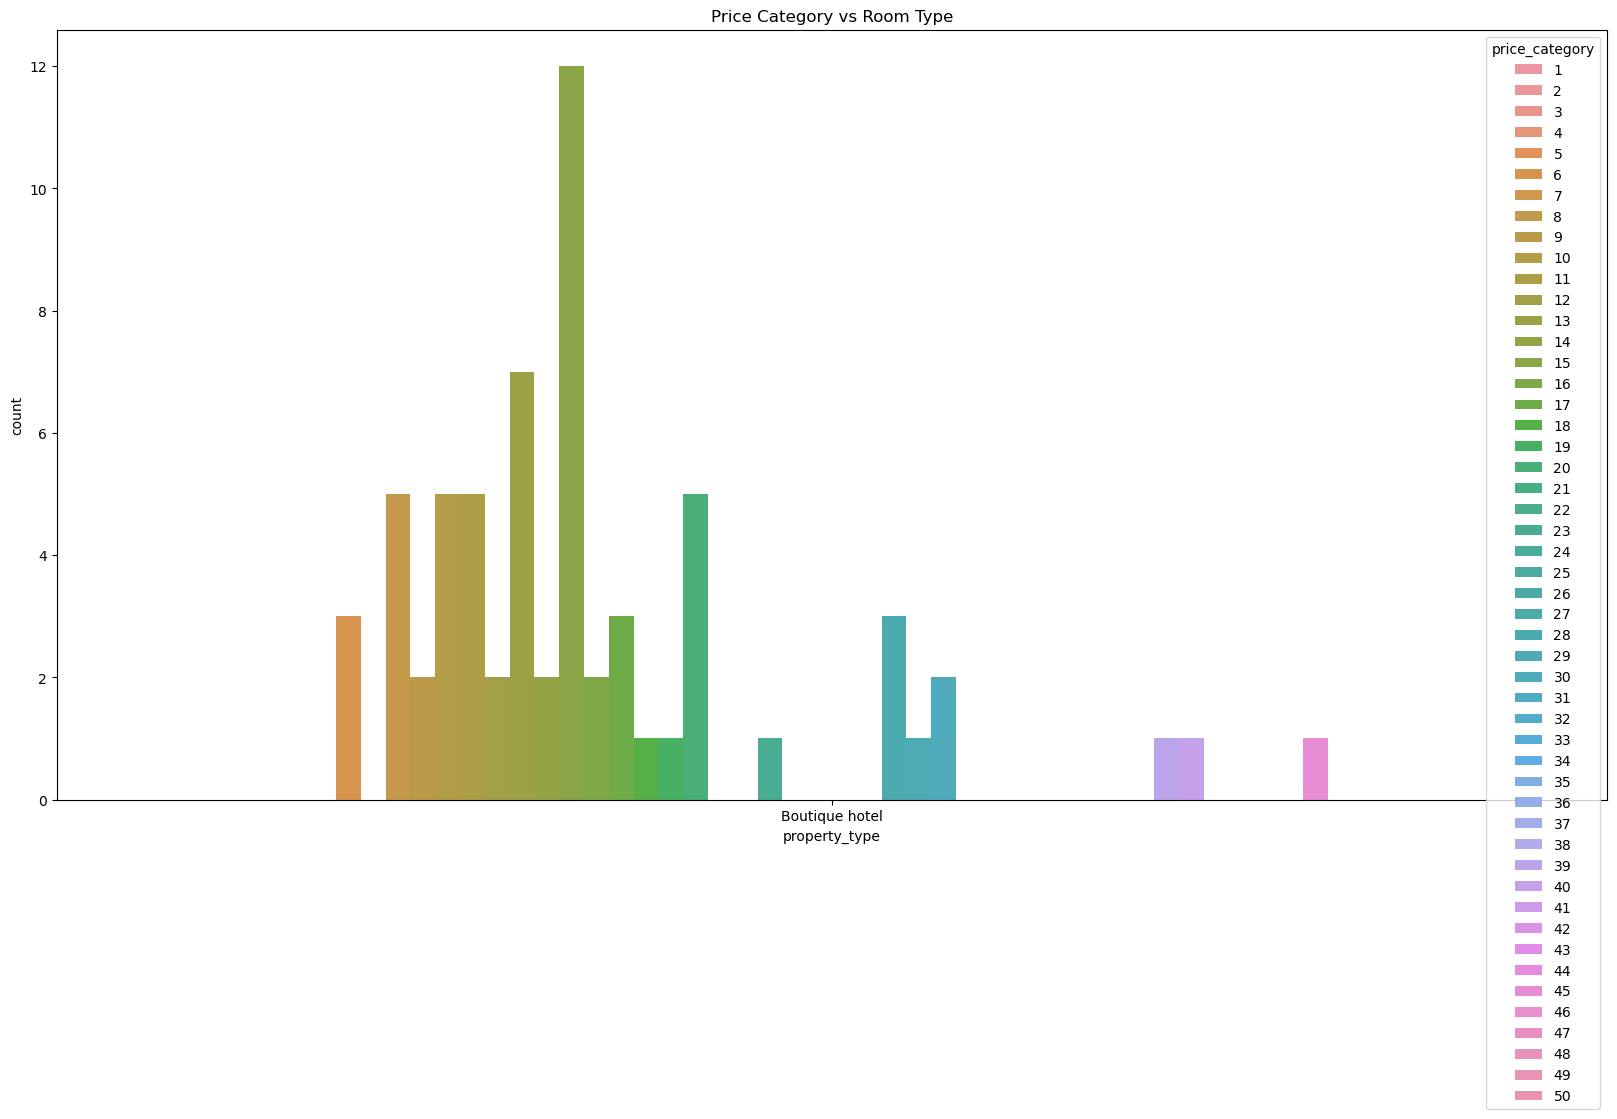

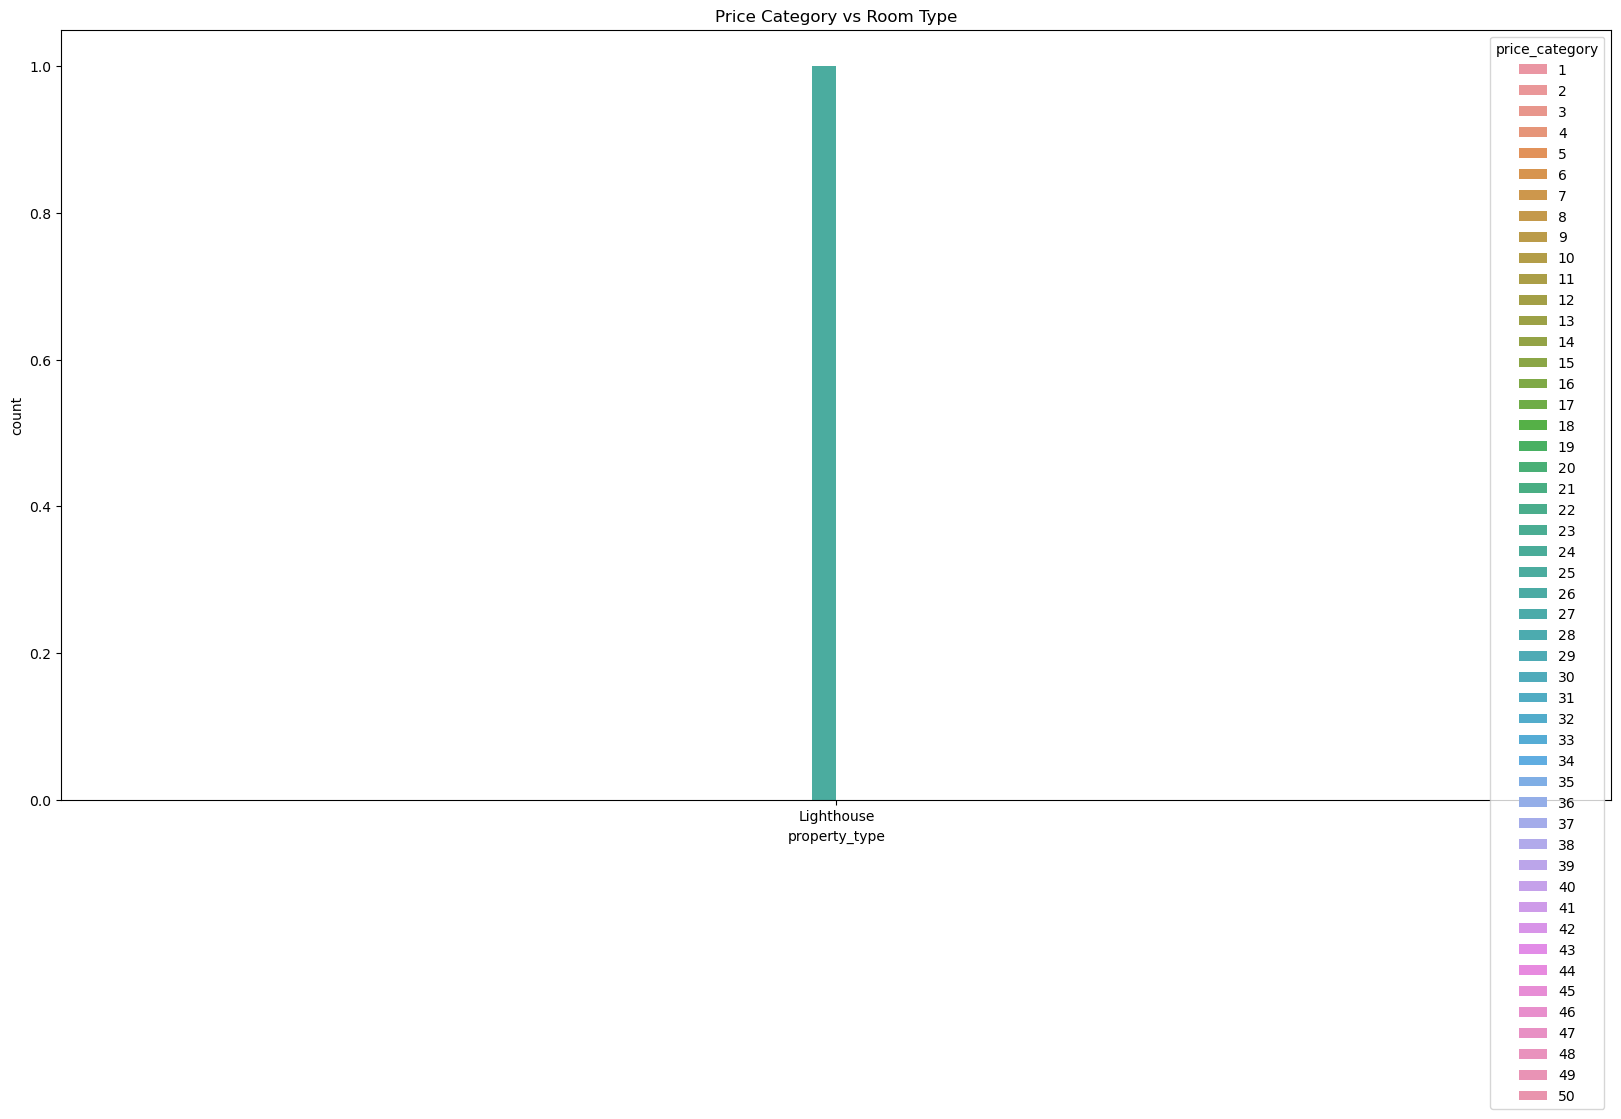

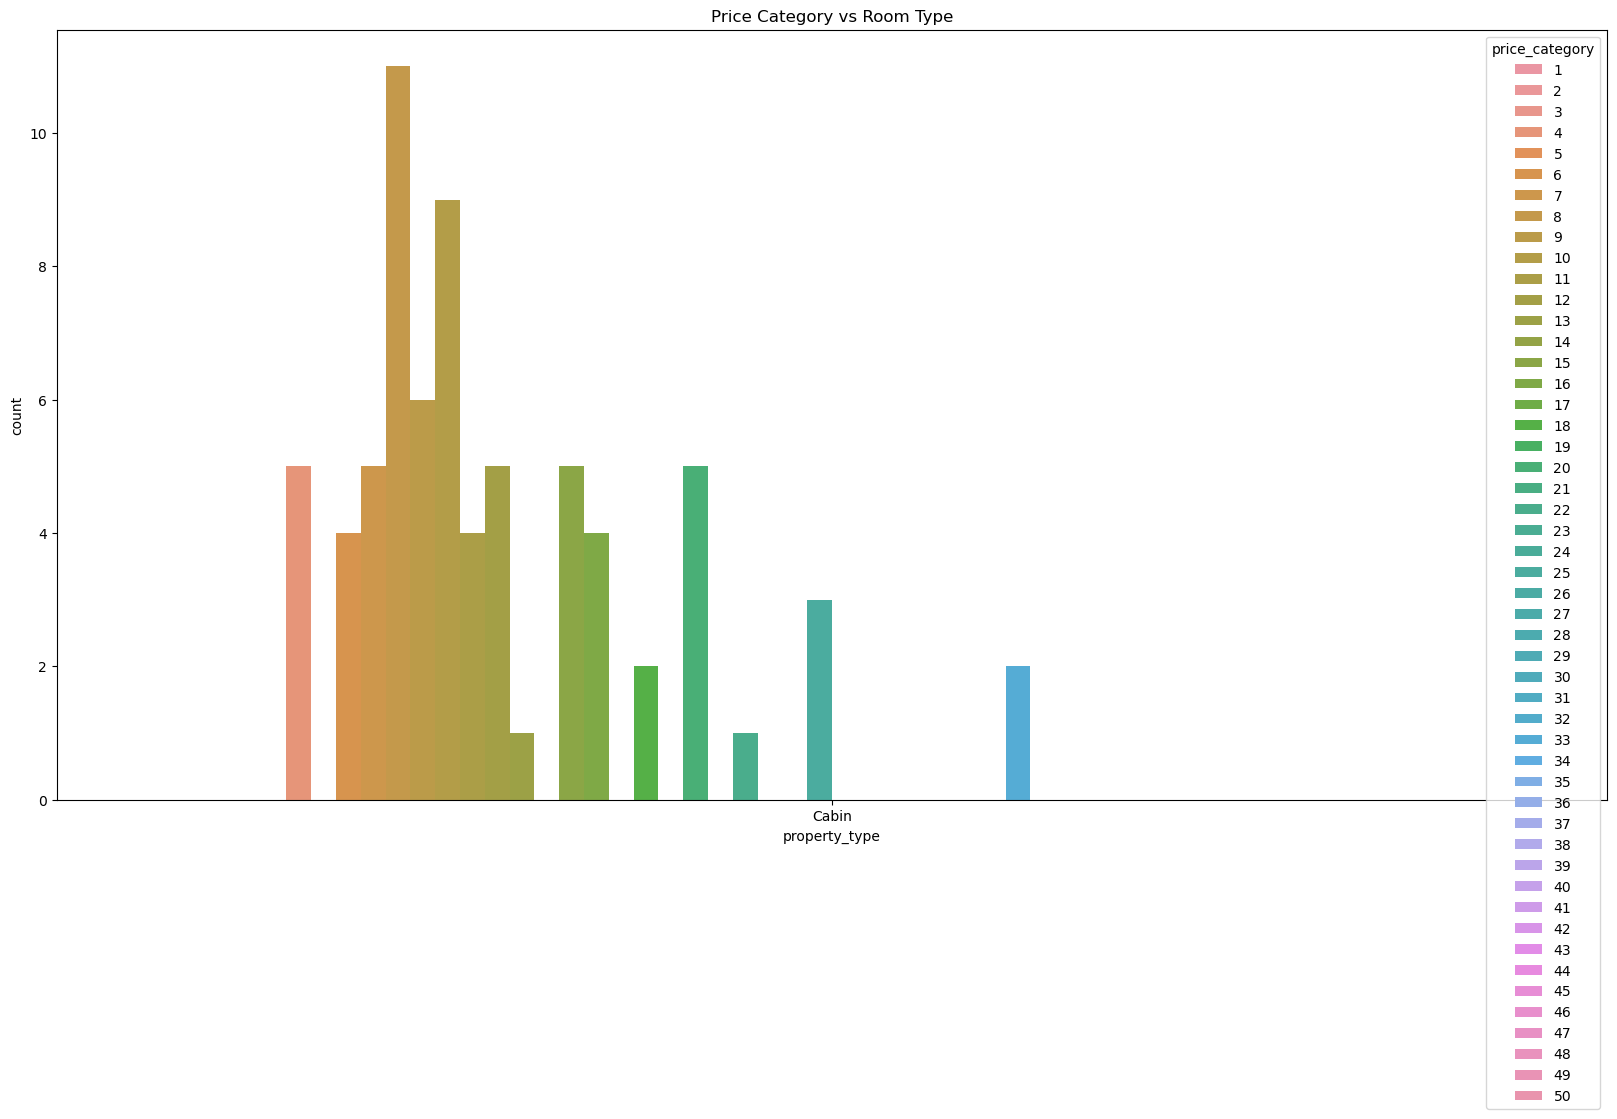

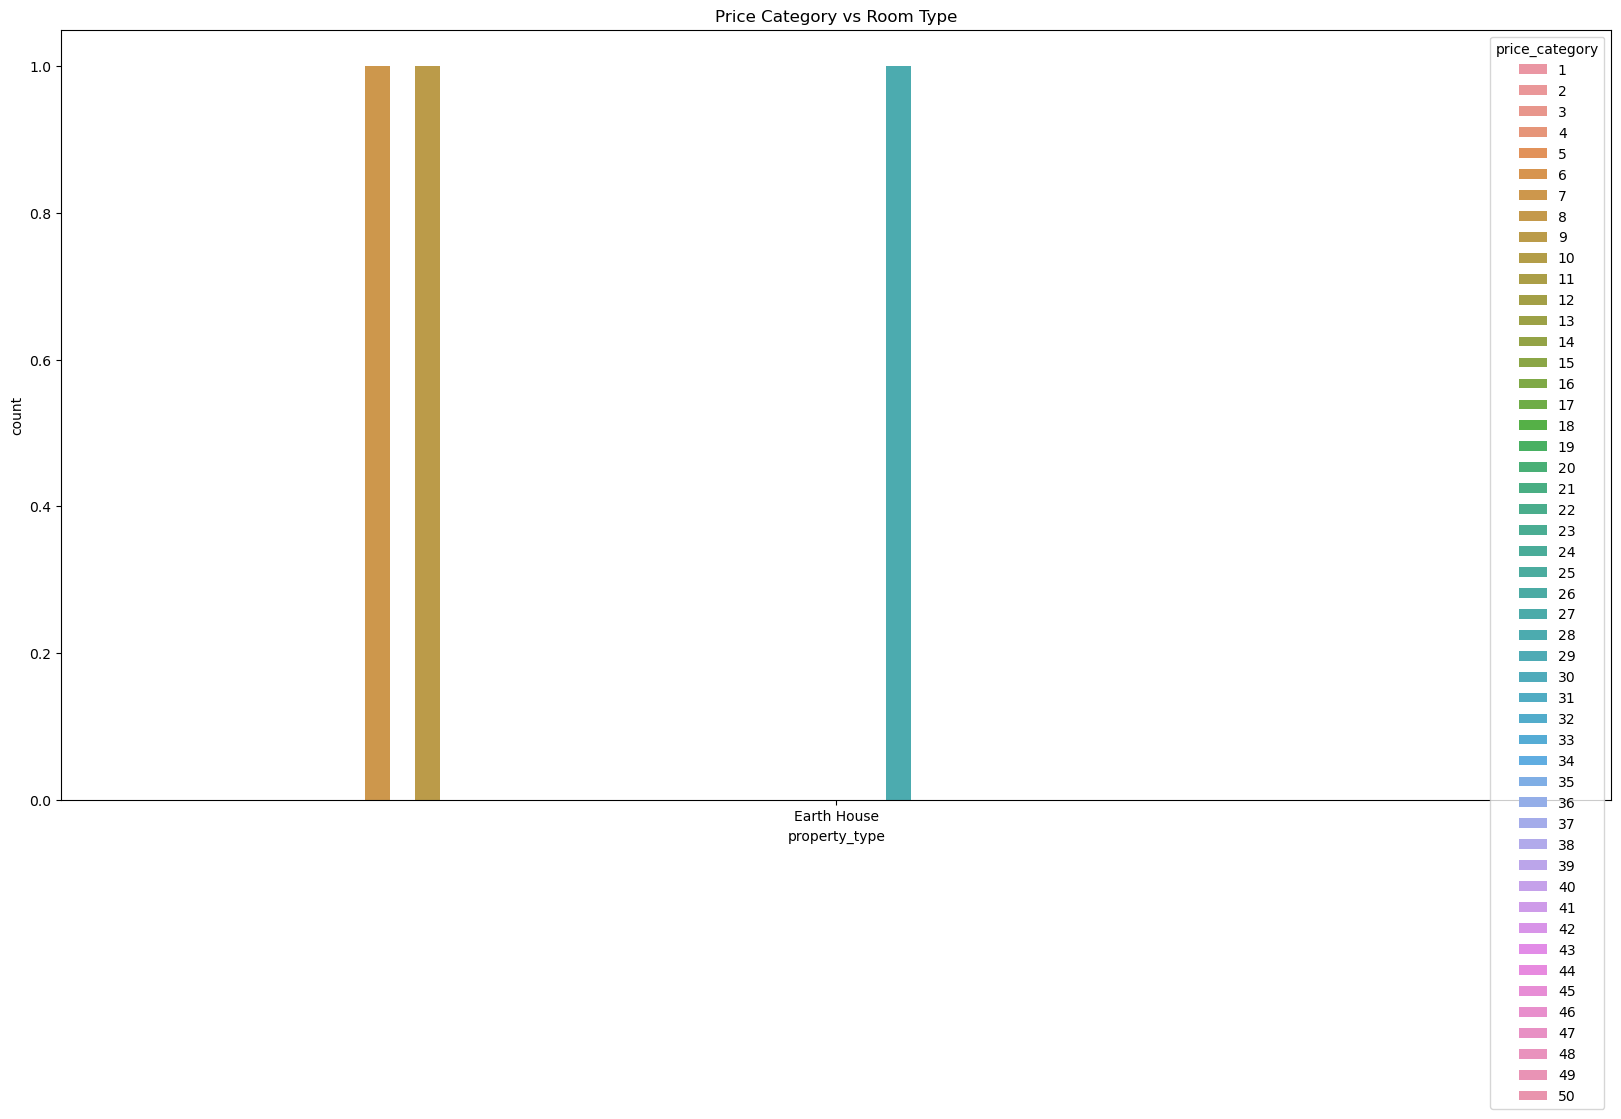

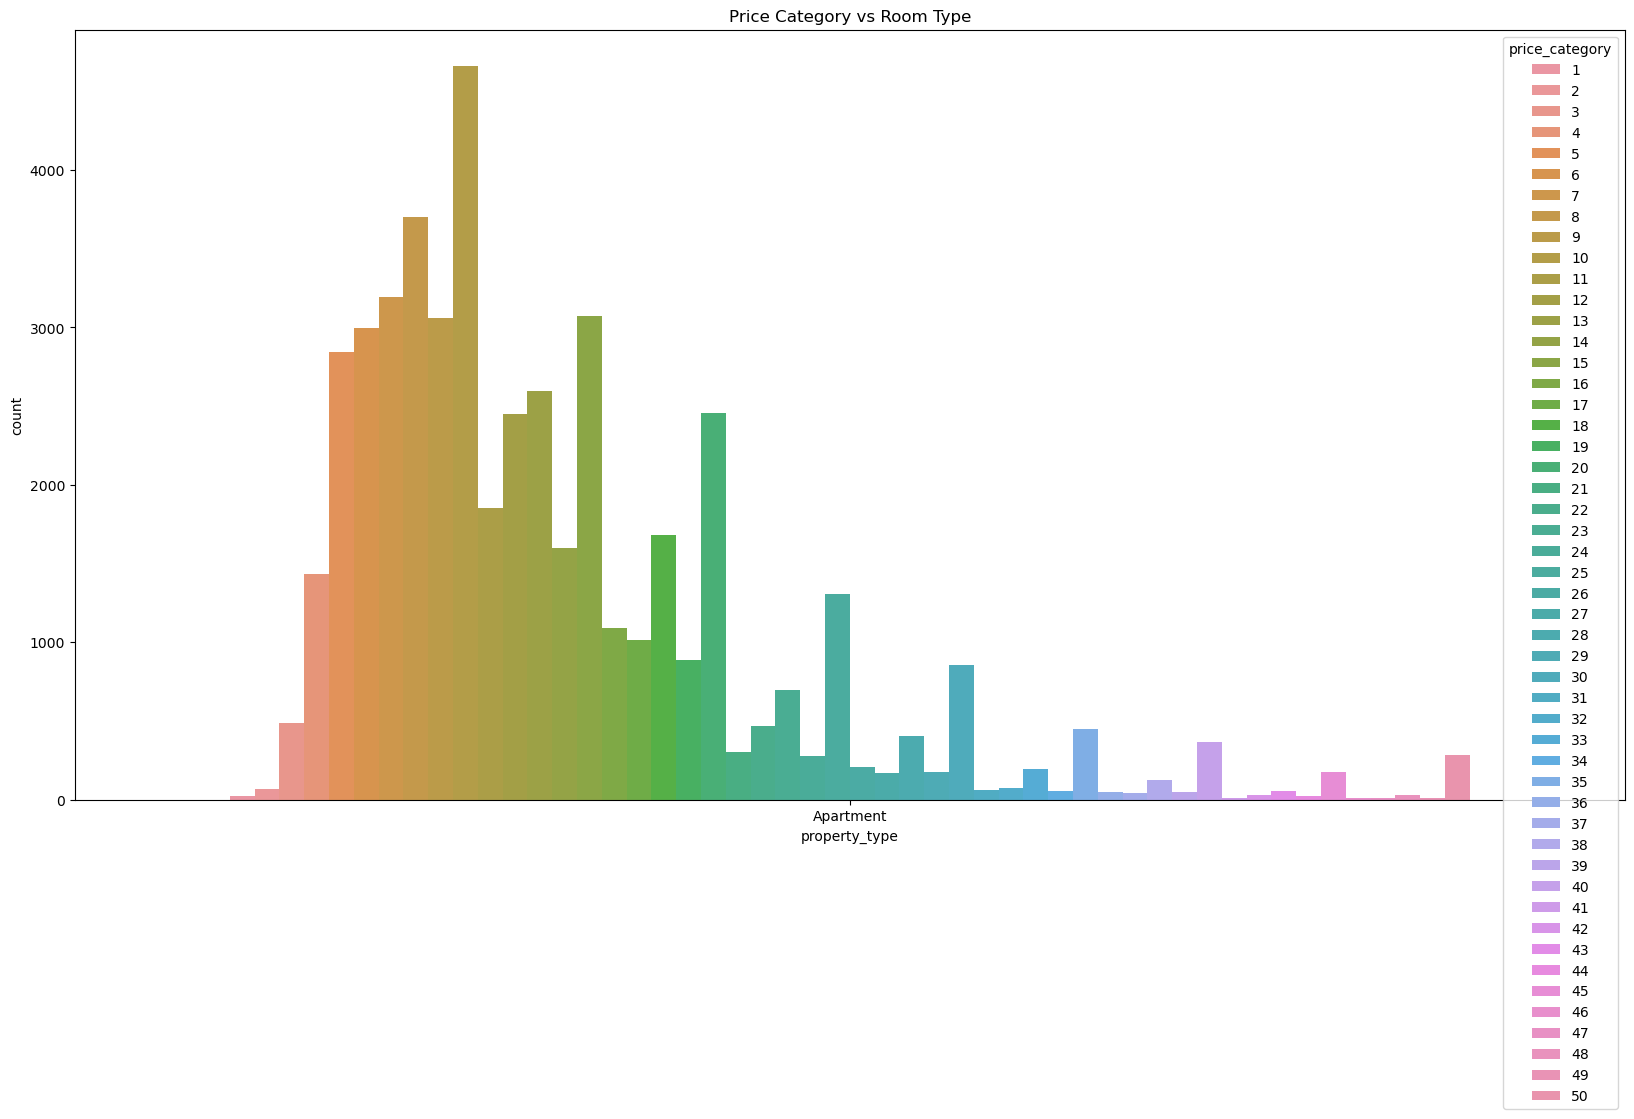

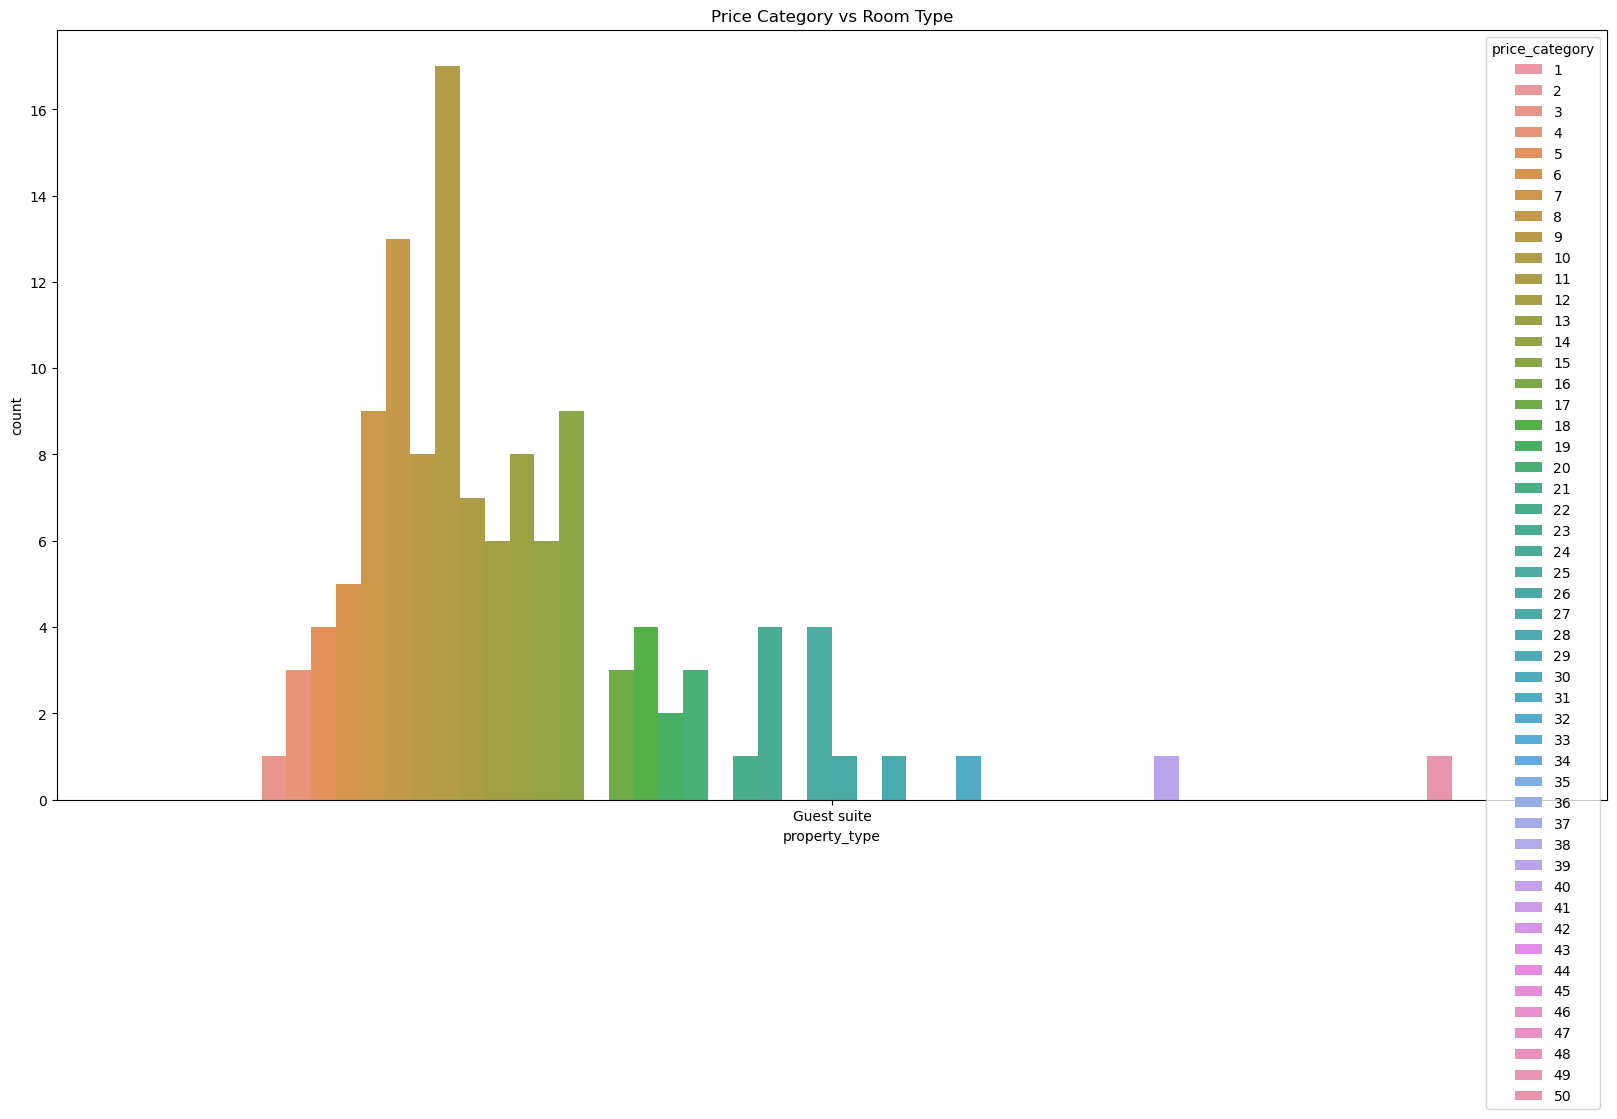

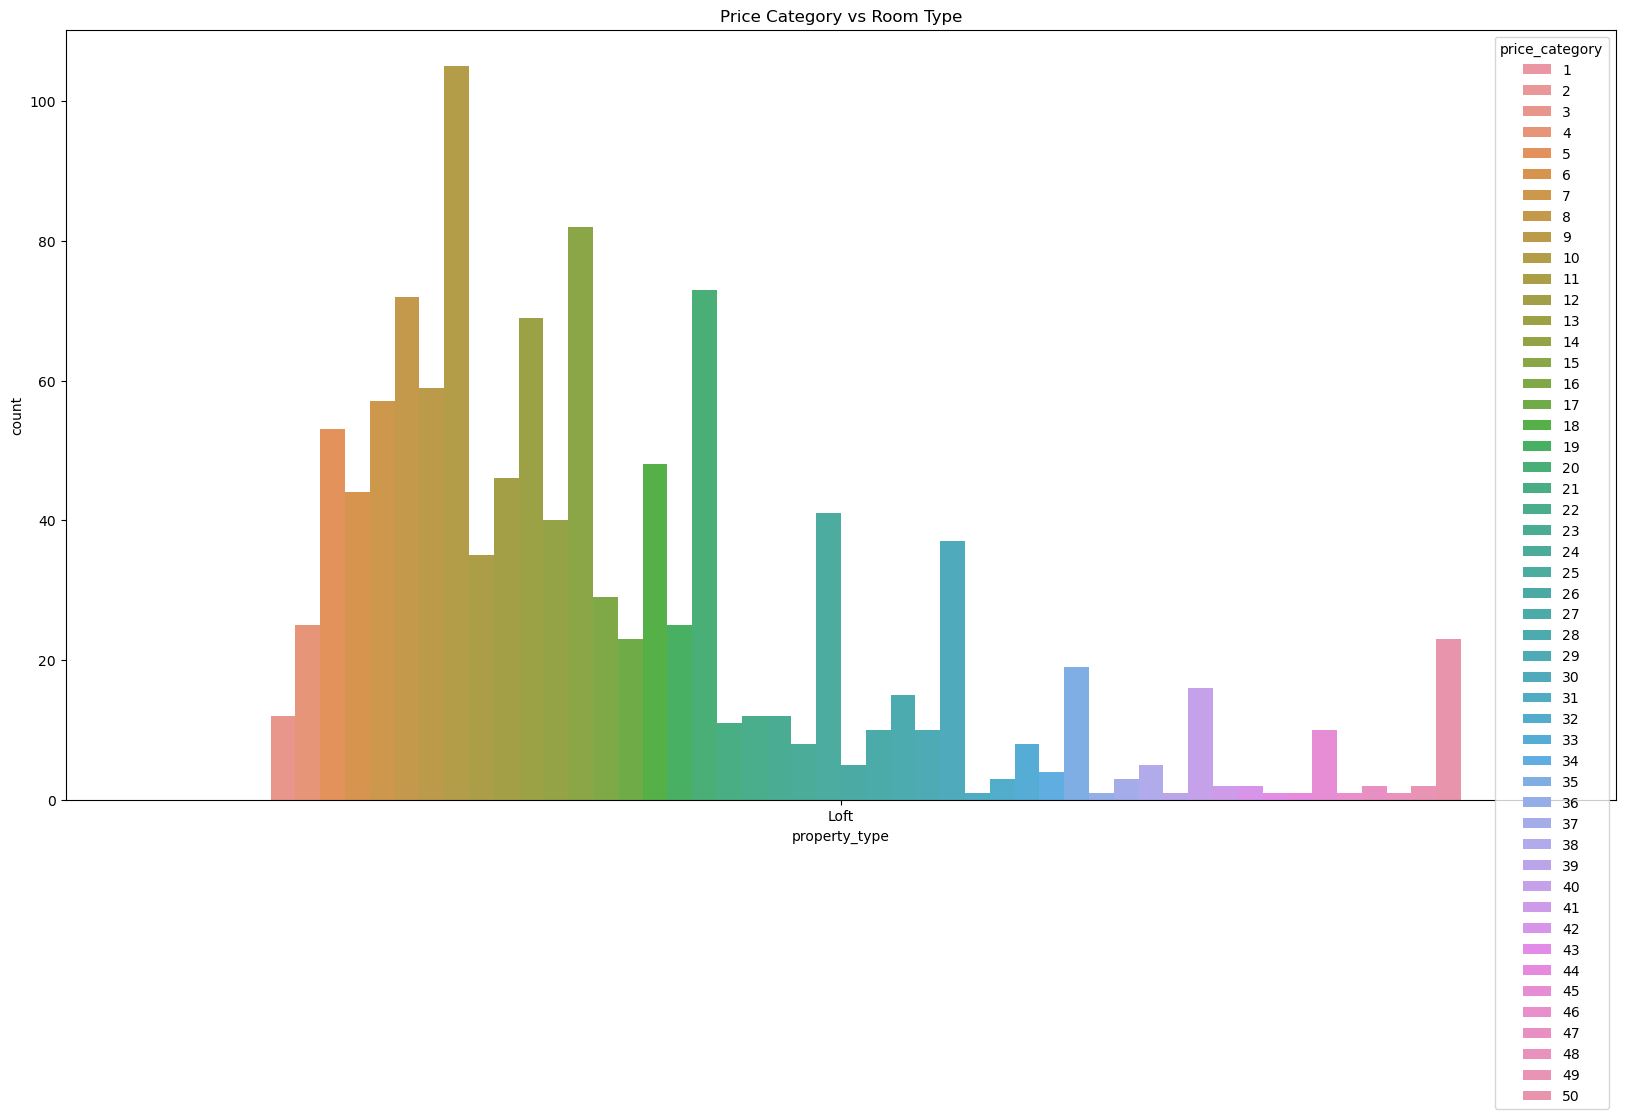

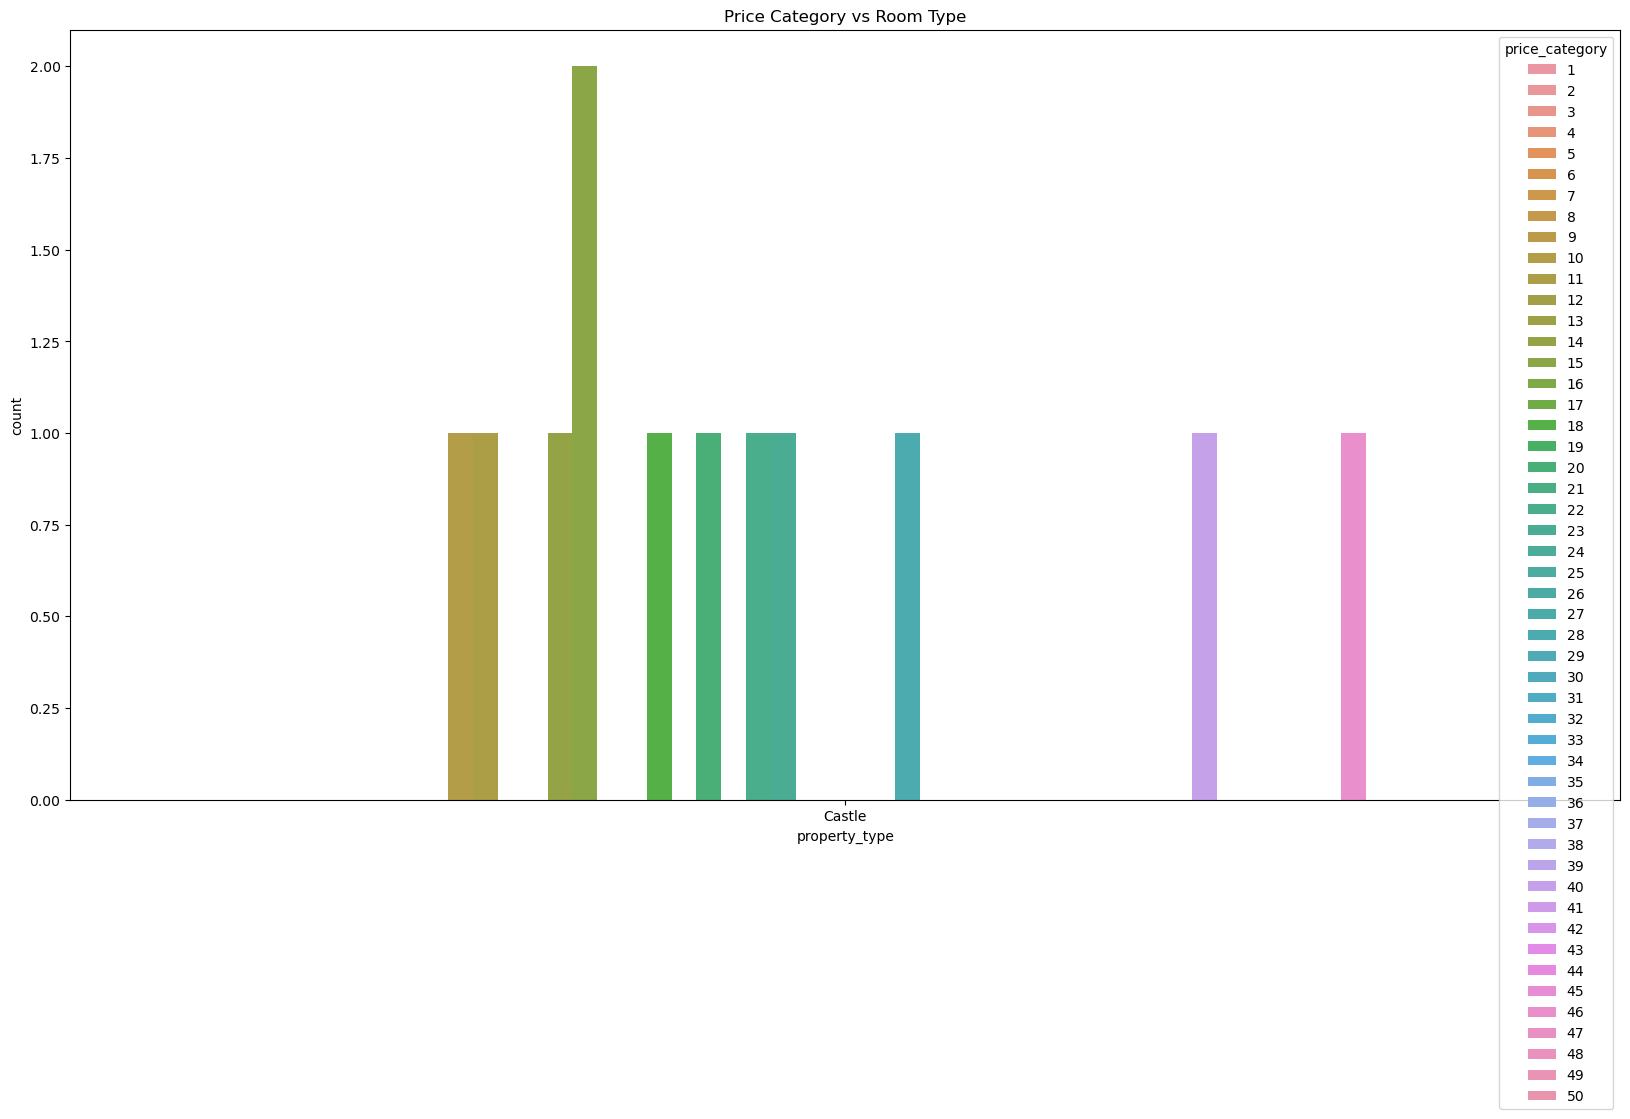

: 

In [79]:
#plot the price category against the room type
plt.figure(figsize=(20,10))
sns.countplot(x='property_type', hue=df['price_category'], data=df)
plt.title('Price Category vs Room Type')
plt.show()
# for each room type we can see the distribution of the price categories
for property_type in set(df['property_type']):
    plt.figure(figsize=(20,10))
    sns.countplot(x='property_type', hue=df['price_category'], data=df[df['property_type'] == property_type])
    plt.title('Price Category vs Room Type')
    plt.show()

# City and price relations

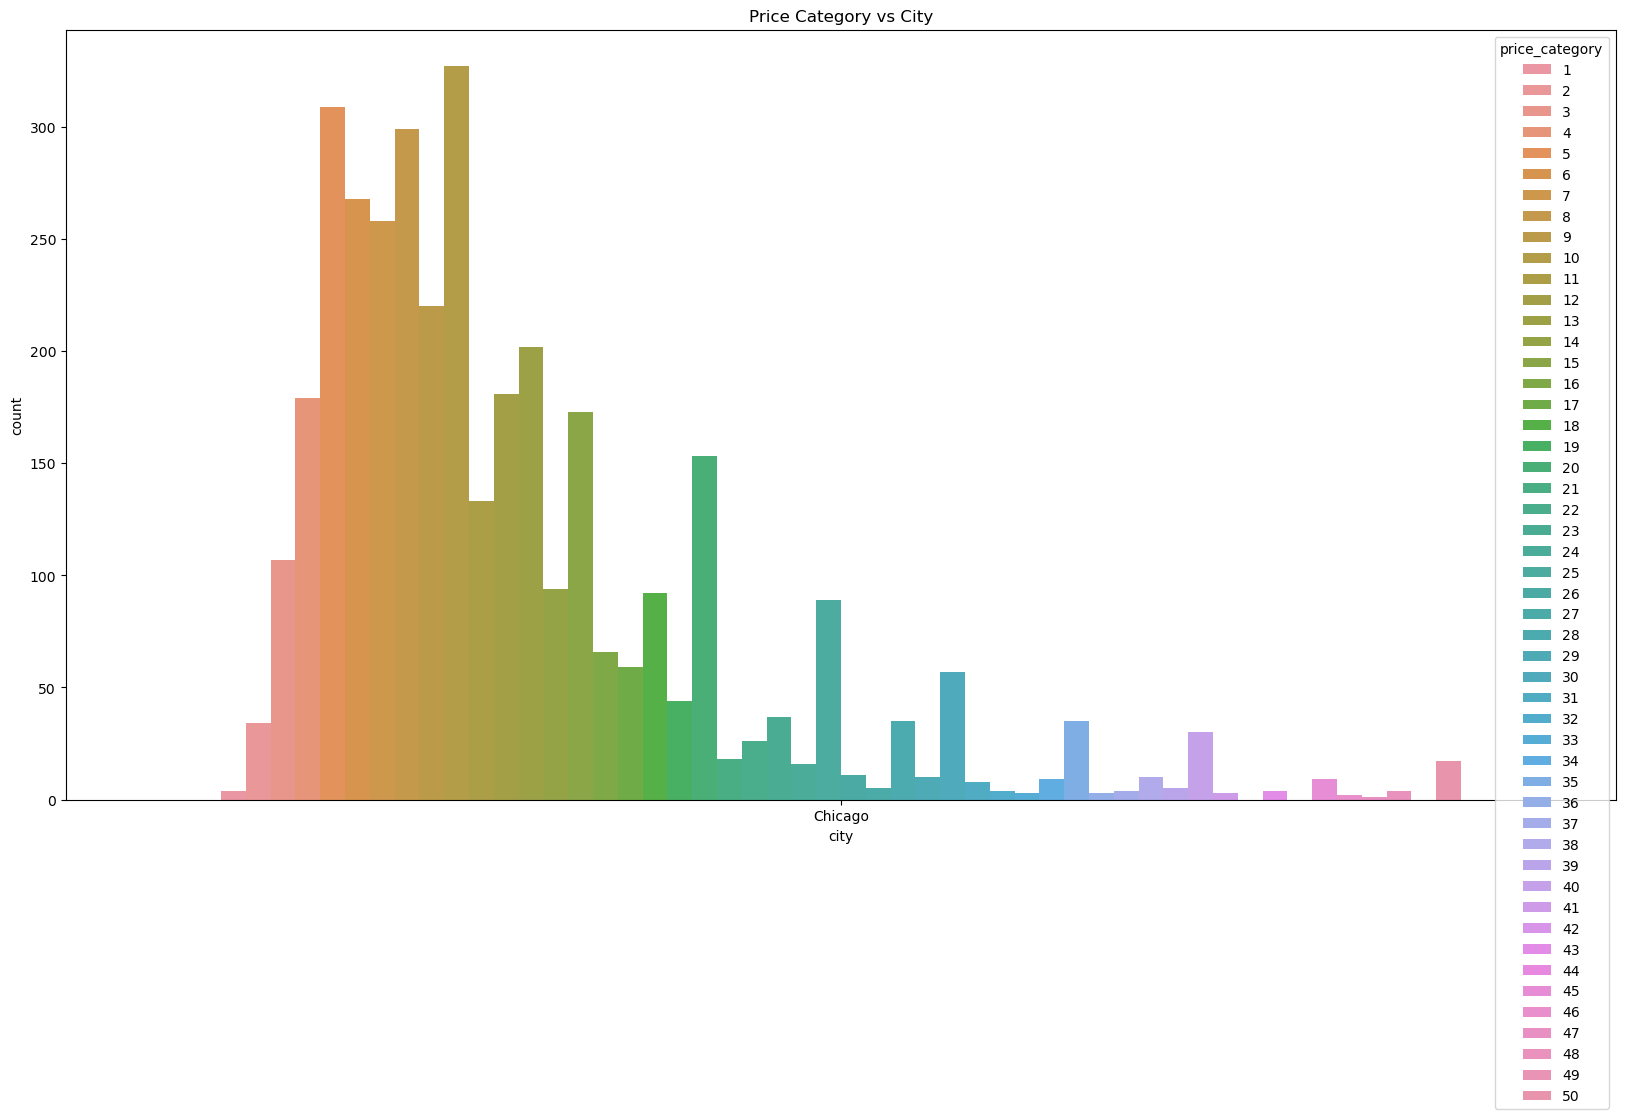

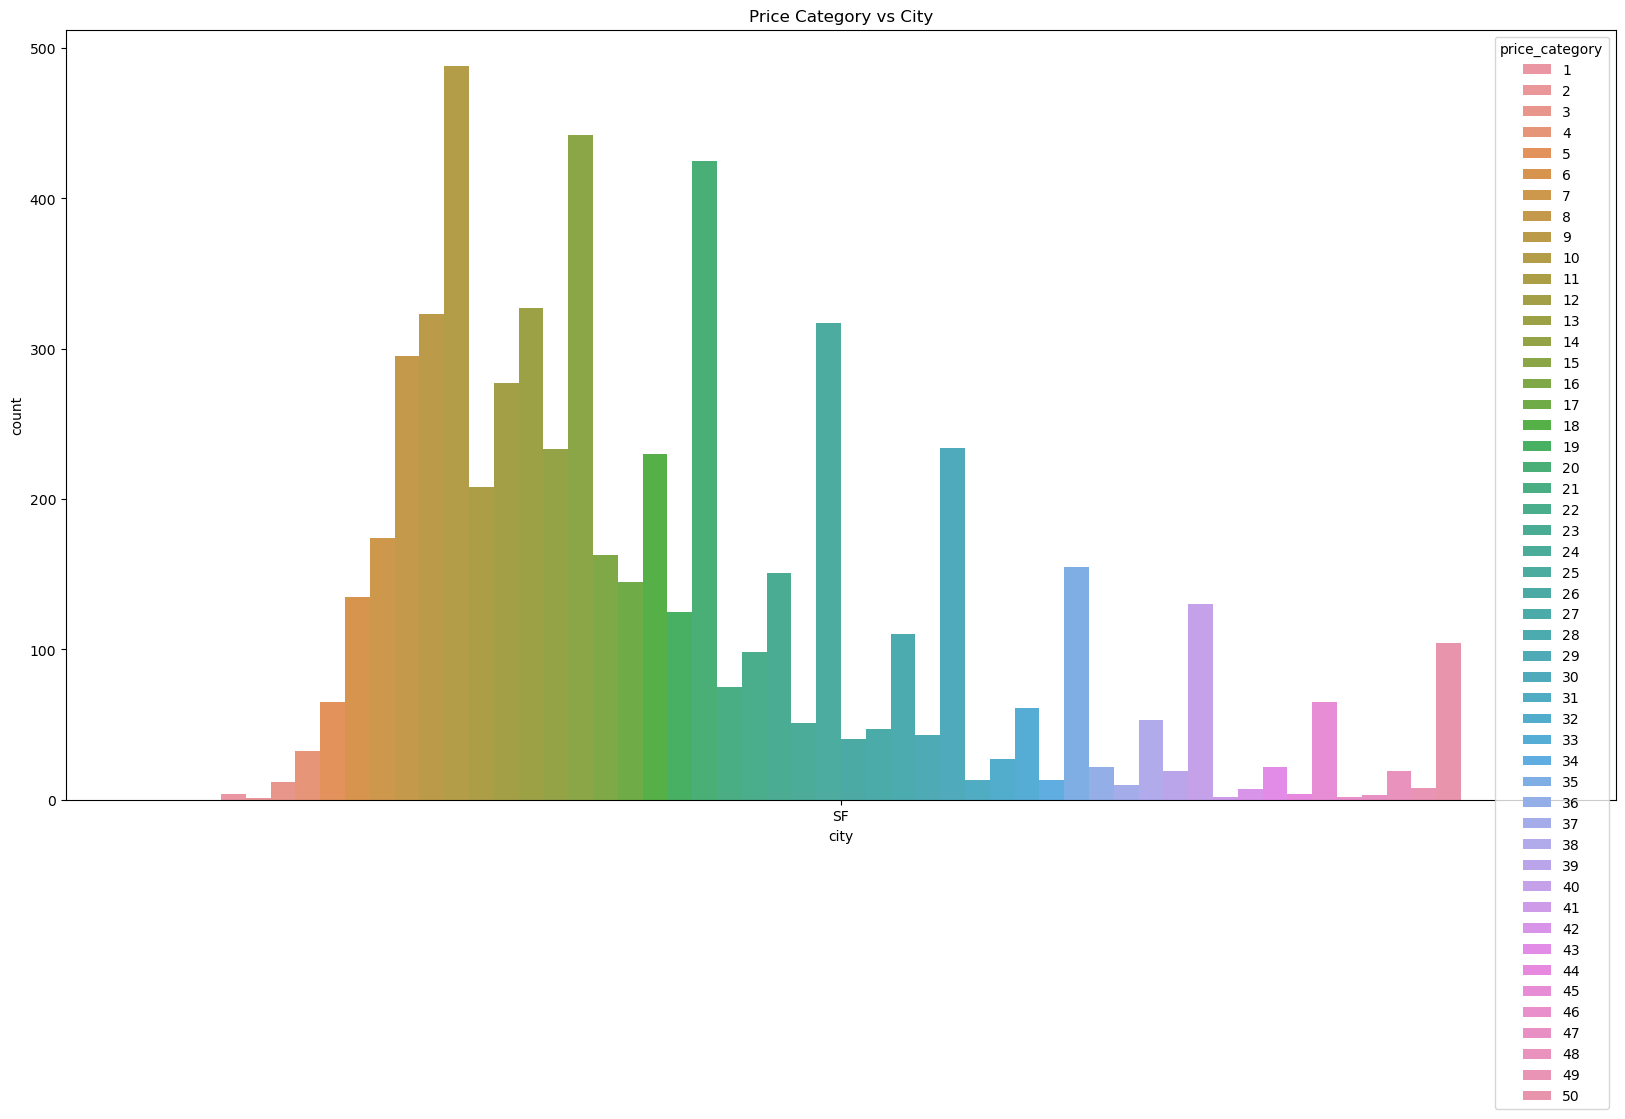

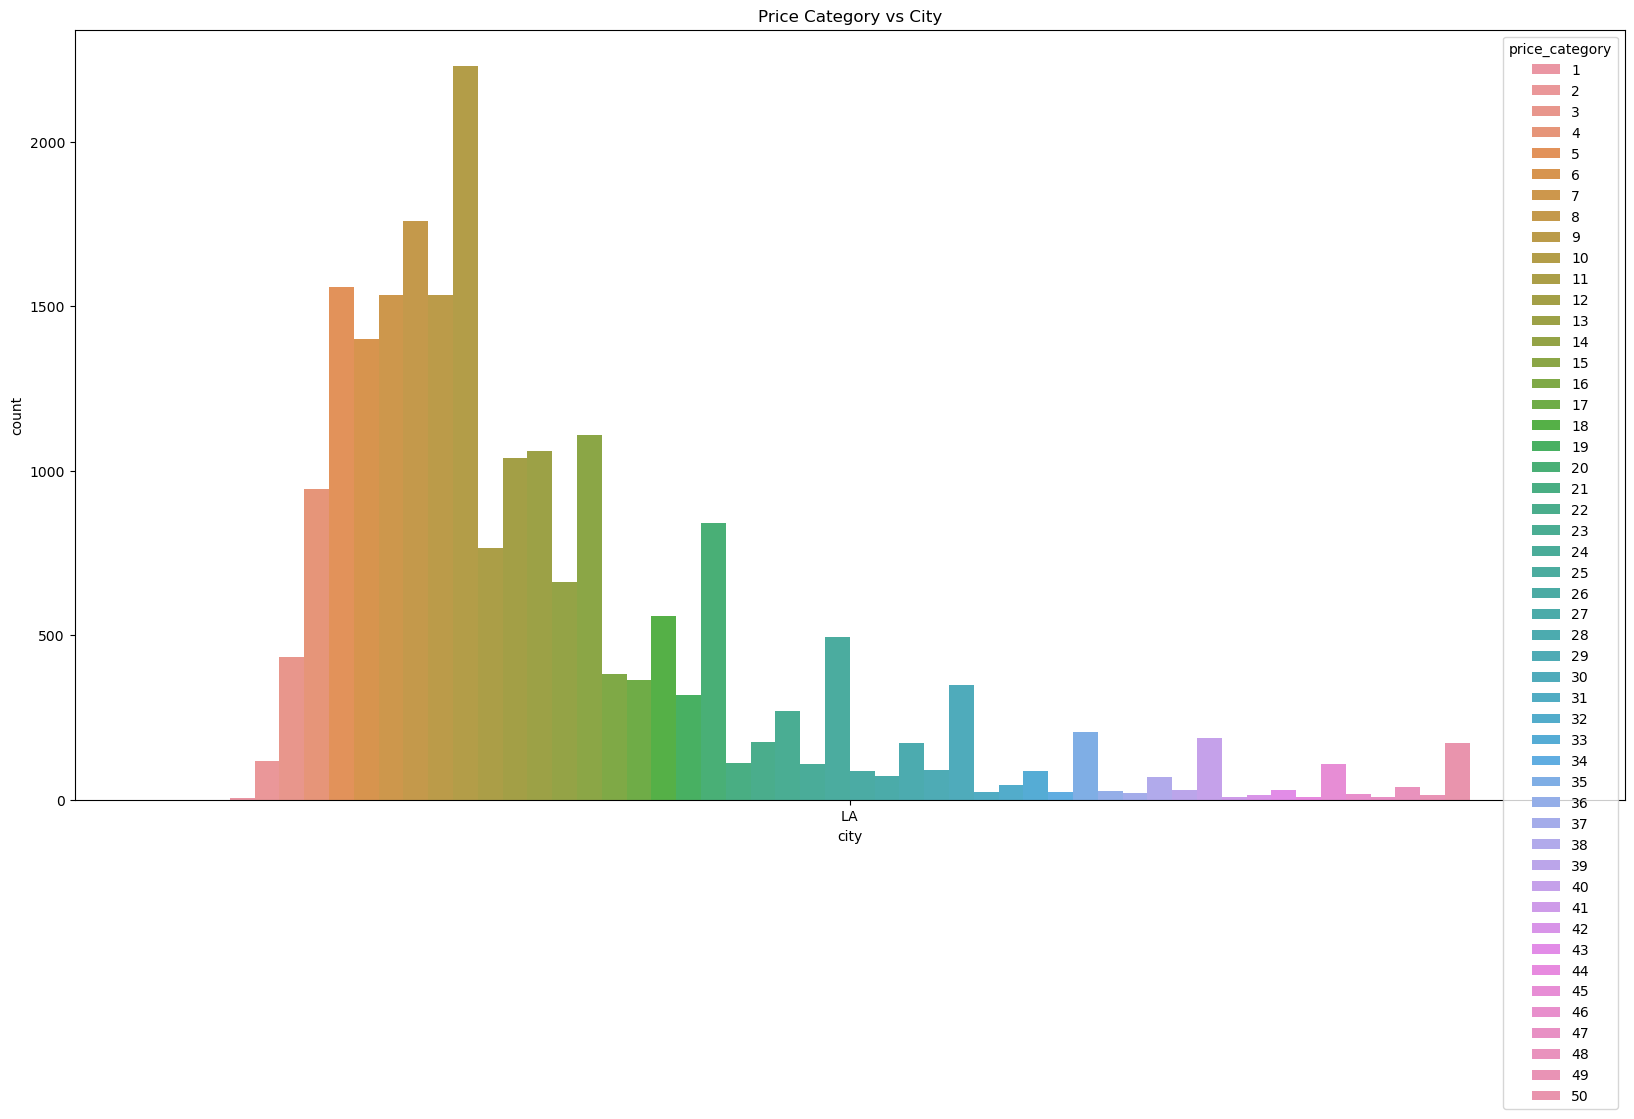

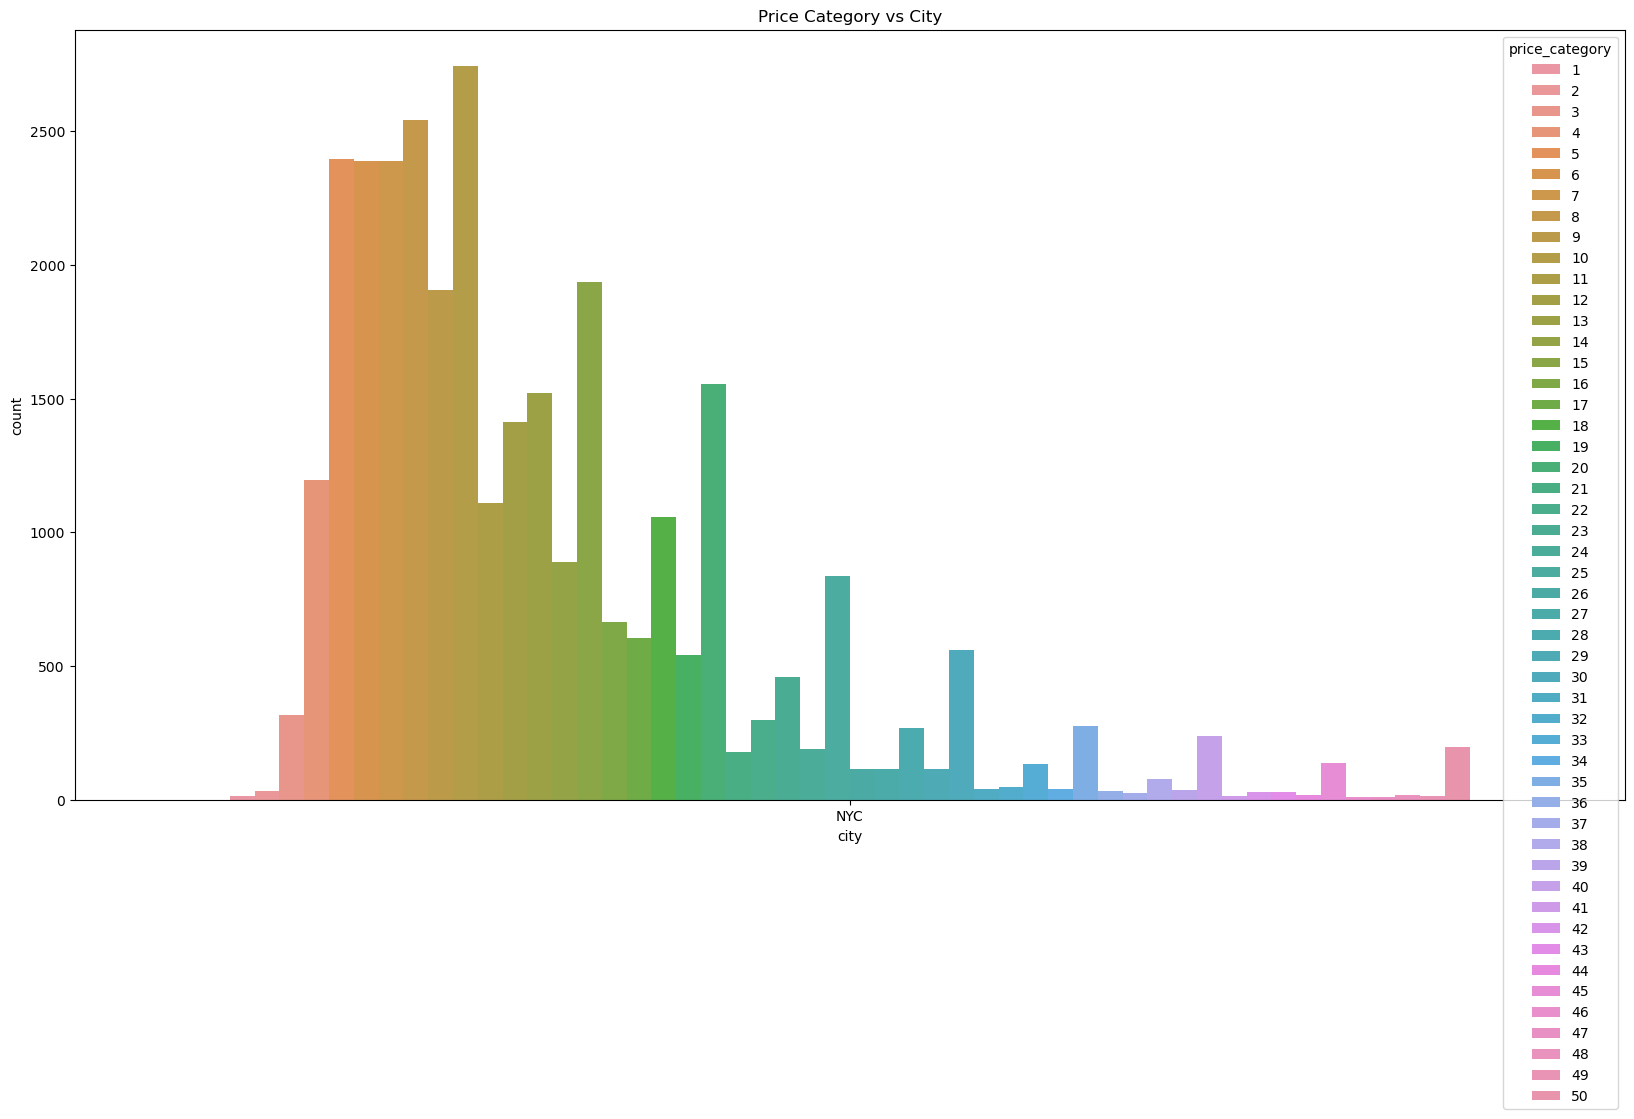

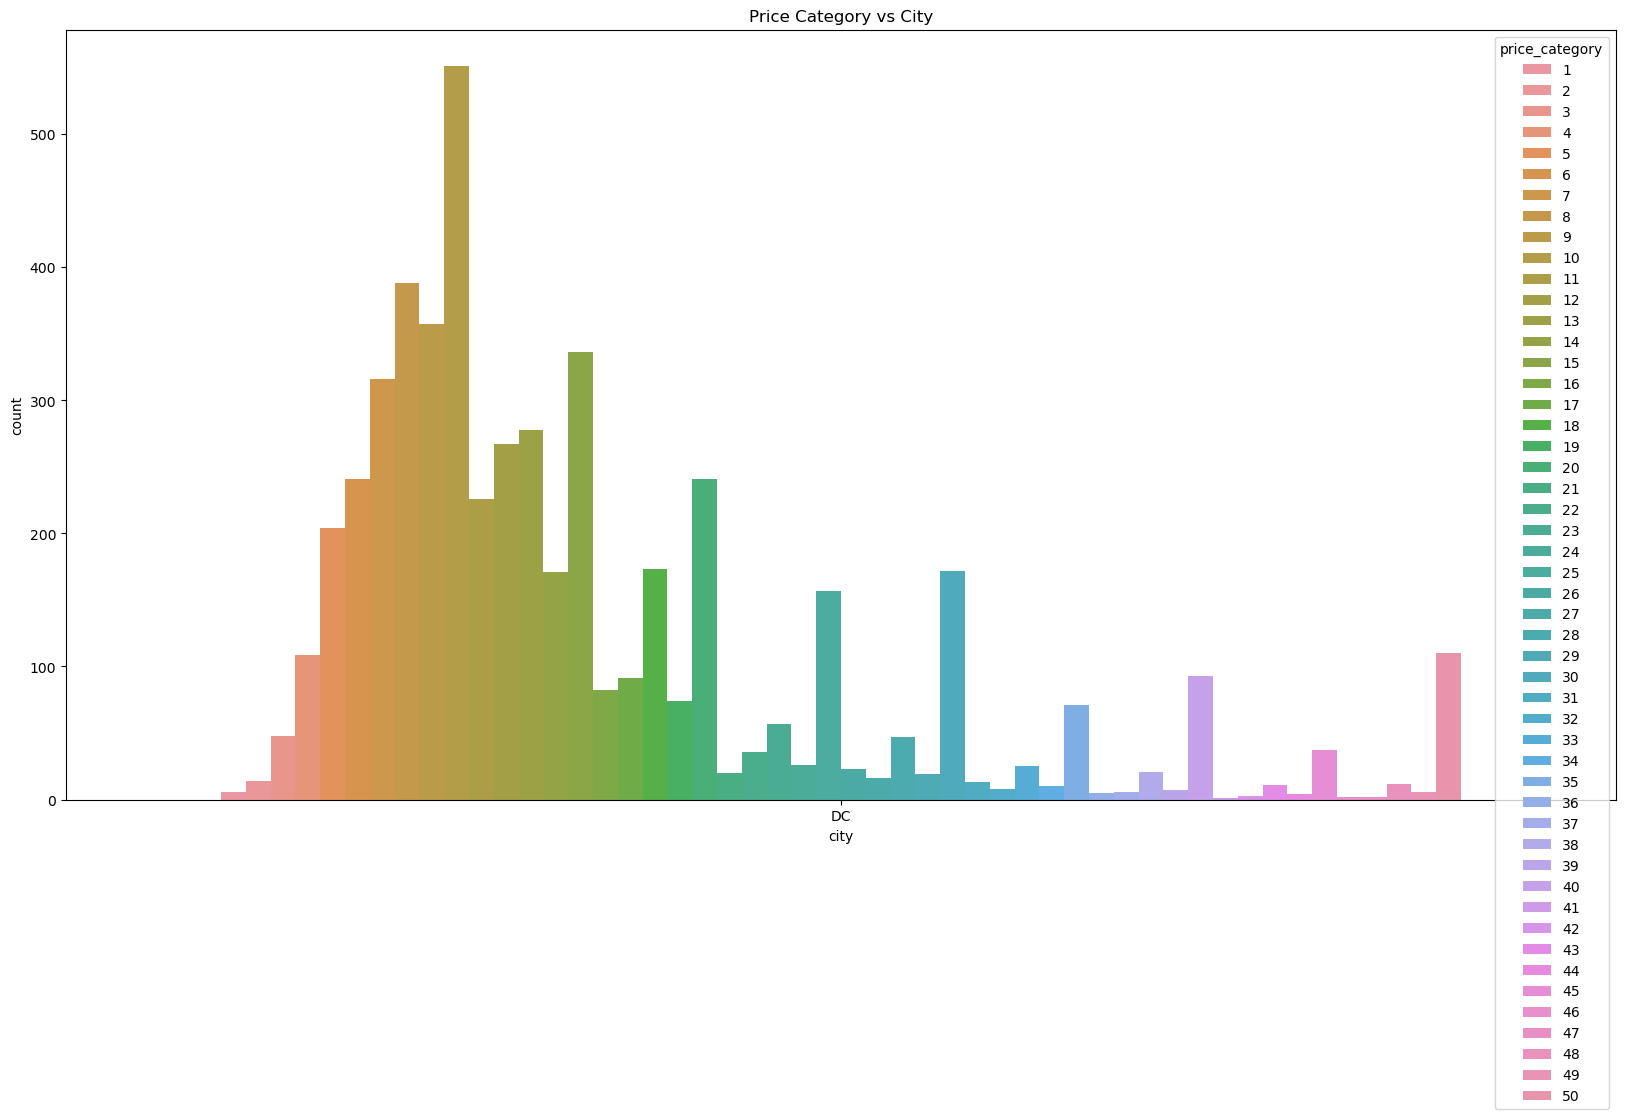

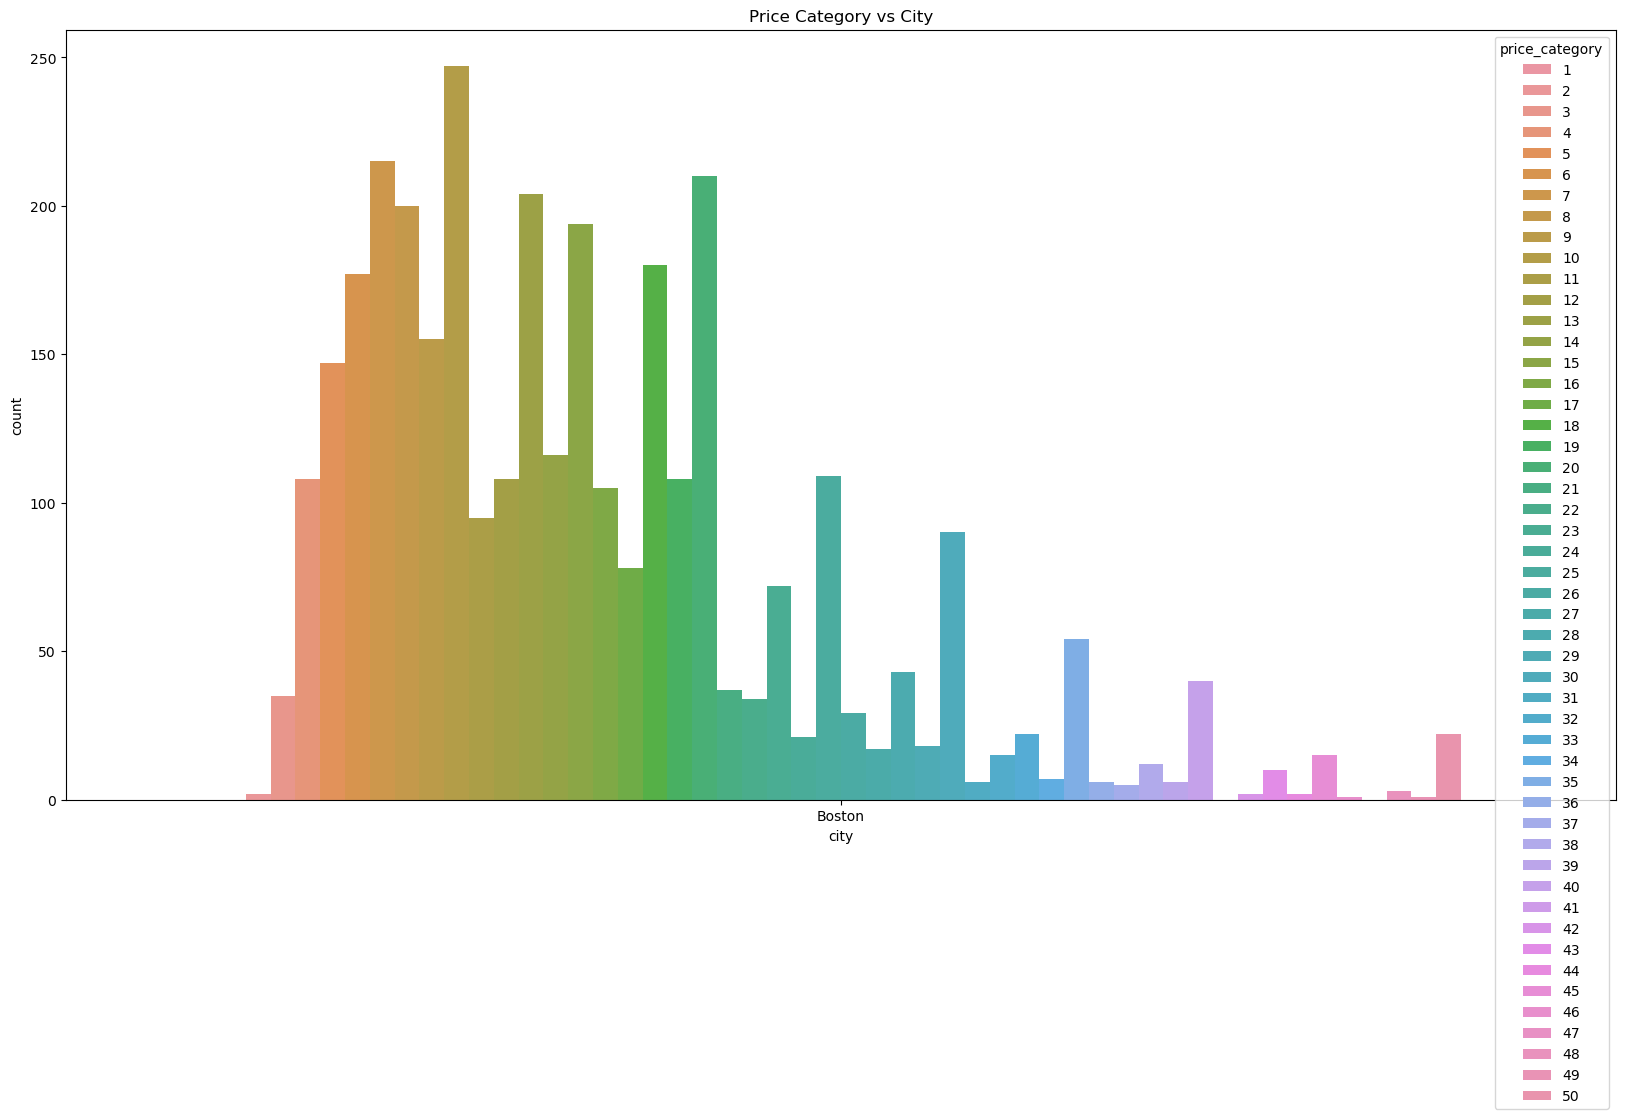

In [78]:
#for each city we can see the distribution of the price categories
for city in unique_city:
    plt.figure(figsize=(20,10))
    sns.countplot(x='city', hue=newdf['price_category'], data=newdf[newdf['city'] == city])
    plt.title('Price Category vs City')
    plt.show()